# Análise de dados com Pandas

Caso não tenha o polars baixado, só executar a linha abaixo

In [1]:
#!pip install polars

In [2]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)

#Carregando os dados

In [3]:
import pandas as pd
import time

caminho_arquivo = "/content/dados_enem_2021_BA.csv"
linhas_esperadas = 266194

tentativas = 0
max_tentativas = 20  # limite para evitar loop infinito

while True:
    try:
        dados = pd.read_csv(caminho_arquivo)
        linhas_atuais = dados.shape[0]
        print(f"Tentativa {tentativas + 1}: {linhas_atuais} linhas lidas")

        if linhas_atuais == linhas_esperadas:
            print("Arquivo lido com sucesso com todas as linhas.")
            break
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")

    tentativas += 1
    if tentativas >= max_tentativas:
        print("Número máximo de tentativas atingido. Encerrando.")
        break

    time.sleep(1)  # espera 1 segundos antes de tentar de novo


Tentativa 1: 266194 linhas lidas
Arquivo lido com sucesso com todas as linhas.


A base de dados precisa ter 266194 linhas e 51 colunas

In [4]:
dados.shape

(266194, 51)

#Comandos



*   Comando para visualizar as 5 primeiras linhas do dataset



In [5]:
#Lendo os 5 primeiros registros
dados.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210051128744    2021                4       F                1   
1  210054173438    2021                5       F                1   
2  210052118573    2021                3       F                1   
3  210052350230    2021               10       F                1   
4  210053156861    2021                9       M                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            3                 1                2                0          2   
1            2                 1                2                0          2   
2            3                 1                2                0          2   
3            2                 1                1                8          1   
4            2                 1                1                5          1   

   TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  CO_UF_ESC  \
0        1.0             0               NaN              NaN        NaN   
1        1.0             0         2927408.0         Salvador       29.0   
2        1.0             0               NaN              NaN        NaN   
3        NaN             0               NaN              NaN        NaN   
4        NaN             0               NaN              NaN        NaN   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0       NaN                     NaN                 NaN              NaN   
1        BA                     1.0                 1.0              1.0   
2       NaN                     NaN                 NaN              NaN   
3       NaN                     NaN                 NaN              NaN   
4       NaN                     NaN                 NaN              NaN   

   CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
0             2927200        Ruy Barbosa           29          BA   
1             2927408           Salvador           29          BA   
2             2903201          Barreiras           29          BA   
3             2928802      Santo Estêvão           29          BA   
4             2910800   Feira de Santana           29          BA   

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0               1               1               1               1   
1               0               0               0               0   
2               1               1               1               1   
3               1               1               1               1   
4               1               1               1               1   

   CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0        909.0        881.0        892.0        899.0       507.6       539.2   
1          NaN          NaN          NaN          NaN         NaN         NaN   
2        912.0        882.0        891.0        901.0       439.6       437.7   
3        911.0        880.0        890.0        902.0       548.1       619.5   
4       1014.0       1000.0       1004.0       1010.0       465.2       613.1   

   NU_NOTA_LC  NU_NOTA_MT                                TX_RESPOSTAS_CN  \
0       494.6       413.3  BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED   
1         NaN         NaN                                            NaN   
2       455.9       446.2  BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA   
3       676.3       386.6  CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE   
4       522.1       579.6  CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   

                                 TX_RESPOSTAS_CH  \
0  EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD   
1                                            NaN   
2  AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB   
3  DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD   
4  CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   

                                     TX_RESPOSTAS_LC  \
0  99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEA



*   Comando para visualizar as 5 últimas linhas do dataset



In [6]:
#Lendo os 5 últimos registros
dados.tail()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
266189  210051432069    2021               12       M                1   
266190  210051106175    2021               14       M                2   
266191  210051995005    2021               11       M                0   
266192  210053234415    2021               12       M                2   
266193  210054027870    2021                5       F                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
266189            3                 1                1                0   
266190            2                 1                1                0   
266191            2                 1                1               12   
266192            2                 1                1               15   
266193            2                 1                1                2   

        TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
266189          1        NaN             0               NaN              NaN   
266190          1        NaN             0               NaN              NaN   
266191          1        NaN             0               NaN              NaN   
266192          1        NaN             0               NaN              NaN   
266193          1        NaN             0               NaN              NaN   

        CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
266189        NaN       NaN                     NaN                 NaN   
266190        NaN       NaN                     NaN                 NaN   
266191        NaN       NaN                     NaN                 NaN   
266192        NaN       NaN                     NaN                 NaN   
266193        NaN       NaN                     NaN                 NaN   

        TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
266189              NaN             2900702         Alagoinhas           29   
266190              NaN             2918407           Juazeiro           29   
266191              NaN             2927408           Salvador           29   
266192              NaN             2927408           Salvador           29   
266193              NaN             2927408           Salvador           29   

       SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
266189          BA               0               0               0   
266190          BA               0               0               0   
266191          BA               0               0               0   
266192          BA               0               0               0   
266193          BA               0               0               0   

        TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
266189               0          NaN          NaN          NaN          NaN   
266190               0          NaN          NaN          NaN          NaN   
266191               0          NaN          NaN          NaN          NaN   
266192               0          NaN          NaN          NaN          NaN   
266193               0          NaN          NaN          NaN          NaN   

        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT TX_RESPOSTAS_CN  \
266189         NaN         NaN         NaN         NaN             NaN   
266190         NaN         NaN         NaN         NaN             NaN   
266191         NaN         NaN         NaN         NaN             NaN   
266192         NaN         NaN         NaN         NaN             NaN   
266193         NaN         NaN         NaN         NaN             NaN   

       TX_RESPOSTAS_CH TX_RESPOSTAS_LC TX_RESPOSTAS_MT  TP_LINGUA  \
266189             NaN             NaN             NaN          1   
266190             NaN             NaN             NaN          1   
266191             NaN             NaN             NaN          1   
266192             NaN             NaN             NaN          1   
266193             



*   Verificando novamente o tamanho do dataset. o número "266194" representa a quantidade de linhas e o número "51" representa a quantidade de colunas

In [7]:
#Inspecionando a dimensão do dataset
dados.shape

(266194, 51)




*   Checando os tipos de cada coluna




In [8]:
#Inspecionando o tipo de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [9]:
#Nome das colunas
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')



*   Checando dados nulos em cada coluna, utilizando da função isna() + sum()

E, é possível perceber vários dados nulos nas colunas de respostas, minha hipótese é, que esses participantes faltaram a prova



In [10]:
#Verificando dados ausentes
dados.isna().sum()

NU_INSCRICAO                   0
NU_ANO                         0
TP_FAIXA_ETARIA                0
TP_SEXO                        0
TP_ESTADO_CIVIL                0
TP_COR_RACA                    0
TP_NACIONALIDADE               0
TP_ST_CONCLUSAO                0
TP_ANO_CONCLUIU                0
TP_ESCOLA                      0
TP_ENSINO                 181806
IN_TREINEIRO                   0
CO_MUNICIPIO_ESC          218374
NO_MUNICIPIO_ESC          218374
CO_UF_ESC                 218374
SG_UF_ESC                 218374
TP_DEPENDENCIA_ADM_ESC    218374
TP_LOCALIZACAO_ESC        218374
TP_SIT_FUNC_ESC           218374
CO_MUNICIPIO_PROVA             0
NO_MUNICIPIO_PROVA             0
CO_UF_PROVA                    0
SG_UF_PROVA                    0
TP_PRESENCA_CN                 0
TP_PRESENCA_CH                 0
TP_PRESENCA_LC                 0
TP_PRESENCA_MT                 0
CO_PROVA_CN                90838
CO_PROVA_CH                81350
CO_PROVA_LC                81350
CO_PROVA_MT                90838
NU_NOTA_CN                 90838
NU_NOTA_CH                 81350
NU_NOTA_LC                 81350
NU_NOTA_MT                 90838
TX_RESPOSTAS_CN            90838
TX_RESPOSTAS_CH            81350
TX_RESPOSTAS_LC            81350
TX_RESPOSTAS_MT            90838
TP_LINGUA                      0
TX_GABARITO_CN             90838
TX_GABARITO_CH             81350
TX_GABARITO_LC             81350
TX_GABARITO_MT             90838
TP_STATUS_REDACAO          81350
NU_NOTA_COMP1              81350
NU_NOTA_COMP2              81350
NU_NOTA_COMP3              81350
NU_NOTA_COMP4              81350
NU_NOTA_COMP5              81350
NU_NOTA_REDACAO            81350
dtype: int64



*   Checando dados nulos, mas agora em porcentagem

In [11]:
#Verificando dados ausentes em porcentagem
((dados.isna().sum() / dados.shape[0]) * 100).sort_values(ascending=False)

TP_DEPENDENCIA_ADM_ESC    82.035658
TP_SIT_FUNC_ESC           82.035658
SG_UF_ESC                 82.035658
NO_MUNICIPIO_ESC          82.035658
CO_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
TP_LOCALIZACAO_ESC        82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
NU_NOTA_MT                34.124736
NU_NOTA_CN                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
TX_GABARITO_MT            34.124736
CO_PROVA_CN               34.124736
TX_GABARITO_CH            30.560418
TX_GABARITO_LC            30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_COMP3             30.560418
TP_STATUS_REDACAO         30.560418
NU_NOTA_COMP1             30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_REDACAO           30.560418
CO_PROVA_LC               30.560418
NU_NOTA_LC                30.560418
NU_NOTA_CH                30.560418
CO_PROVA_CH               30.560418
TX_RESPOSTAS_LC           30.560418
NU_ANO                     0.000000
NU_INSCRICAO               0.000000
TP_FAIXA_ETARIA            0.000000
TP_ESCOLA                  0.000000
IN_TREINEIRO               0.000000
TP_SEXO                    0.000000
TP_COR_RACA                0.000000
TP_ESTADO_CIVIL            0.000000
TP_NACIONALIDADE           0.000000
TP_ST_CONCLUSAO            0.000000
TP_ANO_CONCLUIU            0.000000
TP_PRESENCA_MT             0.000000
CO_MUNICIPIO_PROVA         0.000000
NO_MUNICIPIO_PROVA         0.000000
CO_UF_PROVA                0.000000
SG_UF_PROVA                0.000000
TP_PRESENCA_CN             0.000000
TP_PRESENCA_CH             0.000000
TP_PRESENCA_LC             0.000000
TP_LINGUA                  0.000000
dtype: float64

* Utilizando a função describe para visualizar dados estatísticos, como desvio padrão, média, contagem.

In [12]:
#Sumário estatístico dos dados
dados.describe()

NU_INSCRICAO    NU_ANO  TP_FAIXA_ETARIA  TP_ESTADO_CIVIL  \
count  2.661940e+05  266194.0    266194.000000    266194.000000   
mean   2.100527e+11    2021.0         5.710166         1.048991   
std    9.819577e+05       0.0         3.878161         0.411030   
min    2.100510e+11    2021.0         1.000000         0.000000   
25%    2.100519e+11    2021.0         3.000000         1.000000   
50%    2.100527e+11    2021.0         4.000000         1.000000   
75%    2.100536e+11    2021.0         8.000000         1.000000   
max    2.100545e+11    2021.0        20.000000         4.000000   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
count  266194.000000     266194.000000    266194.000000    266194.000000   
mean        2.301832          1.029787         1.595810         2.846845   
std         0.907761          0.194507         0.719902         4.468500   
min         0.000000          0.000000         1.000000         0.000000   
25%         2.000000          1.000000         1.000000         0.000000   
50%         3.000000          1.000000         1.000000         0.000000   
75%         3.000000          1.000000         2.000000         4.000000   
max         5.000000          4.000000         4.000000        15.000000   

           TP_ESCOLA     TP_ENSINO   IN_TREINEIRO  CO_MUNICIPIO_ESC  \
count  266194.000000  84388.000000  266194.000000      4.782000e+04   
mean        1.379663      1.013272       0.122659      2.921430e+06   
std         0.570947      0.114438       0.328046      7.708902e+04   
min         1.000000      1.000000       0.000000      1.100122e+06   
25%         1.000000      1.000000       0.000000      2.910800e+06   
50%         1.000000      1.000000       0.000000      2.922003e+06   
75%         2.000000      1.000000       0.000000      2.927408e+06   
max         3.000000      2.000000       1.000000      5.300108e+06   

          CO_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
count  47820.000000            47820.000000        47820.000000   
mean      29.016625                2.411731            1.043580   
std        0.764082                0.926189            0.204161   
min       11.000000                1.000000            1.000000   
25%       29.000000                2.000000            1.000000   
50%       29.000000                2.000000            1.000000   
75%       29.000000                2.000000            1.000000   
max       53.000000                4.000000            2.000000   

       TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA  CO_UF_PROVA  TP_PRESENCA_CN  \
count     47820.000000        2.661940e+05     266194.0   266194.000000   
mean          1.037286        2.919423e+06         29.0        0.659466   
std           0.298561        9.521537e+03          0.0        0.474642   
min           1.000000        2.900702e+06         29.0        0.000000   
25%           1.000000        2.910800e+06         29.0        0.000000   
50%           1.000000        2.919553e+06         29.0        1.000000   
75%           1.000000        2.927408e+06         29.0        1.000000   
max           4.000000        2.933604e+06         29.0        2.000000   

       TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT    CO_PROVA_CN  \
count   266194.000000   266194.000000   266194.000000  175356.000000   
mean         0.696650        0.696650        0.659466     916.391210   
std          0.462151        0.462151        0.474642      27.250799   
min          0.000000        0.000000        0.000000     909.000000   
25%          0.000000        0.000000        0.000000     910.000000   
50%          1.000000        1.000000        1.000000     911.000000   
75%          1.000000        1.000000        1.000000     912.000000   
max          2.000000        2.000000        2.000000    1048.000000   

         CO_PROVA_CH    CO_PROVA_LC    CO_PROVA_MT     NU_NOTA_CN  \
count  184844.000000  184844.000000  175356.000000  175356.000000   
mean      8

In [13]:
#Sumário estatístico dos dados transposto
dados.describe().transpose()

count          mean            std           min  \
NU_INSCRICAO            266194.0  2.100527e+11  981957.687860  2.100510e+11   
NU_ANO                  266194.0  2.021000e+03       0.000000  2.021000e+03   
TP_FAIXA_ETARIA         266194.0  5.710166e+00       3.878161  1.000000e+00   
TP_ESTADO_CIVIL         266194.0  1.048991e+00       0.411030  0.000000e+00   
TP_COR_RACA             266194.0  2.301832e+00       0.907761  0.000000e+00   
TP_NACIONALIDADE        266194.0  1.029787e+00       0.194507  0.000000e+00   
TP_ST_CONCLUSAO         266194.0  1.595810e+00       0.719902  1.000000e+00   
TP_ANO_CONCLUIU         266194.0  2.846845e+00       4.468500  0.000000e+00   
TP_ESCOLA               266194.0  1.379663e+00       0.570947  1.000000e+00   
TP_ENSINO                84388.0  1.013272e+00       0.114438  1.000000e+00   
IN_TREINEIRO            266194.0  1.226587e-01       0.328046  0.000000e+00   
CO_MUNICIPIO_ESC         47820.0  2.921430e+06   77089.022929  1.100122e+06   
CO_UF_ESC                47820.0  2.901662e+01       0.764082  1.100000e+01   
TP_DEPENDENCIA_ADM_ESC   47820.0  2.411731e+00       0.926189  1.000000e+00   
TP_LOCALIZACAO_ESC       47820.0  1.043580e+00       0.204161  1.000000e+00   
TP_SIT_FUNC_ESC          47820.0  1.037286e+00       0.298561  1.000000e+00   
CO_MUNICIPIO_PROVA      266194.0  2.919423e+06    9521.537357  2.900702e+06   
CO_UF_PROVA             266194.0  2.900000e+01       0.000000  2.900000e+01   
TP_PRESENCA_CN          266194.0  6.594664e-01       0.474642  0.000000e+00   
TP_PRESENCA_CH          266194.0  6.966498e-01       0.462151  0.000000e+00   
TP_PRESENCA_LC          266194.0  6.966498e-01       0.462151  0.000000e+00   
TP_PRESENCA_MT          266194.0  6.594664e-01       0.474642  0.000000e+00   
CO_PROVA_CN             175356.0  9.163912e+02      27.250799  9.090000e+02   
CO_PROVA_CH             184844.0  8.869030e+02      28.573475  8.790000e+02   
CO_PROVA_LC             184844.0  8.968647e+02      28.422958  8.890000e+02   
CO_PROVA_MT             175356.0  9.064295e+02      27.385340  8.990000e+02   
NU_NOTA_CN              175356.0  4.799396e+02      75.043774  0.000000e+00   
NU_NOTA_CH              184844.0  5.062345e+02      94.101182  0.000000e+00   
NU_NOTA_LC              184844.0  4.891311e+02      77.829960  0.000000e+00   
NU_NOTA_MT              175356.0  5.135080e+02     101.187047  0.000000e+00   
TP_LINGUA               266194.0  4.814158e-01       0.499655  0.000000e+00   
TP_STATUS_REDACAO       184844.0  1.128892e+00       0.769342  1.000000e+00   
NU_NOTA_COMP1           184844.0  1.163537e+02      32.975823  0.000000e+00   
NU_NOTA_COMP2           184844.0  1.374400e+02      44.661524  0.000000e+00   
NU_NOTA_COMP3           184844.0  1.141837e+02      35.119702  0.000000e+00   
NU_NOTA_COMP4           184844.0  1.267852e+02      37.470281  0.000000e+00   
NU_NOTA_COMP5           184844.0  1.115144e+02      58.994407  0.000000e+00   
NU_NOTA_REDACAO         184844.0  6.062770e+02     184.233494  0.000000e+00   

                                 25%           50%           75%           max  
NU_INSCRICAO            2.100519e+11  2.100527e+11  2.100536e+11  2.100545e+11  
NU_ANO                  2.021000e+03  2.021000e+03  2.021000e+03  2.021000e+03  
TP_FAIXA_ETARIA         3.000000e+00  4.000000e+00  8.000000e+00  2.000000e+01  
TP_ESTADO_CIVIL         1.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  
TP_COR_RACA             2.000000e+00  3.000000e+00  3.000000e+00  5.000000e+00  
TP_NACIONALIDADE        1.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  
TP_ST_CONCLUSAO         1.000000e+00  1.000000e+00  2.000000e+00  4.000000e+00  
TP_ANO_CONCLUIU         0.000000e+00  0.000000e+00  4.000000e+00  1.500000e+01  
TP_ESCOLA               1.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00  
TP_ENSINO               1.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00  
IN_TREINEIRO            0.000000e+00  0.000000e+00  0.

In [14]:
dados.index

RangeIndex(start=0, stop=266194, step=1)

* Verificando a quantidade de dados únicos

In [15]:
#Quantidade de dados únicos em cada coluna
dados.nunique().sort_values(ascending=True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_SEXO                        2
TP_ENSINO                      2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_LINGUA                      2
TP_PRESENCA_CN                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_MT                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_DEPENDENCIA_ADM_ESC         4
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_ESTADO_CIVIL                5
TP_NACIONALIDADE               5
TP_COR_RACA                    6
TX_GABARITO_MT                 8
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TP_STATUS_REDACAO              8
TX_GABARITO_LC                10
NU_NOTA_COMP2                 10
NU_NOTA_COMP1                 11
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_MT                   18
CO_PROVA_LC                   18
CO_PROVA_CN                   18
CO_PROVA_CH                   18
TP_FAIXA_ETARIA               20
SG_UF_ESC                     23
CO_UF_ESC                     23
NU_NOTA_REDACAO               50
CO_MUNICIPIO_PROVA           162
NO_MUNICIPIO_PROVA           162
NO_MUNICIPIO_ESC             588
CO_MUNICIPIO_ESC             590
NU_NOTA_LC                  4183
NU_NOTA_CN                  4185
NU_NOTA_CH                  4512
NU_NOTA_MT                  5371
TX_RESPOSTAS_MT           175270
TX_RESPOSTAS_CN           175290
TX_RESPOSTAS_CH           184475
TX_RESPOSTAS_LC           184718
NU_INSCRICAO              266194
dtype: int64

In [16]:
#Tipo DataFrame
type(dados)

pandas.core.frame.DataFrame

Selecionando colunas

In [17]:
dados.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [18]:
dados["TP_ESCOLA"]

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

TP_ESCOLA

1 -> Participante não respondeu, possivelmente já é formado

2 -> Participante de escola pública

3 -> Participante de escola privada

In [19]:
dados.TP_ESCOLA.value_counts()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: count, dtype: int64

66,55 % Não respondeu

28,92 % são de escola pública

4,52 % são de escola privada

In [20]:
(dados.TP_ESCOLA.value_counts() / dados.shape[0]) * 100

TP_ESCOLA
1    66.556722
2    28.920261
3     4.523017
Name: count, dtype: float64

In [21]:
#loc puxa o nome da coluna
dados.loc[:,"TP_SEXO"]

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [22]:
#iloc puxa o índice
dados.iloc[:,0]

0         210051128744
1         210054173438
2         210052118573
3         210052350230
4         210053156861
              ...     
266189    210051432069
266190    210051106175
266191    210051995005
266192    210053234415
266193    210054027870
Name: NU_INSCRICAO, Length: 266194, dtype: int64

In [23]:
dados[["TP_ESCOLA","TP_SEXO"]]

TP_ESCOLA TP_SEXO
0               2       F
1               2       F
2               2       F
3               1       F
4               1       M
...           ...     ...
266189          1       M
266190          1       M
266191          1       M
266192          1       M
266193          1       F

[266194 rows x 2 columns]

In [24]:
dados["TP_SEXO"].value_counts()

TP_SEXO
F    171997
M     94197
Name: count, dtype: int64

Há mais mulheres fazendo o enem do que homens

64,61% dos participantes são mulheres

35,39% dos participantes são homens

In [25]:
round((dados["TP_SEXO"].value_counts()  / dados.shape[0]) * 100,2)

TP_SEXO
F    64.61
M    35.39
Name: count, dtype: float64

In [26]:
#O select_dtypes é do Pandas e é usado para pesquisar um ou vários tipos int, float, object, datetime. Essa função também pode
#remover tipos, através do "exclude"

dados.select_dtypes(include= [int,float])

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  TP_ESTADO_CIVIL  TP_COR_RACA  \
0       210051128744    2021                4                1            3   
1       210054173438    2021                5                1            2   
2       210052118573    2021                3                1            3   
3       210052350230    2021               10                1            2   
4       210053156861    2021                9                1            2   
...              ...     ...              ...              ...          ...   
266189  210051432069    2021               12                1            3   
266190  210051106175    2021               14                2            2   
266191  210051995005    2021               11                0            2   
266192  210053234415    2021               12                2            2   
266193  210054027870    2021                5                1            2   

        TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0                      1                2                0          2   
1                      1                2                0          2   
2                      1                2                0          2   
3                      1                1                8          1   
4                      1                1                5          1   
...                  ...              ...              ...        ...   
266189                 1                1                0          1   
266190                 1                1                0          1   
266191                 1                1               12          1   
266192                 1                1               15          1   
266193                 1                1                2          1   

        TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC  CO_UF_ESC  \
0             1.0             0               NaN        NaN   
1             1.0             0         2927408.0       29.0   
2             1.0             0               NaN        NaN   
3             NaN             0               NaN        NaN   
4             NaN             0               NaN        NaN   
...           ...           ...               ...        ...   
266189        NaN             0               NaN        NaN   
266190        NaN             0               NaN        NaN   
266191        NaN             0               NaN        NaN   
266192        NaN             0               NaN        NaN   
266193        NaN             0               NaN        NaN   

        TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0                          NaN                 NaN              NaN   
1                          1.0                 1.0              1.0   
2                          NaN                 NaN              NaN   
3                          NaN                 NaN              NaN   
4                          NaN                 NaN              NaN   
...                        ...                 ...              ...   
266189                     NaN                 NaN              NaN   
266190                     NaN                 NaN              NaN   
266191                     NaN                 NaN              NaN   
266192                     NaN                 NaN              NaN   
266193                     NaN                 NaN              NaN   

        CO_MUNICIPIO_PROVA  CO_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  \
0                  2927200           29               1               1   
1                  2927408           29               0               0   
2                  2903201           29               1               1   
3                  2928802           29               1               1   
4                  2910800           29               1               1   
...                    ...          ...             ...             ...   
266189             2900702         

In [27]:
dados.select_dtypes(include= object)

TP_SEXO NO_MUNICIPIO_ESC SG_UF_ESC NO_MUNICIPIO_PROVA SG_UF_PROVA  \
0            F              NaN       NaN        Ruy Barbosa          BA   
1            F         Salvador        BA           Salvador          BA   
2            F              NaN       NaN          Barreiras          BA   
3            F              NaN       NaN      Santo Estêvão          BA   
4            M              NaN       NaN   Feira de Santana          BA   
...        ...              ...       ...                ...         ...   
266189       M              NaN       NaN         Alagoinhas          BA   
266190       M              NaN       NaN           Juazeiro          BA   
266191       M              NaN       NaN           Salvador          BA   
266192       M              NaN       NaN           Salvador          BA   
266193       F              NaN       NaN           Salvador          BA   

                                      TX_RESPOSTAS_CN  \
0       BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED   
1                                                 NaN   
2       BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA   
3       CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE   
4       CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                      TX_RESPOSTAS_CH  \
0       EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD   
1                                                 NaN   
2       AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB   
3       DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD   
4       CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                          TX_RESPOSTAS_LC  \
0       99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...   
1                                                     NaN   
2       EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...   
3       ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...   
4       BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...   
...                                                   ...   
266189                                                NaN   
266190                                                NaN   
266191                                                NaN   
266192                                                NaN   
266193                                                NaN   

                                      TX_RESPOSTAS_MT  \
0       BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE   
1                                                 NaN   
2       EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE   
3       CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   
4       CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                       TX_GABARITO_CN  \
0       EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD   
1                                                 NaN   
2       DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB   
3       CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB   
4       CDBBBCABEDEDE

In [28]:
dados.select_dtypes(exclude= object)

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  TP_ESTADO_CIVIL  TP_COR_RACA  \
0       210051128744    2021                4                1            3   
1       210054173438    2021                5                1            2   
2       210052118573    2021                3                1            3   
3       210052350230    2021               10                1            2   
4       210053156861    2021                9                1            2   
...              ...     ...              ...              ...          ...   
266189  210051432069    2021               12                1            3   
266190  210051106175    2021               14                2            2   
266191  210051995005    2021               11                0            2   
266192  210053234415    2021               12                2            2   
266193  210054027870    2021                5                1            2   

        TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0                      1                2                0          2   
1                      1                2                0          2   
2                      1                2                0          2   
3                      1                1                8          1   
4                      1                1                5          1   
...                  ...              ...              ...        ...   
266189                 1                1                0          1   
266190                 1                1                0          1   
266191                 1                1               12          1   
266192                 1                1               15          1   
266193                 1                1                2          1   

        TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC  CO_UF_ESC  \
0             1.0             0               NaN        NaN   
1             1.0             0         2927408.0       29.0   
2             1.0             0               NaN        NaN   
3             NaN             0               NaN        NaN   
4             NaN             0               NaN        NaN   
...           ...           ...               ...        ...   
266189        NaN             0               NaN        NaN   
266190        NaN             0               NaN        NaN   
266191        NaN             0               NaN        NaN   
266192        NaN             0               NaN        NaN   
266193        NaN             0               NaN        NaN   

        TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0                          NaN                 NaN              NaN   
1                          1.0                 1.0              1.0   
2                          NaN                 NaN              NaN   
3                          NaN                 NaN              NaN   
4                          NaN                 NaN              NaN   
...                        ...                 ...              ...   
266189                     NaN                 NaN              NaN   
266190                     NaN                 NaN              NaN   
266191                     NaN                 NaN              NaN   
266192                     NaN                 NaN              NaN   
266193                     NaN                 NaN              NaN   

        CO_MUNICIPIO_PROVA  CO_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  \
0                  2927200           29               1               1   
1                  2927408           29               0               0   
2                  2903201           29               1               1   
3                  2928802           29               1               1   
4                  2910800           29               1               1   
...                    ...          ...             ...             ...   
266189             2900702         

In [29]:
dados.select_dtypes(exclude= [int, float])

TP_SEXO NO_MUNICIPIO_ESC SG_UF_ESC NO_MUNICIPIO_PROVA SG_UF_PROVA  \
0            F              NaN       NaN        Ruy Barbosa          BA   
1            F         Salvador        BA           Salvador          BA   
2            F              NaN       NaN          Barreiras          BA   
3            F              NaN       NaN      Santo Estêvão          BA   
4            M              NaN       NaN   Feira de Santana          BA   
...        ...              ...       ...                ...         ...   
266189       M              NaN       NaN         Alagoinhas          BA   
266190       M              NaN       NaN           Juazeiro          BA   
266191       M              NaN       NaN           Salvador          BA   
266192       M              NaN       NaN           Salvador          BA   
266193       F              NaN       NaN           Salvador          BA   

                                      TX_RESPOSTAS_CN  \
0       BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED   
1                                                 NaN   
2       BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA   
3       CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE   
4       CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                      TX_RESPOSTAS_CH  \
0       EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD   
1                                                 NaN   
2       AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB   
3       DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD   
4       CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                          TX_RESPOSTAS_LC  \
0       99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...   
1                                                     NaN   
2       EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...   
3       ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...   
4       BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...   
...                                                   ...   
266189                                                NaN   
266190                                                NaN   
266191                                                NaN   
266192                                                NaN   
266193                                                NaN   

                                      TX_RESPOSTAS_MT  \
0       BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE   
1                                                 NaN   
2       EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE   
3       CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   
4       CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA   
...                                               ...   
266189                                            NaN   
266190                                            NaN   
266191                                            NaN   
266192                                            NaN   
266193                                            NaN   

                                       TX_GABARITO_CN  \
0       EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD   
1                                                 NaN   
2       DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB   
3       CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB   
4       CDBBBCABEDEDE

O "select_dtypes" tem sua utilidade para transformar coluna "object" em uma lista para realizar filtros

In [30]:
#Ex:
categoria_colunas = dados.select_dtypes(include=object).columns.tolist()

In [31]:
categoria_colunas

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [32]:
num_colunas = dados.select_dtypes(include=[int, float]).columns.tolist()
num_colunas

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

## Fazendo filtros

Existe diferença nas notas entre alunos de escola pública e privada?

Sim!

Uma diferença de 112,7 pontos, para matemática.

Optei por utilizar a mediana, pois talvez tenha algum outliner no meio dos dados

In [33]:
#Para escola pública
dados.query(" TP_ESCOLA == 2 ").NU_NOTA_MT.mean()

np.float64(487.37504991538157)

In [34]:
#Para escola privada
dados.query(" TP_ESCOLA == 3 ").NU_NOTA_MT.mean()

np.float64(579.8338996340826)

In [35]:
dados.query(" TP_ESCOLA == 3 ").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-145437108.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query(" TP_ESCOLA == 3 ").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-145437108.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query(" TP_ESCOLA == 3 ").NU_NOTA_MT.agg([np.mean, np.median])


mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [36]:
dados.query(" TP_ESCOLA == 2 ").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-1567626949.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query(" TP_ESCOLA == 2 ").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-1567626949.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query(" TP_ESCOLA == 2 ").NU_NOTA_MT.agg([np.mean, np.median])


mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [37]:
(dados["TP_SEXO"].value_counts() / dados.shape[0]) * 100

TP_SEXO
F    64.613402
M    35.386598
Name: count, dtype: float64

Na prova de matemática, os homens tiram notas maiores que as mulheres, diferença de 43.8 pontos

In [38]:
dados.query(" TP_SEXO == 'M'").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-4066418305.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query(" TP_SEXO == 'M'").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-4066418305.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query(" TP_SEXO == 'M'").NU_NOTA_MT.agg([np.mean, np.median])


mean      538.500685
median    522.000000
Name: NU_NOTA_MT, dtype: float64

In [39]:
dados.query(" TP_SEXO == 'F'").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-1627187473.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query(" TP_SEXO == 'F'").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-1627187473.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query(" TP_SEXO == 'F'").NU_NOTA_MT.agg([np.mean, np.median])


mean      499.770252
median    478.200000
Name: NU_NOTA_MT, dtype: float64

Aumentando o filtro

Utilizei o operador AND (&) para realizar duas verificações

In [40]:
dados.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-4286166673.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-4286166673.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])


mean      539.854374
median    528.700000
Name: NU_NOTA_MT, dtype: float64

Agora utilizando o OR(|) para pegar tanto que é do sexo masculino como quem é treineiro

In [41]:
dados.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-393308578.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-393308578.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").NU_NOTA_MT.agg([np.mean, np.median])


mean      530.011516
median    512.100000
Name: NU_NOTA_MT, dtype: float64

Outras formas de realizar a consulta

Passo a passo de como funciona a mascára

In [42]:
#Aqui faz a filtragem booleana
dados["TP_SEXO"] == "M"

0         False
1         False
2         False
3         False
4          True
          ...  
266189     True
266190     True
266191     True
266192     True
266193    False
Name: TP_SEXO, Length: 266194, dtype: bool

In [43]:
#Aqui retorna APENAS quem é do sexo masculina, ou seja,
# não há participantes do sexo feminino
dados[dados["TP_SEXO"] == "M"].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
4   210053156861    2021                9       M                1   
5   210053085526    2021                3       M                1   
7   210053790986    2021                1       M                1   
9   210054171092    2021                4       M                1   
10  210052237624    2021                5       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
4             2                 1                1                5   
5             1                 1                2                0   
7             1                 1                2                0   
9             2                 1                1                1   
10            2                 1                2                0   

    TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
4           1        NaN             0               NaN              NaN   
5           2        1.0             0         2932606.0           Urandi   
7           2        1.0             0               NaN              NaN   
9           1        NaN             0               NaN              NaN   
10          2        1.0             0         2910503.0       Entre Rios   

    CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
4         NaN       NaN                     NaN                 NaN   
5        29.0        BA                     2.0                 1.0   
7         NaN       NaN                     NaN                 NaN   
9         NaN       NaN                     NaN                 NaN   
10       29.0        BA                     2.0                 1.0   

    TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
4               NaN             2910800   Feira de Santana           29   
5               1.0             2932606             Urandi           29   
7               NaN             2907202          Casa Nova           29   
9               NaN             2927408           Salvador           29   
10              1.0             2910503         Entre Rios           29   

   SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
4           BA               1               1               1   
5           BA               1               1               1   
7           BA               1               1               1   
9           BA               0               0               0   
10          BA               1               1               1   

    TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
4                1       1014.0       1000.0       1004.0       1010.0   
5                1        910.0        879.0        889.0        900.0   
7                1        912.0        882.0        891.0        901.0   
9                0          NaN          NaN          NaN          NaN   
10               1        909.0        881.0        892.0        899.0   

    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
4        465.2       613.1       522.1       579.6   
5        414.6       410.1       386.7       423.0   
7        590.9       659.7       593.6       586.8   
9          NaN         NaN         NaN         NaN   
10       594.4       572.8       536.6       469.6   

                                  TX_RESPOSTAS_CN  \
4   CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
5   CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB   
7   BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE   
9                                             NaN   
10  DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD   

                                  TX_RESPOSTAS_CH  \
4   CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
5   BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA   
7   EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB   
9                                             NaN   
10  BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA   

          

In [44]:
#A mesma coisa de cima, mas agora com uma variável
mask = dados["TP_SEXO"] == "M"

Ambos os resultados são os mesmos, o que muda é apenas a forma de escrever

In [45]:
dados[mask].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
4   210053156861    2021                9       M                1   
5   210053085526    2021                3       M                1   
7   210053790986    2021                1       M                1   
9   210054171092    2021                4       M                1   
10  210052237624    2021                5       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
4             2                 1                1                5   
5             1                 1                2                0   
7             1                 1                2                0   
9             2                 1                1                1   
10            2                 1                2                0   

    TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
4           1        NaN             0               NaN              NaN   
5           2        1.0             0         2932606.0           Urandi   
7           2        1.0             0               NaN              NaN   
9           1        NaN             0               NaN              NaN   
10          2        1.0             0         2910503.0       Entre Rios   

    CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
4         NaN       NaN                     NaN                 NaN   
5        29.0        BA                     2.0                 1.0   
7         NaN       NaN                     NaN                 NaN   
9         NaN       NaN                     NaN                 NaN   
10       29.0        BA                     2.0                 1.0   

    TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
4               NaN             2910800   Feira de Santana           29   
5               1.0             2932606             Urandi           29   
7               NaN             2907202          Casa Nova           29   
9               NaN             2927408           Salvador           29   
10              1.0             2910503         Entre Rios           29   

   SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
4           BA               1               1               1   
5           BA               1               1               1   
7           BA               1               1               1   
9           BA               0               0               0   
10          BA               1               1               1   

    TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
4                1       1014.0       1000.0       1004.0       1010.0   
5                1        910.0        879.0        889.0        900.0   
7                1        912.0        882.0        891.0        901.0   
9                0          NaN          NaN          NaN          NaN   
10               1        909.0        881.0        892.0        899.0   

    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
4        465.2       613.1       522.1       579.6   
5        414.6       410.1       386.7       423.0   
7        590.9       659.7       593.6       586.8   
9          NaN         NaN         NaN         NaN   
10       594.4       572.8       536.6       469.6   

                                  TX_RESPOSTAS_CN  \
4   CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
5   CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB   
7   BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE   
9                                             NaN   
10  DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD   

                                  TX_RESPOSTAS_CH  \
4   CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
5   BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA   
7   EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB   
9                                             NaN   
10  BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA   

          

In [46]:
dados.loc[dados["TP_SEXO"] == "M"].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
4   210053156861    2021                9       M                1   
5   210053085526    2021                3       M                1   
7   210053790986    2021                1       M                1   
9   210054171092    2021                4       M                1   
10  210052237624    2021                5       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
4             2                 1                1                5   
5             1                 1                2                0   
7             1                 1                2                0   
9             2                 1                1                1   
10            2                 1                2                0   

    TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
4           1        NaN             0               NaN              NaN   
5           2        1.0             0         2932606.0           Urandi   
7           2        1.0             0               NaN              NaN   
9           1        NaN             0               NaN              NaN   
10          2        1.0             0         2910503.0       Entre Rios   

    CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
4         NaN       NaN                     NaN                 NaN   
5        29.0        BA                     2.0                 1.0   
7         NaN       NaN                     NaN                 NaN   
9         NaN       NaN                     NaN                 NaN   
10       29.0        BA                     2.0                 1.0   

    TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
4               NaN             2910800   Feira de Santana           29   
5               1.0             2932606             Urandi           29   
7               NaN             2907202          Casa Nova           29   
9               NaN             2927408           Salvador           29   
10              1.0             2910503         Entre Rios           29   

   SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
4           BA               1               1               1   
5           BA               1               1               1   
7           BA               1               1               1   
9           BA               0               0               0   
10          BA               1               1               1   

    TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
4                1       1014.0       1000.0       1004.0       1010.0   
5                1        910.0        879.0        889.0        900.0   
7                1        912.0        882.0        891.0        901.0   
9                0          NaN          NaN          NaN          NaN   
10               1        909.0        881.0        892.0        899.0   

    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
4        465.2       613.1       522.1       579.6   
5        414.6       410.1       386.7       423.0   
7        590.9       659.7       593.6       586.8   
9          NaN         NaN         NaN         NaN   
10       594.4       572.8       536.6       469.6   

                                  TX_RESPOSTAS_CN  \
4   CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
5   CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB   
7   BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE   
9                                             NaN   
10  DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD   

                                  TX_RESPOSTAS_CH  \
4   CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
5   BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA   
7   EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB   
9                                             NaN   
10  BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA   

          

In [47]:
dados.loc[mask].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
4   210053156861    2021                9       M                1   
5   210053085526    2021                3       M                1   
7   210053790986    2021                1       M                1   
9   210054171092    2021                4       M                1   
10  210052237624    2021                5       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
4             2                 1                1                5   
5             1                 1                2                0   
7             1                 1                2                0   
9             2                 1                1                1   
10            2                 1                2                0   

    TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
4           1        NaN             0               NaN              NaN   
5           2        1.0             0         2932606.0           Urandi   
7           2        1.0             0               NaN              NaN   
9           1        NaN             0               NaN              NaN   
10          2        1.0             0         2910503.0       Entre Rios   

    CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
4         NaN       NaN                     NaN                 NaN   
5        29.0        BA                     2.0                 1.0   
7         NaN       NaN                     NaN                 NaN   
9         NaN       NaN                     NaN                 NaN   
10       29.0        BA                     2.0                 1.0   

    TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
4               NaN             2910800   Feira de Santana           29   
5               1.0             2932606             Urandi           29   
7               NaN             2907202          Casa Nova           29   
9               NaN             2927408           Salvador           29   
10              1.0             2910503         Entre Rios           29   

   SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
4           BA               1               1               1   
5           BA               1               1               1   
7           BA               1               1               1   
9           BA               0               0               0   
10          BA               1               1               1   

    TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
4                1       1014.0       1000.0       1004.0       1010.0   
5                1        910.0        879.0        889.0        900.0   
7                1        912.0        882.0        891.0        901.0   
9                0          NaN          NaN          NaN          NaN   
10               1        909.0        881.0        892.0        899.0   

    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
4        465.2       613.1       522.1       579.6   
5        414.6       410.1       386.7       423.0   
7        590.9       659.7       593.6       586.8   
9          NaN         NaN         NaN         NaN   
10       594.4       572.8       536.6       469.6   

                                  TX_RESPOSTAS_CN  \
4   CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   
5   CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB   
7   BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE   
9                                             NaN   
10  DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD   

                                  TX_RESPOSTAS_CH  \
4   CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   
5   BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA   
7   EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB   
9                                             NaN   
10  BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA   

          

In [48]:
dados[(dados["TP_SEXO"] == "M") & (dados["IN_TREINEIRO"] == 1)].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
69   210053707047    2021                1       M                1   
113  210051127853    2021                1       M                1   
151  210053634740    2021                5       M                1   
155  210052073811    2021                1       M                1   
204  210053593141    2021                2       M                1   

     TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
69             1                 1                3                0   
113            2                 1                3                0   
151            2                 1                3                0   
155            2                 2                3                0   
204            3                 1                3                0   

     TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
69           1        NaN             1               NaN              NaN   
113          1        NaN             1               NaN              NaN   
151          1        NaN             1               NaN              NaN   
155          1        NaN             1               NaN              NaN   
204          1        NaN             1               NaN              NaN   

     CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
69         NaN       NaN                     NaN                 NaN   
113        NaN       NaN                     NaN                 NaN   
151        NaN       NaN                     NaN                 NaN   
155        NaN       NaN                     NaN                 NaN   
204        NaN       NaN                     NaN                 NaN   

     TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
69               NaN             2902104              Araci           29   
113              NaN             2932903            Valença           29   
151              NaN             2927408           Salvador           29   
155              NaN             2911204              Gandu           29   
204              NaN             2927408           Salvador           29   

    SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
69           BA               1               1               1   
113          BA               1               1               1   
151          BA               0               0               0   
155          BA               0               0               0   
204          BA               1               1               1   

     TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
69                1        912.0        882.0        891.0        901.0   
113               1        911.0        880.0        890.0        902.0   
151               0          NaN          NaN          NaN          NaN   
155               0          NaN          NaN          NaN          NaN   
204               1        909.0        881.0        892.0        899.0   

     NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
69        521.7       566.7       569.5       702.3   
113       494.4       408.4       504.1       483.3   
151         NaN         NaN         NaN         NaN   
155         NaN         NaN         NaN         NaN   
204       541.6       646.9       510.6       601.0   

                                   TX_RESPOSTAS_CN  \
69   DDD*CEEDECBBEACBAACABEDCEACEEEABCACCCCBDBEDED   
113  CBECBCEBEDBADCEBADABBAACBDBAEBBEDCBDAEBDBEBCE   
151                                            NaN   
155                                            NaN   
204  AEDDABDEADBDEBCAADDCBBCCDCBADECACCDDCEADBCACA   

                                   TX_RESPOSTAS_CH  \
69   DDEDEBCAEDCCBBBEACABAEEADBABCDABBDECBEBACAEAC   
113  ECEBADDABBACCCBDADEECACABCACBADCBAEACCCAABBCA   
151                                            NaN   
155                                            NaN   
204  B

Uma forma de deixar o código mais limpo e organizado

In [49]:
condicao_1 = dados["TP_SEXO"] == "M"
condicao_2 = dados["IN_TREINEIRO"] == 1

In [50]:
dados[condicao_1 & condicao_2].head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
69   210053707047    2021                1       M                1   
113  210051127853    2021                1       M                1   
151  210053634740    2021                5       M                1   
155  210052073811    2021                1       M                1   
204  210053593141    2021                2       M                1   

     TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
69             1                 1                3                0   
113            2                 1                3                0   
151            2                 1                3                0   
155            2                 2                3                0   
204            3                 1                3                0   

     TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
69           1        NaN             1               NaN              NaN   
113          1        NaN             1               NaN              NaN   
151          1        NaN             1               NaN              NaN   
155          1        NaN             1               NaN              NaN   
204          1        NaN             1               NaN              NaN   

     CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
69         NaN       NaN                     NaN                 NaN   
113        NaN       NaN                     NaN                 NaN   
151        NaN       NaN                     NaN                 NaN   
155        NaN       NaN                     NaN                 NaN   
204        NaN       NaN                     NaN                 NaN   

     TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
69               NaN             2902104              Araci           29   
113              NaN             2932903            Valença           29   
151              NaN             2927408           Salvador           29   
155              NaN             2911204              Gandu           29   
204              NaN             2927408           Salvador           29   

    SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
69           BA               1               1               1   
113          BA               1               1               1   
151          BA               0               0               0   
155          BA               0               0               0   
204          BA               1               1               1   

     TP_PRESENCA_MT  CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  \
69                1        912.0        882.0        891.0        901.0   
113               1        911.0        880.0        890.0        902.0   
151               0          NaN          NaN          NaN          NaN   
155               0          NaN          NaN          NaN          NaN   
204               1        909.0        881.0        892.0        899.0   

     NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
69        521.7       566.7       569.5       702.3   
113       494.4       408.4       504.1       483.3   
151         NaN         NaN         NaN         NaN   
155         NaN         NaN         NaN         NaN   
204       541.6       646.9       510.6       601.0   

                                   TX_RESPOSTAS_CN  \
69   DDD*CEEDECBBEACBAACABEDCEACEEEABCACCCCBDBEDED   
113  CBECBCEBEDBADCEBADABBAACBDBAEBBEDCBDAEBDBEBCE   
151                                            NaN   
155                                            NaN   
204  AEDDABDEADBDEBCAADDCBBCCDCBADECACCDDCEADBCACA   

                                   TX_RESPOSTAS_CH  \
69   DDEDEBCAEDCCBBBEACABAEEADBABCDABBDECBEBACAEAC   
113  ECEBADDABBACCCBDADEECACABCACBADCBAEACCCAABBCA   
151                                            NaN   
155                                            NaN   
204  B

##Negação

In [51]:
mascara_bool = dados["NO_MUNICIPIO_PROVA"].isin(["Itabuna","Salvador"])

In [52]:
dados[dados["NO_MUNICIPIO_PROVA"].isin(["Itabuna","Salvador"])]["NO_MUNICIPIO_PROVA"].unique()

array(['Salvador', 'Itabuna'], dtype=object)



*   Mesmo retorno, única diferença que, a primeira visualização não se utiliza de variáveis e a segunda utiliza uma variável, a mascara_bool



In [53]:
dados[mascara_bool]["NO_MUNICIPIO_PROVA"].unique()

array(['Salvador', 'Itabuna'], dtype=object)

In [54]:
dados[mascara_bool]

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
1       210054173438    2021                5       F                1   
6       210053741476    2021                6       F                1   
9       210054171092    2021                4       M                1   
14      210053702687    2021                6       F                1   
17      210054087112    2021               12       M                1   
...              ...     ...              ...     ...              ...   
266183  210053939844    2021               16       F                0   
266188  210054023670    2021                5       F                1   
266191  210051995005    2021               11       M                0   
266192  210053234415    2021               12       M                2   
266193  210054027870    2021                5       F                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
1                 2                 1                2                0   
6                 3                 1                1                3   
9                 2                 1                1                1   
14                1                 1                1                4   
17                3                 1                1               14   
...             ...               ...              ...              ...   
266183            2                 1                4                0   
266188            3                 1                1                2   
266191            2                 1                1               12   
266192            2                 1                1               15   
266193            2                 1                1                2   

        TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
1               2        1.0             0         2927408.0         Salvador   
6               1        NaN             0               NaN              NaN   
9               1        NaN             0               NaN              NaN   
14              1        NaN             0               NaN              NaN   
17              1        NaN             0               NaN              NaN   
...           ...        ...           ...               ...              ...   
266183          1        NaN             0               NaN              NaN   
266188          1        NaN             0               NaN              NaN   
266191          1        NaN             0               NaN              NaN   
266192          1        NaN             0               NaN              NaN   
266193          1        NaN             0               NaN              NaN   

        CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
1            29.0        BA                     1.0                 1.0   
6             NaN       NaN                     NaN                 NaN   
9             NaN       NaN                     NaN                 NaN   
14            NaN       NaN                     NaN                 NaN   
17            NaN       NaN                     NaN                 NaN   
...           ...       ...                     ...                 ...   
266183        NaN       NaN                     NaN                 NaN   
266188        NaN       NaN                     NaN                 NaN   
266191        NaN       NaN                     NaN                 NaN   
266192        NaN       NaN                     NaN                 NaN   
266193        NaN       NaN                     NaN                 NaN   

        TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
1                   1.0             2927408           Salvador           29   
6                   NaN             2927408           Salvador           29   
9                   NaN             2927408           Salvador           29   
14                  NaN     

In [55]:
dados[dados["NO_MUNICIPIO_PROVA"].isin(["Salvador"])]["NO_MUNICIPIO_PROVA"].unique()

array(['Salvador'], dtype=object)

Pegando todos as cidades MENOS Salvador

In [56]:
dados[~dados["NO_MUNICIPIO_PROVA"].isin(["Salvador"])]["NO_MUNICIPIO_PROVA"].unique()

array(['Ruy Barbosa', 'Barreiras', 'Santo Estêvão', 'Feira de Santana',
       'Urandi', 'Casa Nova', 'Serrinha', 'Entre Rios', 'Camaçari',
       'Vera Cruz', 'Teixeira de Freitas', 'Vitória da Conquista',
       'Seabra', 'Eunápolis', 'Pojuca', 'Senhor do Bonfim', 'Caculé',
       'Juazeiro', 'Paramirim', 'Itapetinga', 'Ubaitaba', 'Simões Filho',
       'Poções', 'Ipirá', 'Brumado', 'Maracás', 'Candeias',
       'Coração de Maria', 'Santo Amaro', 'Tucano', 'Amélia Rodrigues',
       'Ilhéus', 'Santo Antônio de Jesus', 'Jeremoabo', 'Ipiaú',
       'Santana', 'Araci', 'Morro do Chapéu', 'Guanambi',
       'Santa Rita de Cássia', 'Cruz das Almas', 'Conceição do Coité',
       'Lauro de Freitas', 'Macaúbas', 'Bom Jesus da Lapa', 'Paratinga',
       'Baixa Grande', 'Rio Real', 'Nova Viçosa', 'Ribeira do Pombal',
       'Correntina', 'Valença', 'Cícero Dantas', 'Santa Maria da Vitória',
       'Ibotirama', 'Itaberaba', 'Formosa do Rio Preto', 'Anagé',
       'Xique-Xique', 'Alagoinhas', 'A

#Visualização de dados

* Filtrando colunas que contenham a palavra "NOTA", não importante se está no começo, meio ou fim da palavra

In [57]:
dados.columns[(dados.columns.str.contains("NOTA"))]

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

Retirando as competências da redação do ENEM

In [58]:
dados.columns[(dados.columns.str.contains("NOTA")) & (~dados.columns.str.contains("COMP"))].tolist()

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [59]:
provas = dados.columns[(dados.columns.str.contains("NOTA")) & (~dados.columns.str.contains("COMP"))].tolist()
id_cadidato = ["NU_INSCRICAO"]

##Gerando gráficos



* Gráfico referente ao tipo de escolaridade dos participantes   



Text(0.5, 1.0, 'Tipo de escolaridade participantes ENEM 2021')

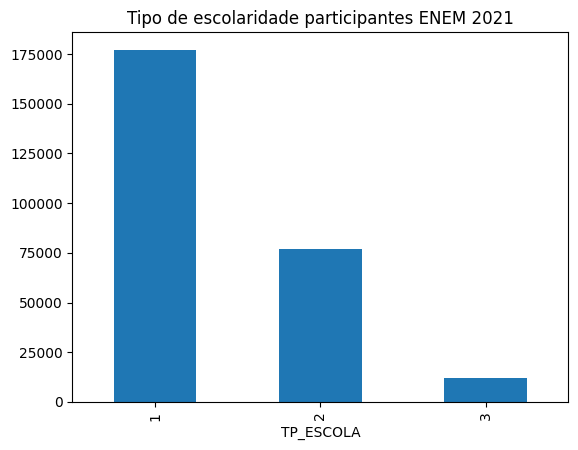

In [60]:
dados["TP_ESCOLA"].value_counts().plot(kind="bar")
plt.title("Tipo de escolaridade participantes ENEM 2021")



*   Gráfico comparando a quantidade de homens e mulheres participantes do ENEM

Text(0.5, 1.0, 'Quantidade de homens e mulheres ENEM 2021')

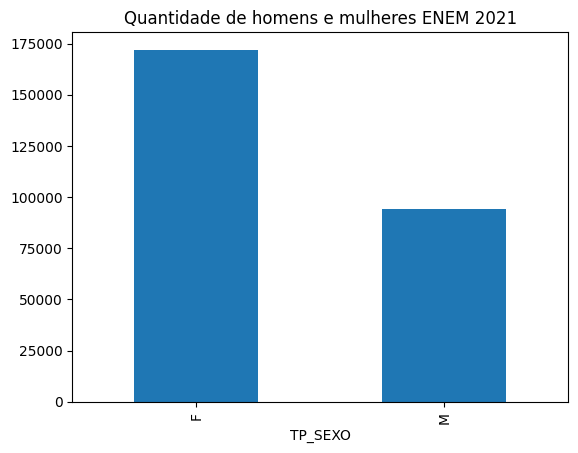

In [61]:
dados["TP_SEXO"].value_counts().plot(kind="bar")
plt.title("Quantidade de homens e mulheres ENEM 2021")

##Melhorando a plotagem



*   Adicionando cores aos gráficos

Text(0, 0.5, 'Quantidade')

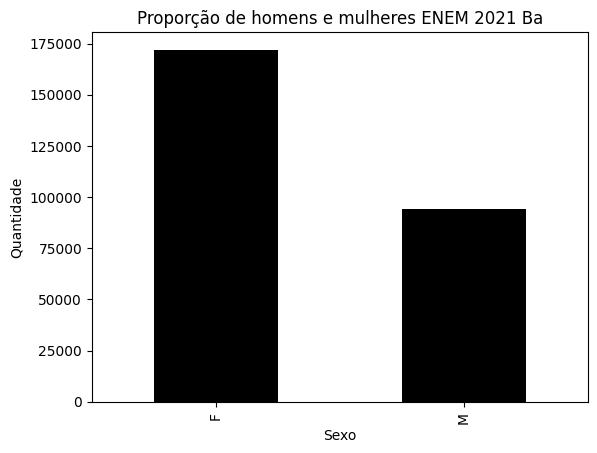

In [62]:
dados["TP_SEXO"].value_counts().plot(kind="bar", color="black")

plt.title("Proporção de homens e mulheres ENEM 2021 Ba")

plt.xlabel("Sexo")
plt.ylabel("Quantidade")

<Axes: title={'center': 'Munícipios da Bahia com maior quantidade de inscritos - ENEM 2021'}, xlabel='Quantidade'>

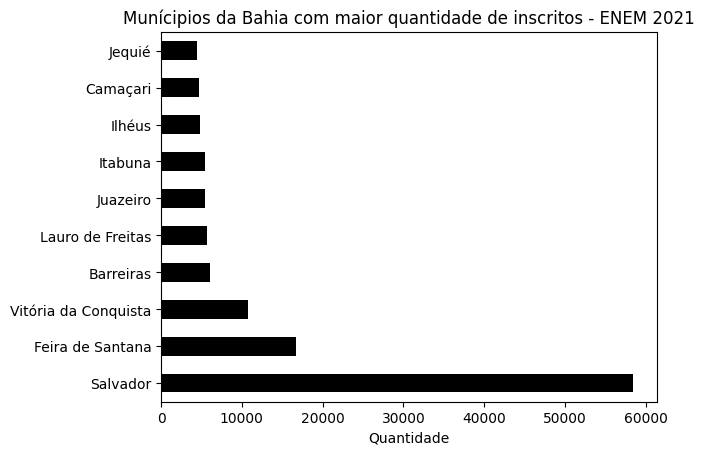

In [63]:
(dados["NO_MUNICIPIO_PROVA"]
.value_counts()

.reset_index()
.rename(columns = {"NO_MUNICIPIO_PROVA":"Municipio","count":"Quantidade"})
.nlargest(n=10, columns = "Quantidade")
.set_index("Municipio")
.plot(
    kind="barh",
    color = "black",
    legend = False,
    xlabel="Quantidade",
    ylabel="",
    title="Munícipios da Bahia com maior quantidade de inscritos - ENEM 2021"
    )
 )

#Gráficos

<Axes: ylabel='Quantidade'>

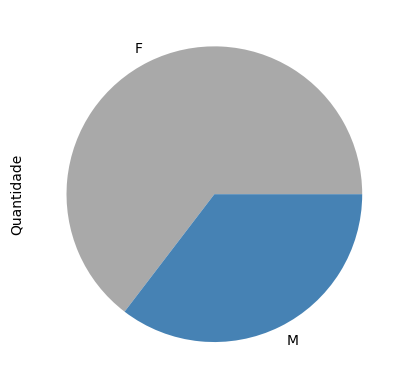

In [64]:
(
  dados['TP_SEXO']
  .value_counts()
  .rename("Quantidade")
  .plot(
      kind="pie",
      colors=["#A9A9A9","#4682B4"]
  )
  )



*   Neste gráfico, é possível observar que, a maioria dos participantes não responderam de qual tipo de escola frequentam/frequentaram, minha conclusão é que a maior são dos que não responderam são de escola pública

<Axes: ylabel='Quantidade'>

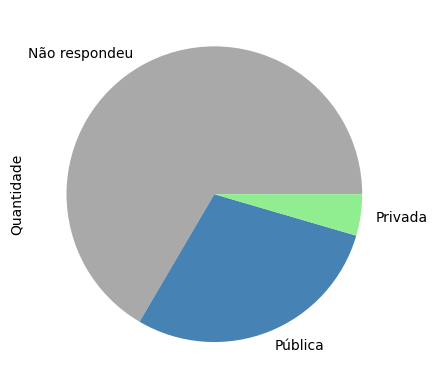

In [65]:
(
  dados["TP_ESCOLA"].map({1:"Não respondeu",2:"Pública",3:"Privada"})
  .value_counts()
  .rename("Quantidade")
  .plot(
      kind="pie",
      colors=["#A9A9A9","#4682B4","#90EE90"]
  )
)



*   Gráfico de dispersão utilizando a nota de matemática e ciências naturais, para procurar alguma relação

<Axes: title={'center': 'Relação prova de matemática e prova de ciências naturais'}, xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

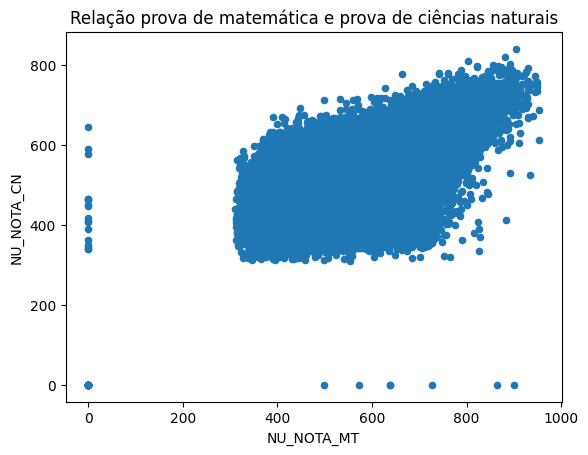

In [66]:
dados.plot( kind = "scatter", x = "NU_NOTA_MT", y = "NU_NOTA_CN", title="Relação prova de matemática e prova de ciências naturais")

<Axes: title={'center': 'Relação prova de linguagens e códigos e ciências humanas'}, xlabel='NU_NOTA_CH', ylabel='NU_NOTA_LC'>

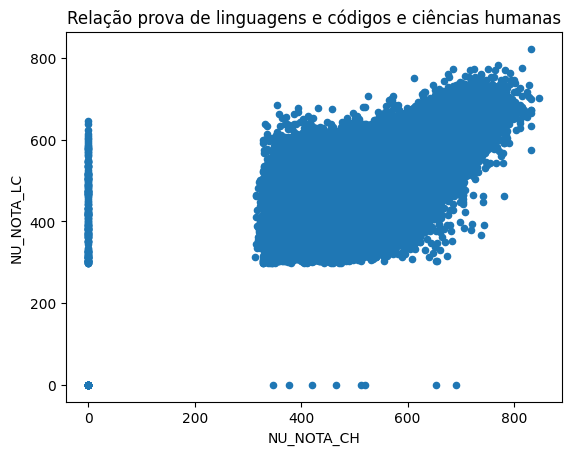

In [67]:
dados.plot( kind = "scatter", x = "NU_NOTA_CH", y = "NU_NOTA_LC", title="Relação prova de linguagens e códigos e ciências humanas")



*   A maior parte das notas de matemática se concentram entre 400 até ~580

<Axes: ylabel='Frequency'>

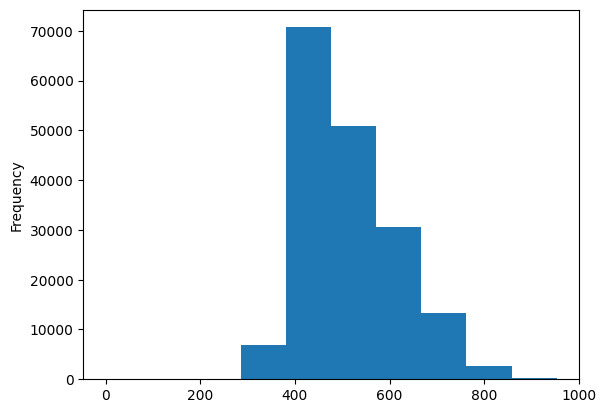

In [68]:
dados.NU_NOTA_MT.plot(kind="hist")



*   Boxplot da nota de matemática, é possível observar uma quantidade até que alta de outliers

<Axes: >

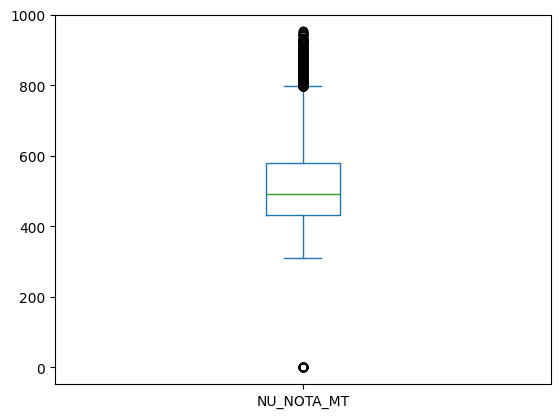

In [69]:
dados.NU_NOTA_MT.plot(kind="box")

In [70]:
dados.NU_NOTA_MT.median()

491.5



*   Boxplot para cada prova do ENEM, a observação dos outliers continua a mesma. Minha conclusão, os participantes considerados outliers são aqueles que provavelmente são de escolas privadas ou estudantes de cursos preparatórios

<Axes: >

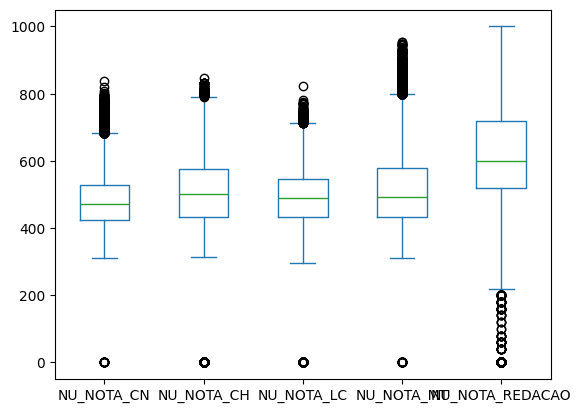

In [71]:
dados[provas].plot(kind="box")

In [72]:
dados[provas].median()

NU_NOTA_CN         470.4
NU_NOTA_CH         502.8
NU_NOTA_LC         490.2
NU_NOTA_MT         491.5
NU_NOTA_REDACAO    600.0
dtype: float64



*   Gráfico de linha referente a nota média dos 5 principais municípios

/tmp/ipython-input-1319593301.py:4: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg({"NU_NOTA_MT":np.mean})


<Axes: title={'center': 'Nota  média em matemática por municipio'}, xlabel='Municipio', ylabel='Nota média'>

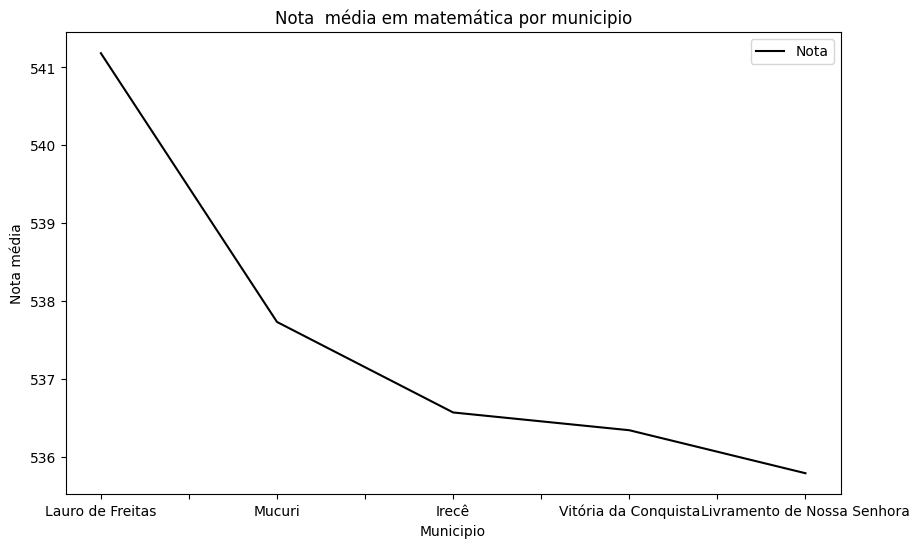

In [73]:
(
    dados
    .groupby(by = ["NO_MUNICIPIO_PROVA"])
    .agg({"NU_NOTA_MT":np.mean})
    .reset_index()
    .rename(columns = {"NU_NOTA_MT":"Nota","NO_MUNICIPIO_PROVA":"Municipio"})
    .nlargest(n=5, columns="Nota")
    .reset_index(drop=True)
    .plot(
        x = "Municipio",
        y = "Nota",
        figsize=(10,6),
        color="k",
        ylabel="Nota média",
        title="Nota  média em matemática por municipio"
)
)

# Ordenação



*   Filtrando apenas as provas, retirando tudo que se refere as competências do ENEM

In [74]:
provas = dados.columns[(dados.columns.str.contains("NOTA") & (~dados.columns.str.contains("COMP")))].to_list()
id_candidato = ["NU_INSCRICAO"]

In [75]:
dados_subset = dados[provas+id_cadidato].sample(n=10, random_state=42)

In [76]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], ascending = False)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
178280       613.0       654.3       615.9       741.8            840.0   
139697       575.5       632.4       605.8       646.8            720.0   
214143       495.0       369.0       558.8       569.3              0.0   
171126       497.6       563.9       522.9       487.3            640.0   
790          492.2       485.9       350.7       456.1            840.0   
170450       353.7       399.1       384.2       418.7            540.0   
142051       467.2       414.9       426.2       375.1            560.0   
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   

        NU_INSCRICAO  
178280  210053210364  
139697  210052665090  
214143  210052874394  
171126  210053136912  
790     210051777239  
170450  210052317290  
142051  210052109412  
21837   210053808044  
182350  210052308566  
235091  210052148365

In [77]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], ascending = True)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
142051       467.2       414.9       426.2       375.1            560.0   
170450       353.7       399.1       384.2       418.7            540.0   
790          492.2       485.9       350.7       456.1            840.0   
171126       497.6       563.9       522.9       487.3            640.0   
214143       495.0       369.0       558.8       569.3              0.0   
139697       575.5       632.4       605.8       646.8            720.0   
178280       613.0       654.3       615.9       741.8            840.0   
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   

        NU_INSCRICAO  
142051  210052109412  
170450  210052317290  
790     210051777239  
171126  210053136912  
214143  210052874394  
139697  210052665090  
178280  210053210364  
21837   210053808044  
182350  210052308566  
235091  210052148365

In [78]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], na_position= "first" ,ascending = False)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   
178280       613.0       654.3       615.9       741.8            840.0   
139697       575.5       632.4       605.8       646.8            720.0   
214143       495.0       369.0       558.8       569.3              0.0   
171126       497.6       563.9       522.9       487.3            640.0   
790          492.2       485.9       350.7       456.1            840.0   
170450       353.7       399.1       384.2       418.7            540.0   
142051       467.2       414.9       426.2       375.1            560.0   

        NU_INSCRICAO  
21837   210053808044  
182350  210052308566  
235091  210052148365  
178280  210053210364  
139697  210052665090  
214143  210052874394  
171126  210053136912  
790     210051777239  
170450  210052317290  
142051  210052109412

In [79]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], na_position= "last" ,ascending = False)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
178280       613.0       654.3       615.9       741.8            840.0   
139697       575.5       632.4       605.8       646.8            720.0   
214143       495.0       369.0       558.8       569.3              0.0   
171126       497.6       563.9       522.9       487.3            640.0   
790          492.2       485.9       350.7       456.1            840.0   
170450       353.7       399.1       384.2       418.7            540.0   
142051       467.2       414.9       426.2       375.1            560.0   
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   

        NU_INSCRICAO  
178280  210053210364  
139697  210052665090  
214143  210052874394  
171126  210053136912  
790     210051777239  
170450  210052317290  
142051  210052109412  
21837   210053808044  
182350  210052308566  
235091  210052148365

In [80]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], na_position= "first" ,ascending = True)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   
142051       467.2       414.9       426.2       375.1            560.0   
170450       353.7       399.1       384.2       418.7            540.0   
790          492.2       485.9       350.7       456.1            840.0   
171126       497.6       563.9       522.9       487.3            640.0   
214143       495.0       369.0       558.8       569.3              0.0   
139697       575.5       632.4       605.8       646.8            720.0   
178280       613.0       654.3       615.9       741.8            840.0   

        NU_INSCRICAO  
21837   210053808044  
182350  210052308566  
235091  210052148365  
142051  210052109412  
170450  210052317290  
790     210051777239  
171126  210053136912  
214143  210052874394  
139697  210052665090  
178280  210053210364

In [81]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], na_position= "last" ,ascending = True)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
142051       467.2       414.9       426.2       375.1            560.0   
170450       353.7       399.1       384.2       418.7            540.0   
790          492.2       485.9       350.7       456.1            840.0   
171126       497.6       563.9       522.9       487.3            640.0   
214143       495.0       369.0       558.8       569.3              0.0   
139697       575.5       632.4       605.8       646.8            720.0   
178280       613.0       654.3       615.9       741.8            840.0   
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   

        NU_INSCRICAO  
142051  210052109412  
170450  210052317290  
790     210051777239  
171126  210053136912  
214143  210052874394  
139697  210052665090  
178280  210053210364  
21837   210053808044  
182350  210052308566  
235091  210052148365

In [82]:
dados_subset.sort_values(by = ["NU_NOTA_MT","NU_NOTA_REDACAO"],ascending = [False,False])

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
178280       613.0       654.3       615.9       741.8            840.0   
139697       575.5       632.4       605.8       646.8            720.0   
214143       495.0       369.0       558.8       569.3              0.0   
171126       497.6       563.9       522.9       487.3            640.0   
790          492.2       485.9       350.7       456.1            840.0   
170450       353.7       399.1       384.2       418.7            540.0   
142051       467.2       414.9       426.2       375.1            560.0   
21837          NaN         NaN         NaN         NaN              NaN   
182350         NaN         NaN         NaN         NaN              NaN   
235091         NaN         NaN         NaN         NaN              NaN   

        NU_INSCRICAO  
178280  210053210364  
139697  210052665090  
214143  210052874394  
171126  210053136912  
790     210051777239  
170450  210052317290  
142051  210052109412  
21837   210053808044  
182350  210052308566  
235091  210052148365

In [83]:
dados_subset.NU_NOTA_MT.sort_values()

142051    375.1
170450    418.7
790       456.1
171126    487.3
214143    569.3
139697    646.8
178280    741.8
21837       NaN
182350      NaN
235091      NaN
Name: NU_NOTA_MT, dtype: float64

In [84]:
dados_subset.NU_NOTA_MT.sort_values(na_position="first")

21837       NaN
182350      NaN
235091      NaN
142051    375.1
170450    418.7
790       456.1
171126    487.3
214143    569.3
139697    646.8
178280    741.8
Name: NU_NOTA_MT, dtype: float64

In [85]:
dados_subset = dados.query("NO_MUNICIPIO_PROVA == 'Salvador'")[id_cadidato+provas]

In [86]:
dados_subset.sort_values(by = ["NU_NOTA_MT"], ascending = False).iloc[:11, :]

NU_INSCRICAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
135490  210052672394       687.5       697.3       664.3       953.1   
40487   210053271130       751.0       720.4       661.1       948.5   
4954    210053763665       754.6       698.1       685.8       944.1   
173100  210053596696       730.8       752.1       684.6       944.1   
118896  210054147919       758.4       752.8       679.7       930.1   
97902   210054079727       741.1       707.9       755.7       930.1   
76017   210052520408       741.7       705.8       655.4       929.8   
222974  210053348040       739.3       684.5       665.9       929.8   
77165   210054118249       667.7       681.3       652.5       928.8   
125578  210053255151       719.5       692.4       647.9       926.8   
50793   210051245410       717.1       774.0       669.3       926.8   

        NU_NOTA_REDACAO  
135490            700.0  
40487             900.0  
4954              920.0  
173100            940.0  
118896            960.0  
97902             940.0  
76017             740.0  
222974            880.0  
77165             860.0  
125578            980.0  
50793             920.0

In [87]:
dados_subset.nlargest(n = 10, columns= "NU_NOTA_MT")

NU_INSCRICAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
135490  210052672394       687.5       697.3       664.3       953.1   
40487   210053271130       751.0       720.4       661.1       948.5   
4954    210053763665       754.6       698.1       685.8       944.1   
173100  210053596696       730.8       752.1       684.6       944.1   
97902   210054079727       741.1       707.9       755.7       930.1   
118896  210054147919       758.4       752.8       679.7       930.1   
76017   210052520408       741.7       705.8       655.4       929.8   
222974  210053348040       739.3       684.5       665.9       929.8   
77165   210054118249       667.7       681.3       652.5       928.8   
50793   210051245410       717.1       774.0       669.3       926.8   

        NU_NOTA_REDACAO  
135490            700.0  
40487             900.0  
4954              920.0  
173100            940.0  
97902             940.0  
118896            960.0  
76017             740.0  
222974            880.0  
77165             860.0  
50793             920.0

In [88]:
dados_subset.sort_values(by = ["NU_NOTA_MT","NU_NOTA_CN"], ascending = False).iloc[:11, :]

NU_INSCRICAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
135490  210052672394       687.5       697.3       664.3       953.1   
40487   210053271130       751.0       720.4       661.1       948.5   
4954    210053763665       754.6       698.1       685.8       944.1   
173100  210053596696       730.8       752.1       684.6       944.1   
118896  210054147919       758.4       752.8       679.7       930.1   
97902   210054079727       741.1       707.9       755.7       930.1   
76017   210052520408       741.7       705.8       655.4       929.8   
222974  210053348040       739.3       684.5       665.9       929.8   
77165   210054118249       667.7       681.3       652.5       928.8   
125578  210053255151       719.5       692.4       647.9       926.8   
50793   210051245410       717.1       774.0       669.3       926.8   

        NU_NOTA_REDACAO  
135490            700.0  
40487             900.0  
4954              920.0  
173100            940.0  
118896            960.0  
97902             940.0  
76017             740.0  
222974            880.0  
77165             860.0  
125578            980.0  
50793             920.0

In [89]:
dados_subset.nlargest(n = 10, columns= ["NU_NOTA_MT", "NU_NOTA_CN"])

NU_INSCRICAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
135490  210052672394       687.5       697.3       664.3       953.1   
40487   210053271130       751.0       720.4       661.1       948.5   
4954    210053763665       754.6       698.1       685.8       944.1   
173100  210053596696       730.8       752.1       684.6       944.1   
118896  210054147919       758.4       752.8       679.7       930.1   
97902   210054079727       741.1       707.9       755.7       930.1   
76017   210052520408       741.7       705.8       655.4       929.8   
222974  210053348040       739.3       684.5       665.9       929.8   
77165   210054118249       667.7       681.3       652.5       928.8   
125578  210053255151       719.5       692.4       647.9       926.8   

        NU_NOTA_REDACAO  
135490            700.0  
40487             900.0  
4954              920.0  
173100            940.0  
118896            960.0  
97902             940.0  
76017             740.0  
222974            880.0  
77165             860.0  
125578            980.0

In [90]:
dados_subset.nsmallest(n = 10, columns= "NU_NOTA_MT")

NU_INSCRICAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
36728   210052910938       448.4         0.0       366.3         0.0   
40997   210053204001       577.5       611.7       637.3         0.0   
99541   210052413138       461.9       340.8       381.5         0.0   
151627  210053516497       389.2         0.0       328.7         0.0   
216695  210054207985         0.0       328.9       364.2         0.0   
237823  210054207908         0.0       389.1       343.9         0.0   
237883  210052783728       339.7       749.7       723.1         0.0   
256745  210051948246       343.3       403.4       337.4         0.0   
263890  210053484663       426.6       502.8       516.5       315.3   
264672  210051870014       421.6       513.2       483.5       315.4   

        NU_NOTA_REDACAO  
36728             600.0  
40997             740.0  
99541             620.0  
151627              0.0  
216695              0.0  
237823            820.0  
237883            440.0  
256745              0.0  
263890            600.0  
264672            480.0

In [91]:
dados_subset.set_index(id_cadidato)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
NU_INSCRICAO                                                                 
210054173438         NaN         NaN         NaN         NaN              NaN
210053741476       453.4       438.3       503.4       379.5            600.0
210054171092         NaN         NaN         NaN         NaN              NaN
210053702687       603.3       622.5       571.7       729.2            860.0
210054087112       414.6       420.5       368.6       399.4            480.0
...                  ...         ...         ...         ...              ...
210053939844         NaN         NaN         NaN         NaN              NaN
210054023670       463.8       474.9       333.3       357.8            280.0
210051995005         NaN         NaN         NaN         NaN              NaN
210053234415         NaN         NaN         NaN         NaN              NaN
210054027870         NaN         NaN         NaN         NaN              NaN

[58502 rows x 5 columns]

In [92]:
dados_teste = dados.copy().sample(10)
dados_teste

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
129847  210051401124    2021                1       M                1   
115597  210053806767    2021                4       M                1   
177728  210052875505    2021               14       F                1   
95995   210053677121    2021                6       F                1   
244269  210053301097    2021                7       F                1   
18755   210051459959    2021                2       F                1   
173931  210052382846    2021                8       F                1   
129537  210053782025    2021                7       M                1   
256782  210051043326    2021               11       M                1   
141796  210053368417    2021                7       F                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
129847            1                 1                4                0   
115597            2                 1                1                2   
177728            3                 1                1               15   
95995             3                 1                1                5   
244269            2                 1                1                5   
18755             1                 1                3                0   
173931            3                 1                1                6   
129537            0                 1                1                3   
256782            2                 1                1                4   
141796            2                 1                1                1   

        TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
129847          1        NaN             0               NaN              NaN   
115597          1        NaN             0               NaN              NaN   
177728          1        NaN             0               NaN              NaN   
95995           1        NaN             0               NaN              NaN   
244269          1        NaN             0               NaN              NaN   
18755           1        NaN             1               NaN              NaN   
173931          1        NaN             0               NaN              NaN   
129537          1        NaN             0               NaN              NaN   
256782          1        NaN             0               NaN              NaN   
141796          1        NaN             0               NaN              NaN   

        CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
129847        NaN       NaN                     NaN                 NaN   
115597        NaN       NaN                     NaN                 NaN   
177728        NaN       NaN                     NaN                 NaN   
95995         NaN       NaN                     NaN                 NaN   
244269        NaN       NaN                     NaN                 NaN   
18755         NaN       NaN                     NaN                 NaN   
173931        NaN       NaN                     NaN                 NaN   
129537        NaN       NaN                     NaN                 NaN   
256782        NaN       NaN                     NaN                 NaN   
141796        NaN       NaN                     NaN                 NaN   

        TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA  NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
129847              NaN             2927408            Salvador           29   
115597              NaN             2908408  Conceição do Coité           29   
177728              NaN             2927408            Salvador           29   
95995               NaN             2910800    Feira de Santana           29   
244269              NaN             2928604         Santo Amaro           29   
18755               NaN             2906303         Canavieiras           29   
173931              NaN             2928802       Santo Estêvão           29   
129537   

In [93]:
dados_teste = dados_teste.set_index(["NO_MUNICIPIO_PROVA","TP_SEXO"])

In [94]:
type(dados_teste.index)

pandas.core.indexes.multi.MultiIndex

In [95]:
dados_teste

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  \
NO_MUNICIPIO_PROVA TP_SEXO                                          
Salvador           M        210051401124    2021                1   
Conceição do Coité M        210053806767    2021                4   
Salvador           F        210052875505    2021               14   
Feira de Santana   F        210053677121    2021                6   
Santo Amaro        F        210053301097    2021                7   
Canavieiras        F        210051459959    2021                2   
Santo Estêvão      F        210052382846    2021                8   
Vera Cruz          M        210053782025    2021                7   
Camaçari           M        210051043326    2021               11   
Mutuípe            F        210053368417    2021                7   

                            TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
NO_MUNICIPIO_PROVA TP_SEXO                                                   
Salvador           M                      1            1                 1   
Conceição do Coité M                      1            2                 1   
Salvador           F                      1            3                 1   
Feira de Santana   F                      1            3                 1   
Santo Amaro        F                      1            2                 1   
Canavieiras        F                      1            1                 1   
Santo Estêvão      F                      1            3                 1   
Vera Cruz          M                      1            0                 1   
Camaçari           M                      1            2                 1   
Mutuípe            F                      1            2                 1   

                            TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
NO_MUNICIPIO_PROVA TP_SEXO                                                
Salvador           M                      4                0          1   
Conceição do Coité M                      1                2          1   
Salvador           F                      1               15          1   
Feira de Santana   F                      1                5          1   
Santo Amaro        F                      1                5          1   
Canavieiras        F                      3                0          1   
Santo Estêvão      F                      1                6          1   
Vera Cruz          M                      1                3          1   
Camaçari           M                      1                4          1   
Mutuípe            F                      1                1          1   

                            TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC  \
NO_MUNICIPIO_PROVA TP_SEXO                                              
Salvador           M              NaN             0               NaN   
Conceição do Coité M              NaN             0               NaN   
Salvador           F              NaN             0               NaN   
Feira de Santana   F              NaN             0               NaN   
Santo Amaro        F              NaN             0               NaN   
Canavieiras        F              NaN             1               NaN   
Santo Estêvão      F              NaN             0               NaN   
Vera Cruz          M              NaN             0               NaN   
Camaçari           M              NaN             0               NaN   
Mutuípe            F              NaN             0               NaN   

                           NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  \
NO_MUNICIPIO_PROVA TP_SEXO                                         
Salvador           M                    NaN        NaN       NaN   
Conceição do Coité M                    NaN        NaN       NaN   
Salvador           F                    NaN        NaN       NaN   
Feira de Santana   F                    NaN        NaN       NaN   
Santo Amaro        F                    NaN        NaN       NaN   
Canaviei

In [96]:
dados_teste = dados_teste.reset_index()
dados_teste

NO_MUNICIPIO_PROVA TP_SEXO  NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  \
0            Salvador       M  210051401124    2021                1   
1  Conceição do Coité       M  210053806767    2021                4   
2            Salvador       F  210052875505    2021               14   
3    Feira de Santana       F  210053677121    2021                6   
4         Santo Amaro       F  210053301097    2021                7   
5         Canavieiras       F  210051459959    2021                2   
6       Santo Estêvão       F  210052382846    2021                8   
7           Vera Cruz       M  210053782025    2021                7   
8            Camaçari       M  210051043326    2021               11   
9             Mutuípe       F  210053368417    2021                7   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  \
0                1            1                 1                4   
1                1            2                 1                1   
2                1            3                 1                1   
3                1            3                 1                1   
4                1            2                 1                1   
5                1            1                 1                3   
6                1            3                 1                1   
7                1            0                 1                1   
8                1            2                 1                1   
9                1            2                 1                1   

   TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC  \
0                0          1        NaN             0               NaN   
1                2          1        NaN             0               NaN   
2               15          1        NaN             0               NaN   
3                5          1        NaN             0               NaN   
4                5          1        NaN             0               NaN   
5                0          1        NaN             1               NaN   
6                6          1        NaN             0               NaN   
7                3          1        NaN             0               NaN   
8                4          1        NaN             0               NaN   
9                1          1        NaN             0               NaN   

  NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0              NaN        NaN       NaN                     NaN   
1              NaN        NaN       NaN                     NaN   
2              NaN        NaN       NaN                     NaN   
3              NaN        NaN       NaN                     NaN   
4              NaN        NaN       NaN                     NaN   
5              NaN        NaN       NaN                     NaN   
6              NaN        NaN       NaN                     NaN   
7              NaN        NaN       NaN                     NaN   
8              NaN        NaN       NaN                     NaN   
9              NaN        NaN       NaN                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA  CO_UF_PROVA  \
0                 NaN              NaN             2927408           29   
1                 NaN              NaN             2908408           29   
2                 NaN              NaN             2927408           29   
3                 NaN              NaN             2910800           29   
4                 NaN              NaN             2928604           29   
5                 NaN              NaN             2906303           29   
6                 NaN              NaN             2928802           29   
7                 NaN              NaN             2933208           29   
8                 NaN              NaN             2905701           29   
9                 NaN              NaN             2922409           29   

  SG_UF_PROVA  TP_PRESENCA_CN  TP_PRES

##Média na nota de matemática por gênero

In [97]:
tp_sexo_masc = dados.query("TP_SEXO == 'M'")

In [98]:
tp_sexo_fem = dados.query("TP_SEXO == 'F'")

Nota máxima de matemática do gênero masculino: **953.1**

In [99]:
tp_sexo_masc.NU_NOTA_MT.max()

953.1

Nota máximo de matemática do gênero feminino: **944.1**

In [100]:
tp_sexo_fem.NU_NOTA_MT.max()

944.1

Nota média de matemática do gênero masculino: **538.50**

In [101]:
tp_sexo_masc.NU_NOTA_MT.mean()

np.float64(538.500684898471)

Nota média de matemática do gênero feminino: **499.77**

In [102]:
tp_sexo_fem.NU_NOTA_MT.mean()

np.float64(499.7702519508294)

Mediana de matemática do gênero masculino: **522.0**

In [103]:
tp_sexo_masc.NU_NOTA_MT.median()

522.0

Mediana de matemática do gênero feminino: **478.2**

In [104]:
tp_sexo_fem.NU_NOTA_MT.median()

478.2

In [105]:
provas = dados.columns[(dados.columns.str.contains("NOTA")) & (~dados.columns.str.contains("COMP"))].to_list()
id_cadidato = ["NU_INSCRICAO"]

Sintaxe agregação:

* **df.column.agg_func()**

In [106]:
tp_sexo_masc[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)

/tmp/ipython-input-3474655066.py:1: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tp_sexo_masc[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)
/tmp/ipython-input-3474655066.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tp_sexo_masc[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)
/tmp/ipython-input-3474655066.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  tp_sexo_masc[provas].agg([np.min,

min    mean  median    max
NU_NOTA_CN       0.0  495.43  488.80  839.0
NU_NOTA_CH       0.0  519.71  523.00  846.9
NU_NOTA_LC       0.0  496.80  499.75  773.5
NU_NOTA_MT       0.0  538.50  522.00  953.1
NU_NOTA_REDACAO  0.0  592.53  600.00  980.0

In [107]:
tp_sexo_fem[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)

/tmp/ipython-input-650347609.py:1: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tp_sexo_fem[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)
/tmp/ipython-input-650347609.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tp_sexo_fem[provas].agg([np.min,np.mean,np.median,np.max]).T.round(2)
/tmp/ipython-input-650347609.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  tp_sexo_fem[provas].agg([np.min,np.mea

min    mean  median     max
NU_NOTA_CN       0.0  471.42   462.2   819.4
NU_NOTA_CH       0.0  498.83   493.4   832.5
NU_NOTA_LC       0.0  484.92   485.2   821.6
NU_NOTA_MT       0.0  499.77   478.2   944.1
NU_NOTA_REDACAO  0.0  613.83   600.0  1000.0

In [108]:
dados[dados['NU_NOTA_MT'] == dados['NU_NOTA_MT'].max()]

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
55177   210053912306    2021                2       M                1   
135490  210052672394    2021                6       M                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
55177             3                 1                2                0   
135490            1                 1                1                2   

        TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC  \
55177           3        1.0             0         2933307.0   
135490          1        NaN             0               NaN   

            NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
55177   Vitória da Conquista       29.0        BA                     4.0   
135490                   NaN        NaN       NaN                     NaN   

        TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA  \
55177                  1.0              1.0             2933307   
135490                 NaN              NaN             2927408   

          NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  TP_PRESENCA_CN  \
55177   Vitória da Conquista           29          BA               1   
135490              Salvador           29          BA               1   

        TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  CO_PROVA_CN  \
55177                1               1               1        909.0   
135490               1               1               1        912.0   

        CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NU_NOTA_CN  NU_NOTA_CH  \
55177         881.0        892.0        899.0       611.0       661.2   
135490        882.0        891.0        901.0       687.5       697.3   

        NU_NOTA_LC  NU_NOTA_MT                                TX_RESPOSTAS_CN  \
55177        621.8       953.1  ADEDBBCCABCBCECDCDCEBEDCABBAECECDABDCDCCBACCB   
135490       664.3       953.1  CABDBBEBEEBADACEDDCCCBBCDADCDDAABADCCDDBBCBAB   

                                      TX_RESPOSTAS_CH  \
55177   BEECCAECBADAEADBAAEEDDEBBBADBCBBDBEBCEAECCDBE   
135490  EBACAADBCAEBBABEECBBAEEBBBADCCADBAECBEBBCAEAB   

                                          TX_RESPOSTAS_LC  \
55177   ABEAC99999CDABDABEDCDCBDCDCBDDDBBEADCBEAAECBAA...   
135490  ABABB99999DEEADCADACDBEABDDADBADDCABBAACDBDCCE...   

                                      TX_RESPOSTAS_MT  TP_LINGUA  \
55177   EEAEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB          0   
135490  DCCAEBABDDCABEECCBCCEAADDCEECDEBADCABBDBDEDCE          0   

                                       TX_GABARITO_CN  \
55177   EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD   
135490  DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB   

                                       TX_GABARITO_CH  \
55177   BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA   
135490  EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB   

                                           TX_GABARITO_LC  \
55177   ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...   
135490  ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...   

                                       TX_GABARITO_MT  TP_STATUS_REDACAO  \
55177   EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB                1.0   
135490  DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE                1.0   

        NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
55177           160.0          200.0          160.0          180.0   
135490          140.0          140.0          120.0          160.0   

        NU_NOTA_COMP5  NU_NOTA_REDACAO  
55177           160.0            860.0  
135490          140.0            700.0

Nota máxima matemática

In [109]:
dados.iloc[dados['NU_NOTA_MT'].idxmax(),]

NU_INSCRICAO                                                   210053912306
NU_ANO                                                                 2021
TP_FAIXA_ETARIA                                                           2
TP_SEXO                                                                   M
TP_ESTADO_CIVIL                                                           1
TP_COR_RACA                                                               3
TP_NACIONALIDADE                                                          1
TP_ST_CONCLUSAO                                                           2
TP_ANO_CONCLUIU                                                           0
TP_ESCOLA                                                                 3
TP_ENSINO                                                               1.0
IN_TREINEIRO                                                              0
CO_MUNICIPIO_ESC                                                  2933307.0
NO_MUNICIPIO_ESC                                       Vitória da Conquista
CO_UF_ESC                                                              29.0
SG_UF_ESC                                                                BA
TP_DEPENDENCIA_ADM_ESC                                                  4.0
TP_LOCALIZACAO_ESC                                                      1.0
TP_SIT_FUNC_ESC                                                         1.0
CO_MUNICIPIO_PROVA                                                  2933307
NO_MUNICIPIO_PROVA                                     Vitória da Conquista
CO_UF_PROVA                                                              29
SG_UF_PROVA                                                              BA
TP_PRESENCA_CN                                                            1
TP_PRESENCA_CH                                                            1
TP_PRESENCA_LC                                                            1
TP_PRESENCA_MT                                                            1
CO_PROVA_CN                                                           909.0
CO_PROVA_CH                                                           881.0
CO_PROVA_LC                                                           892.0
CO_PROVA_MT                                                           899.0
NU_NOTA_CN                                                            611.0
NU_NOTA_CH                                                            661.2
NU_NOTA_LC                                                            621.8
NU_NOTA_MT                                                            953.1
TX_RESPOSTAS_CN               ADEDBBCCABCBCECDCDCEBEDCABBAECECDABDCDCCBACCB
TX_RESPOSTAS_CH               BEECCAECBADAEADBAAEEDDEBBBADBCBBDBEBCEAECCDBE
TX_RESPOSTAS_LC           ABEAC99999CDABDABEDCDCBDCDCBDDDBBEADCBEAAECBAA...
TX_RESPOSTAS_MT               EEAEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
TP_LINGUA                                                                 0
TX_GABARITO_CN                EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD
TX_GABARITO_CH                BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA
TX_GABARITO_LC            ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...
TX_GABARITO_MT                EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
TP_STATUS_REDACAO                                                       1.0
NU_NOTA_COMP1                                                         160.0
NU_NOTA_COMP2                                                         200.0
NU_NOTA_COMP3                                                         160.0
NU_NOTA_COMP4                                                         180.0
NU_NOTA_COMP5                                                         160.0
NU_NOTA_REDACAO                                                       860.0
Name: 55177, dtype: object

Nota mínima matemática

In [110]:
dados.iloc[dados['NU_NOTA_MT'].idxmin(),]

NU_INSCRICAO                                                   210053803513
NU_ANO                                                                 2021
TP_FAIXA_ETARIA                                                           3
TP_SEXO                                                                   M
TP_ESTADO_CIVIL                                                           1
TP_COR_RACA                                                               3
TP_NACIONALIDADE                                                          1
TP_ST_CONCLUSAO                                                           2
TP_ANO_CONCLUIU                                                           0
TP_ESCOLA                                                                 2
TP_ENSINO                                                               1.0
IN_TREINEIRO                                                              0
CO_MUNICIPIO_ESC                                                        NaN
NO_MUNICIPIO_ESC                                                        NaN
CO_UF_ESC                                                               NaN
SG_UF_ESC                                                               NaN
TP_DEPENDENCIA_ADM_ESC                                                  NaN
TP_LOCALIZACAO_ESC                                                      NaN
TP_SIT_FUNC_ESC                                                         NaN
CO_MUNICIPIO_PROVA                                                  2913903
NO_MUNICIPIO_PROVA                                                    Ipiaú
CO_UF_PROVA                                                              29
SG_UF_PROVA                                                              BA
TP_PRESENCA_CN                                                            1
TP_PRESENCA_CH                                                            1
TP_PRESENCA_LC                                                            1
TP_PRESENCA_MT                                                            1
CO_PROVA_CN                                                           909.0
CO_PROVA_CH                                                           881.0
CO_PROVA_LC                                                           892.0
CO_PROVA_MT                                                           899.0
NU_NOTA_CN                                                            362.5
NU_NOTA_CH                                                            669.7
NU_NOTA_LC                                                            619.9
NU_NOTA_MT                                                              0.0
TX_RESPOSTAS_CN               AEDCAB..ABCD.C.BBA....C...DCE................
TX_RESPOSTAS_CH               BBECCAEABADBCADCAAAEDBDBBBAABCBCBDBABBEDCCBBA
TX_RESPOSTAS_LC           ABBAC99999CCBDEABEBDDCBDCEEBABDDBEADEEAAAD*DAC...
TX_RESPOSTAS_MT               .............................................
TP_LINGUA                                                                 0
TX_GABARITO_CN                EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD
TX_GABARITO_CH                BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA
TX_GABARITO_LC            ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...
TX_GABARITO_MT                EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
TP_STATUS_REDACAO                                                       1.0
NU_NOTA_COMP1                                                         120.0
NU_NOTA_COMP2                                                         120.0
NU_NOTA_COMP3                                                         120.0
NU_NOTA_COMP4                                                         140.0
NU_NOTA_COMP5                                                         180.0
NU_NOTA_REDACAO                                                       680.0
Name: 7951, dtype: object

Notas da redação sem nulos(na) e sem 0(quem faltou)

In [111]:
mask_1 = dados["NU_NOTA_REDACAO"].notna()
mask_2 = dados["NU_NOTA_REDACAO"] != 0
subset = dados[(mask_1) & (mask_2)]

<Axes: >

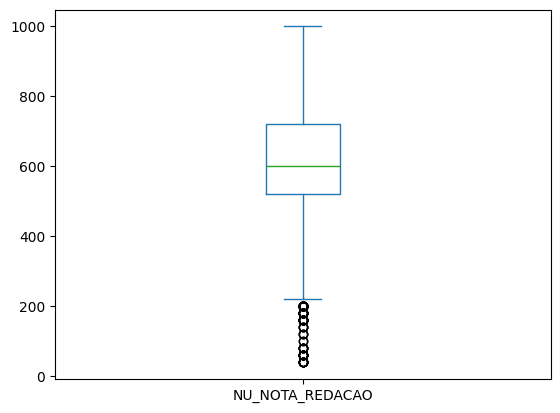

In [112]:
subset.NU_NOTA_REDACAO.plot(kind = "box")

<Axes: >

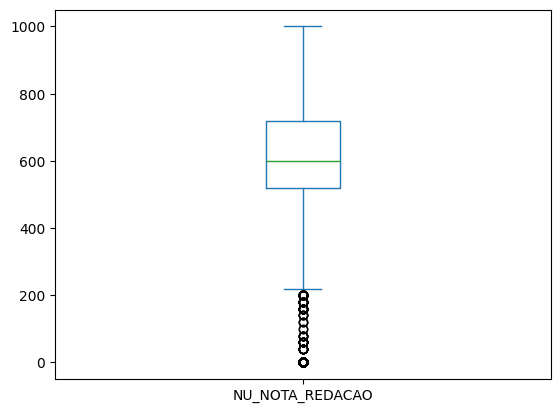

In [113]:
dados.NU_NOTA_REDACAO.plot(kind = "box")



*   Notas da redação feita por um histograma, a média das notas começa em ~430 e vai até ~760

<Axes: ylabel='Frequency'>

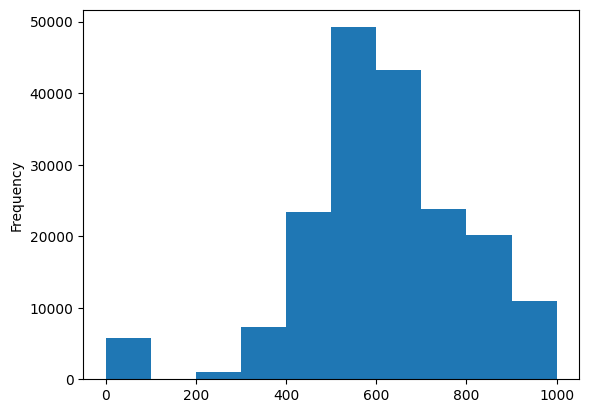

In [114]:
dados.NU_NOTA_REDACAO.plot(kind = "hist")

<Axes: ylabel='Frequency'>

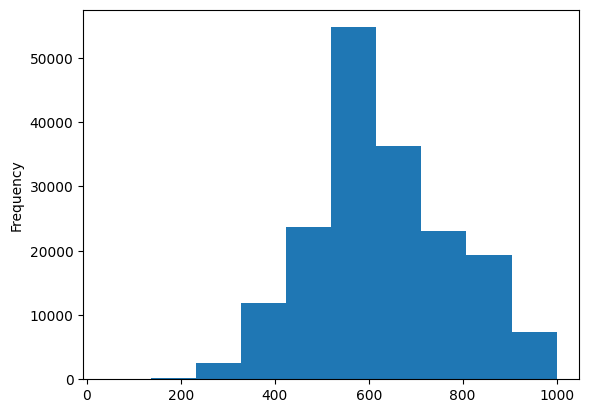

In [115]:
subset.NU_NOTA_REDACAO.plot(kind = "hist")

In [116]:
subset.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])

/tmp/ipython-input-3457714383.py:1: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  subset.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])
/tmp/ipython-input-3457714383.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])
/tmp/ipython-input-3457714383.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  subset.NU_NOTA_REDACAO.agg([np.min,np.mean,np.media

min         40.000000
mean       625.944838
median     600.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

Há uma pequena diferença na média quando se retira valores nulos e 0

In [117]:
dados.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])

/tmp/ipython-input-2888706727.py:1: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dados.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])
/tmp/ipython-input-2888706727.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,np.max])
/tmp/ipython-input-2888706727.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.NU_NOTA_REDACAO.agg([np.min,np.mean,np.median,n

min          0.000000
mean       606.276969
median     600.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

Média das colunas, ou seja, média de cada nota

In [118]:
dados[provas].mean()

NU_NOTA_CN         479.939563
NU_NOTA_CH         506.234466
NU_NOTA_LC         489.131131
NU_NOTA_MT         513.507987
NU_NOTA_REDACAO    606.276969
dtype: float64

Média da nota de cada aluno

In [119]:
dados[provas].mean(axis=1)

0         466.94
1            NaN
2         447.88
3         562.10
4         544.00
           ...  
266189       NaN
266190       NaN
266191       NaN
266192       NaN
266193       NaN
Length: 266194, dtype: float64

In [120]:
mask = (dados[provas].notna()) & (dados[provas] != 0)
subset = dados[(mask.all(axis=1))]
subset[provas].mean(axis=1)

0         466.94
2         447.88
3         562.10
4         544.00
5         466.88
           ...  
266164    484.78
266168    566.96
266174    511.40
266184    371.56
266188    381.96
Length: 170200, dtype: float64

Inputar valor "NaN"

In [121]:
# Esse "-1" representa que o aluno não foi fazer a prova
subset = dados
subset[provas].mean(axis=1).fillna(-1)

0         466.94
1          -1.00
2         447.88
3         562.10
4         544.00
           ...  
266189     -1.00
266190     -1.00
266191     -1.00
266192     -1.00
266193     -1.00
Length: 266194, dtype: float64

In [122]:
dados_copy = dados.copy()

In [123]:
dados_copy["Media"] = dados_copy[provas].mean(axis=1)
dados_copy["Media"]

0         466.94
1            NaN
2         447.88
3         562.10
4         544.00
           ...  
266189       NaN
266190       NaN
266191       NaN
266192       NaN
266193       NaN
Name: Media, Length: 266194, dtype: float64

In [124]:
dados_copy["Media"].fillna(-1)

0         466.94
1          -1.00
2         447.88
3         562.10
4         544.00
           ...  
266189     -1.00
266190     -1.00
266191     -1.00
266192     -1.00
266193     -1.00
Name: Media, Length: 266194, dtype: float64

In [125]:
dados_copy

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0       210051128744    2021                4       F                1   
1       210054173438    2021                5       F                1   
2       210052118573    2021                3       F                1   
3       210052350230    2021               10       F                1   
4       210053156861    2021                9       M                1   
...              ...     ...              ...     ...              ...   
266189  210051432069    2021               12       M                1   
266190  210051106175    2021               14       M                2   
266191  210051995005    2021               11       M                0   
266192  210053234415    2021               12       M                2   
266193  210054027870    2021                5       F                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 3                 1                2                0   
1                 2                 1                2                0   
2                 3                 1                2                0   
3                 2                 1                1                8   
4                 2                 1                1                5   
...             ...               ...              ...              ...   
266189            3                 1                1                0   
266190            2                 1                1                0   
266191            2                 1                1               12   
266192            2                 1                1               15   
266193            2                 1                1                2   

        TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
0               2        1.0             0               NaN              NaN   
1               2        1.0             0         2927408.0         Salvador   
2               2        1.0             0               NaN              NaN   
3               1        NaN             0               NaN              NaN   
4               1        NaN             0               NaN              NaN   
...           ...        ...           ...               ...              ...   
266189          1        NaN             0               NaN              NaN   
266190          1        NaN             0               NaN              NaN   
266191          1        NaN             0               NaN              NaN   
266192          1        NaN             0               NaN              NaN   
266193          1        NaN             0               NaN              NaN   

        CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0             NaN       NaN                     NaN                 NaN   
1            29.0        BA                     1.0                 1.0   
2             NaN       NaN                     NaN                 NaN   
3             NaN       NaN                     NaN                 NaN   
4             NaN       NaN                     NaN                 NaN   
...           ...       ...                     ...                 ...   
266189        NaN       NaN                     NaN                 NaN   
266190        NaN       NaN                     NaN                 NaN   
266191        NaN       NaN                     NaN                 NaN   
266192        NaN       NaN                     NaN                 NaN   
266193        NaN       NaN                     NaN                 NaN   

        TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
0                   NaN             2927200        Ruy Barbosa           29   
1                   1.0             2927408           Salvador           29   
2                   NaN             2903201          Barreiras           29   
3                   NaN     

##Inputação pela média

In [126]:
Media = np.mean(dados_copy["Media"])

In [127]:
dados_copy["Media"].fillna(Media)

0         466.940000
1         518.129255
2         447.880000
3         562.100000
4         544.000000
             ...    
266189    518.129255
266190    518.129255
266191    518.129255
266192    518.129255
266193    518.129255
Name: Media, Length: 266194, dtype: float64

<Axes: ylabel='Frequency'>

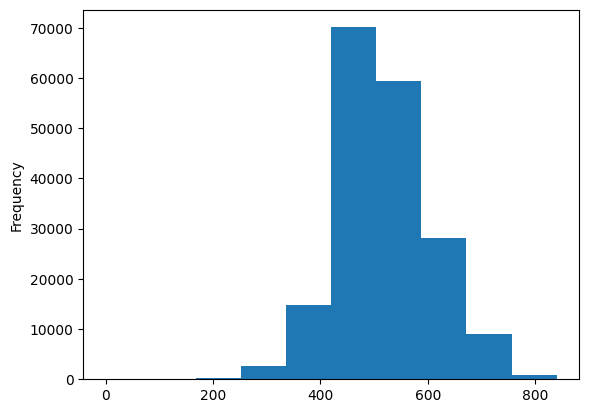

In [128]:
dados_copy["Media"].plot(kind="hist")

<Axes: >

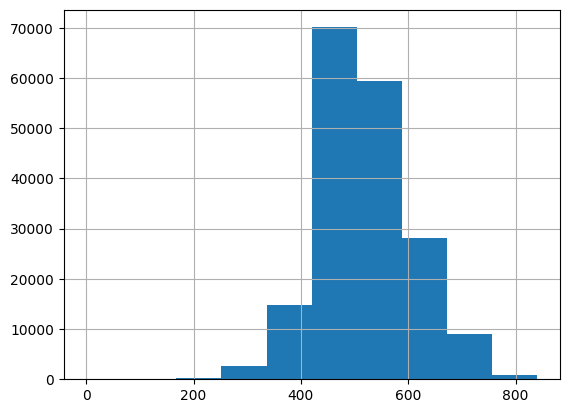

In [129]:
dados_copy["Media"].hist()

##Inputando pela mediana

In [130]:
dados_copy["Media"].median()

509.26000000000005

In [131]:
mediana = dados_copy["Media"].median()

In [132]:
dados_copy["Media"].fillna(mediana)

0         466.94
1         509.26
2         447.88
3         562.10
4         544.00
           ...  
266189    509.26
266190    509.26
266191    509.26
266192    509.26
266193    509.26
Name: Media, Length: 266194, dtype: float64

#Agrupamento


Perguntas:

* Qual a quantidade de pessoas por gênero?

* Qual a distribuição de frequência dos alunos por tipo de escola?

* Qual o desempenho em matemática por tipo de escola?

####Quantidade de pessoas por gênero

In [133]:
dados["TP_SEXO"].value_counts()

TP_SEXO
F    171997
M     94197
Name: count, dtype: int64

In [134]:
dados.groupby(by = "TP_SEXO")["NU_INSCRICAO"].count()

TP_SEXO
F    171997
M     94197
Name: NU_INSCRICAO, dtype: int64

### Distribuição de frequência dos alunos por tipo de escola

In [135]:
dados["TP_ESCOLA"].value_counts()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: count, dtype: int64

In [136]:
dados.groupby(by = ["TP_ESCOLA", "TP_SEXO"])["NU_INSCRICAO"].count()

TP_ESCOLA  TP_SEXO
1          F          114715
           M           62455
2          F           50561
           M           26423
3          F            6721
           M            5319
Name: NU_INSCRICAO, dtype: int64

###Desempenho em matemática por tipo de escola

* 1 --> Não respondeu

* 2 --> Escola pública

* 3 --> Escola privada

In [137]:
dados.groupby(by = ["TP_ESCOLA"])["NU_NOTA_MT"].median()

TP_ESCOLA
1    497.8
2    468.9
3    581.6
Name: NU_NOTA_MT, dtype: float64

Nota de redação na escola privada para o sexo masculino é maior por 160 pontos do que a pública

In [138]:
dados.groupby(by = ["TP_ESCOLA","TP_SEXO"])[["NU_NOTA_MT", "NU_NOTA_REDACAO"]].median()

NU_NOTA_MT  NU_NOTA_REDACAO
TP_ESCOLA TP_SEXO                             
1         F             483.8            600.0
          M             529.1            600.0
2         F             459.3            580.0
          M             492.5            560.0
3         F             563.7            780.0
          M             605.2            720.0



*   Nota de matemática + nota de redação pelo tipo de escola, é possível observar que quem estuda em escola privada tem maiores notas.

In [139]:
(dados
 .groupby(by = ["TP_ESCOLA"])
 .agg(
     {
         "NU_NOTA_MT":[np.mean, np.median],
         "NU_NOTA_REDACAO":[np.mean, np.median]
     }
    )
 )

/tmp/ipython-input-2915633920.py:3: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(
/tmp/ipython-input-2915633920.py:3: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(


NU_NOTA_MT        NU_NOTA_REDACAO       
                 mean median            mean median
TP_ESCOLA                                          
1          519.016313  497.8      613.733176  600.0
2          487.375050  468.9      564.473944  560.0
3          579.833900  581.6      731.275352  740.0

### Nota média por município

In [140]:
dados.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210051128744    2021                4       F                1   
1  210054173438    2021                5       F                1   
2  210052118573    2021                3       F                1   
3  210052350230    2021               10       F                1   
4  210053156861    2021                9       M                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            3                 1                2                0          2   
1            2                 1                2                0          2   
2            3                 1                2                0          2   
3            2                 1                1                8          1   
4            2                 1                1                5          1   

   TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  CO_UF_ESC  \
0        1.0             0               NaN              NaN        NaN   
1        1.0             0         2927408.0         Salvador       29.0   
2        1.0             0               NaN              NaN        NaN   
3        NaN             0               NaN              NaN        NaN   
4        NaN             0               NaN              NaN        NaN   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0       NaN                     NaN                 NaN              NaN   
1        BA                     1.0                 1.0              1.0   
2       NaN                     NaN                 NaN              NaN   
3       NaN                     NaN                 NaN              NaN   
4       NaN                     NaN                 NaN              NaN   

   CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
0             2927200        Ruy Barbosa           29          BA   
1             2927408           Salvador           29          BA   
2             2903201          Barreiras           29          BA   
3             2928802      Santo Estêvão           29          BA   
4             2910800   Feira de Santana           29          BA   

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0               1               1               1               1   
1               0               0               0               0   
2               1               1               1               1   
3               1               1               1               1   
4               1               1               1               1   

   CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0        909.0        881.0        892.0        899.0       507.6       539.2   
1          NaN          NaN          NaN          NaN         NaN         NaN   
2        912.0        882.0        891.0        901.0       439.6       437.7   
3        911.0        880.0        890.0        902.0       548.1       619.5   
4       1014.0       1000.0       1004.0       1010.0       465.2       613.1   

   NU_NOTA_LC  NU_NOTA_MT                                TX_RESPOSTAS_CN  \
0       494.6       413.3  BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED   
1         NaN         NaN                                            NaN   
2       455.9       446.2  BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA   
3       676.3       386.6  CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE   
4       522.1       579.6  CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD   

                                 TX_RESPOSTAS_CH  \
0  EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD   
1                                            NaN   
2  AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB   
3  DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD   
4  CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC   

                                     TX_RESPOSTAS_LC  \
0  99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEA

In [141]:
dados["NO_MUNICIPIO_PROVA"].value_counts()

NO_MUNICIPIO_PROVA
Salvador                58502
Feira de Santana        16689
Vitória da Conquista    10792
Barreiras                6083
Lauro de Freitas         5647
                        ...  
Sento Sé                  200
São Félix                 179
Itanhém                   175
Riachão das Neves         172
Jussara                   165
Name: count, Length: 162, dtype: int64

In [142]:
dados.groupby(by = ["NO_MUNICIPIO_PROVA"]).agg({"NU_NOTA_MT":[np.mean, np.median]})

/tmp/ipython-input-2522409895.py:1: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados.groupby(by = ["NO_MUNICIPIO_PROVA"]).agg({"NU_NOTA_MT":[np.mean, np.median]})
/tmp/ipython-input-2522409895.py:1: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  dados.groupby(by = ["NO_MUNICIPIO_PROVA"]).agg({"NU_NOTA_MT":[np.mean, np.median]})


NU_NOTA_MT        
                            mean  median
NO_MUNICIPIO_PROVA                      
Alagoinhas            506.222627  485.70
Amargosa              496.681257  471.40
Amélia Rodrigues      494.082477  477.80
Anagé                 483.266007  460.20
Araci                 491.838682  468.30
...                          ...     ...
Valente               497.559609  478.40
Valença               504.030904  482.50
Vera Cruz             482.213947  462.95
Vitória da Conquista  536.342491  517.30
Xique-Xique           488.502251  474.35

[162 rows x 2 columns]



*   Média e mediana de matemática dos municípios participantes do ENEM

In [143]:
(
 dados
 .groupby(by = ["NO_MUNICIPIO_PROVA"])["NU_NOTA_MT"]
 .agg([np.mean, np.median])
 .reset_index(drop = False)
 .rename(
     columns ={
         'NO_MUNICIPIO_PROVA':"Municipio",
         "mean":"Media",
         "median":"Mediana"
     })
 .sort_values(by = ["Media","Mediana"], ascending = False)
)

/tmp/ipython-input-832490819.py:4: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.mean, np.median])
/tmp/ipython-input-832490819.py:4: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg([np.mean, np.median])


Municipio       Media  Mediana
86              Lauro de Freitas  541.182185    525.9
98                        Mucuri  537.732288    519.9
65                         Irecê  536.570434    525.8
160         Vitória da Conquista  536.342491    517.3
87   Livramento de Nossa Senhora  535.790490    520.6
..                           ...         ...      ...
52          Formosa do Rio Preto  473.570745    458.1
30                    Carinhanha  473.010835    453.7
143       São Francisco do Conde  469.994737    450.0
154                    Umburanas  464.582090    453.5
144                    São Félix  452.027200    434.4

[162 rows x 3 columns]

In [144]:
(
 dados
 .groupby(by = ["NO_MUNICIPIO_PROVA"])["NU_NOTA_MT"]
 .agg([np.mean, np.median])
 .reset_index(drop = False)
 .rename(
     columns ={
         "O_MUNICIPIO_PROVA":"Municipio",
         "mean":"Media",
         "median":"Mediana"
     })
 .sort_values(by = ["Media","Mediana"], ascending = False)
 .reset_index(drop = True)
)

/tmp/ipython-input-956561763.py:4: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.mean, np.median])
/tmp/ipython-input-956561763.py:4: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg([np.mean, np.median])


NO_MUNICIPIO_PROVA       Media  Mediana
0               Lauro de Freitas  541.182185    525.9
1                         Mucuri  537.732288    519.9
2                          Irecê  536.570434    525.8
3           Vitória da Conquista  536.342491    517.3
4    Livramento de Nossa Senhora  535.790490    520.6
..                           ...         ...      ...
157         Formosa do Rio Preto  473.570745    458.1
158                   Carinhanha  473.010835    453.7
159       São Francisco do Conde  469.994737    450.0
160                    Umburanas  464.582090    453.5
161                    São Félix  452.027200    434.4

[162 rows x 3 columns]

In [145]:
(
    dados
    .query("NU_NOTA_MT != 0")
    .groupby(
        by=['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'],
        as_index=False
    )['NU_NOTA_MT']
    .agg([np.min, np.mean, np.median, np.max])
    .reset_index(drop=True)
    .rename(
        columns={
            'CO_MUNICIPIO_PROVA': 'COD_IBGE',
            'NO_MUNICIPIO_PROVA': 'Municipio',
            'min': 'Minimo',
            'mean': 'Media',
            'median': 'Mediana',
            'max': 'Maximo'
        }
    )
    .sort_values(by=['Maximo','Media', 'Mediana'], ascending=False)
    .reset_index(drop=True)
)


/tmp/ipython-input-2422613127.py:8: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-2422613127.py:8: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-2422613127.py:8: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-242261

Municipio  COD_IBGE  Minimo       Media  Mediana  Maximo
0      Vitória da Conquista   2933307   315.5  536.491289   517.30   953.1
1                  Salvador   2927408   315.3  534.623544   515.60   953.1
2                 Barreiras   2903201   318.8  517.589528   496.80   948.8
3          Feira de Santana   2910800   316.0  525.103365   502.90   948.5
4                  Serrinha   2930501   346.8  501.138564   479.85   948.5
..                      ...       ...     ...         ...      ...     ...
157               Cansanção   2906808   360.9  475.027413   459.20   726.9
158  Oliveira dos Brejinhos   2923209   380.6  505.673239   488.10   707.2
159                Sento Sé   2930204   367.8  476.352846   462.30   702.3
160               Umburanas   2932457   357.6  464.582090   453.50   686.9
161               Caravelas   2906907   352.9  490.168085   480.50   680.2

[162 rows x 6 columns]

In [146]:
dados_visao_municipio = (
    dados
    .query("NU_NOTA_MT != 0")
    .groupby(
        by=['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'],
        as_index=False
    )['NU_NOTA_MT']
    .agg([np.min, np.mean, np.median, np.max])
    .reset_index(drop=True)
    .rename(
        columns={
            'CO_MUNICIPIO_PROVA': 'COD_IBGE',
            'NO_MUNICIPIO_PROVA': 'Municipio',
            'min': 'Minimo_MT',
            'mean': 'Media_MT',
            'median': 'Mediana_MT',
            'max': 'Maximo_MT'
        }
    )
    .sort_values(by=['Maximo_MT','Media_MT', 'Mediana_MT'], ascending=False)
    .reset_index(drop=True)
)


/tmp/ipython-input-2534572106.py:8: FutureWarning: The provided callable <function min at 0x7ea02c352f20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-2534572106.py:8: FutureWarning: The provided callable <function mean at 0x7ea02c3537e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-2534572106.py:8: FutureWarning: The provided callable <function median at 0x7ea0297abb00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg([np.min, np.mean, np.median, np.max])
/tmp/ipython-input-253457

In [147]:
dados_visao_municipio

Municipio  COD_IBGE  Minimo_MT    Media_MT  Mediana_MT  \
0      Vitória da Conquista   2933307      315.5  536.491289      517.30   
1                  Salvador   2927408      315.3  534.623544      515.60   
2                 Barreiras   2903201      318.8  517.589528      496.80   
3          Feira de Santana   2910800      316.0  525.103365      502.90   
4                  Serrinha   2930501      346.8  501.138564      479.85   
..                      ...       ...        ...         ...         ...   
157               Cansanção   2906808      360.9  475.027413      459.20   
158  Oliveira dos Brejinhos   2923209      380.6  505.673239      488.10   
159                Sento Sé   2930204      367.8  476.352846      462.30   
160               Umburanas   2932457      357.6  464.582090      453.50   
161               Caravelas   2906907      352.9  490.168085      480.50   

     Maximo_MT  
0        953.1  
1        953.1  
2        948.8  
3        948.5  
4        948.5  
..         ...  
157      726.9  
158      707.2  
159      702.3  
160      686.9  
161      680.2  

[162 rows x 6 columns]

In [148]:
dados_quantidade_inscritos = (
    dados.groupby(by = ["NO_MUNICIPIO_PROVA", "CO_MUNICIPIO_PROVA"], as_index = False)["NU_INSCRICAO"]
    .count()
    .rename(columns = {"NO_MUNICIPIO_PROVA":"Municipio",
                       "CO_MUNICIPIO_PROVA":"COD_IBGE",
                       "NU_INSCRICAO":"Quantidade_inscritos"})
    .sort_values(by = "Quantidade_inscritos", ascending = False)
    .reset_index(drop=True)
)

In [149]:
dados_quantidade_inscritos

Municipio  COD_IBGE  Quantidade_inscritos
0                Salvador   2927408                 58502
1        Feira de Santana   2910800                 16689
2    Vitória da Conquista   2933307                 10792
3               Barreiras   2903201                  6083
4        Lauro de Freitas   2919207                  5647
..                    ...       ...                   ...
157              Sento Sé   2930204                   200
158             São Félix   2929008                   179
159               Itanhém   2916005                   175
160     Riachão das Neves   2926202                   172
161               Jussara   2918506                   165

[162 rows x 3 columns]

In [150]:
total = dados_quantidade_inscritos["Quantidade_inscritos"].sum()

dados_quantidade_inscritos["Percentual_inscritos"] = ((dados_quantidade_inscritos["Quantidade_inscritos"] /total) * 100).round(2)

In [151]:
dados_quantidade_inscritos["NU_ANO"] = 2021

In [152]:
dados_visao_municipio

Municipio  COD_IBGE  Minimo_MT    Media_MT  Mediana_MT  \
0      Vitória da Conquista   2933307      315.5  536.491289      517.30   
1                  Salvador   2927408      315.3  534.623544      515.60   
2                 Barreiras   2903201      318.8  517.589528      496.80   
3          Feira de Santana   2910800      316.0  525.103365      502.90   
4                  Serrinha   2930501      346.8  501.138564      479.85   
..                      ...       ...        ...         ...         ...   
157               Cansanção   2906808      360.9  475.027413      459.20   
158  Oliveira dos Brejinhos   2923209      380.6  505.673239      488.10   
159                Sento Sé   2930204      367.8  476.352846      462.30   
160               Umburanas   2932457      357.6  464.582090      453.50   
161               Caravelas   2906907      352.9  490.168085      480.50   

     Maximo_MT  
0        953.1  
1        953.1  
2        948.8  
3        948.5  
4        948.5  
..         ...  
157      726.9  
158      707.2  
159      702.3  
160      686.9  
161      680.2  

[162 rows x 6 columns]

In [153]:
dados_quantidade_inscritos

Municipio  COD_IBGE  Quantidade_inscritos  \
0                Salvador   2927408                 58502   
1        Feira de Santana   2910800                 16689   
2    Vitória da Conquista   2933307                 10792   
3               Barreiras   2903201                  6083   
4        Lauro de Freitas   2919207                  5647   
..                    ...       ...                   ...   
157              Sento Sé   2930204                   200   
158             São Félix   2929008                   179   
159               Itanhém   2916005                   175   
160     Riachão das Neves   2926202                   172   
161               Jussara   2918506                   165   

     Percentual_inscritos  NU_ANO  
0                   21.98    2021  
1                    6.27    2021  
2                    4.05    2021  
3                    2.29    2021  
4                    2.12    2021  
..                    ...     ...  
157                  0.08    2021  
158                  0.07    2021  
159                  0.07    2021  
160                  0.06    2021  
161                  0.06    2021  

[162 rows x 5 columns]

Mesclando dois DataFrames

In [154]:
dados_municipio = pd.merge(
    dados_visao_municipio,
    dados_quantidade_inscritos.drop(columns= ["Municipio"]),
    on = "COD_IBGE",
    how = "inner"
    )

In [155]:
dados_municipio.head()

Municipio  COD_IBGE  Minimo_MT    Media_MT  Mediana_MT  \
0  Vitória da Conquista   2933307      315.5  536.491289      517.30   
1              Salvador   2927408      315.3  534.623544      515.60   
2             Barreiras   2903201      318.8  517.589528      496.80   
3      Feira de Santana   2910800      316.0  525.103365      502.90   
4              Serrinha   2930501      346.8  501.138564      479.85   

   Maximo_MT  Quantidade_inscritos  Percentual_inscritos  NU_ANO  
0      953.1                 10792                  4.05    2021  
1      953.1                 58502                 21.98    2021  
2      948.8                  6083                  2.29    2021  
3      948.5                 16689                  6.27    2021  
4      948.5                  2802                  1.05    2021

# Visualização geográfica

In [156]:
!pip install geobr geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
  Attempting uninstall: lxml
    Found existing installation: lxml 6.0.2
    Uninstalling lxml-6.0.2:
      Successfully uninstalled lxml-6.0.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.2
    Uninstalling geopandas-1.1.2:
      Successfully uninstalled geopandas-1.1.2




*   Realizando novamente a instalação das bibliotecas

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geobr
import warnings

pd.set_option("display.max_columns",140)
pd.set_option("display.max_rows",140)

warnings.filterwarnings("ignore")



*   Funções que serão utilizadas durante as plotagens

In [158]:

def gerar_histograma(data_frame,
                     variavel,
                     bins=30,
                     color='red',
                     xlabel='Variável',
                     ylabel='Frequência',
                     titulo='Histograma',
                     fontsize=15,
                     fontweight='bold',
                     figsize=(8, 5)):

    fig, ax = plt.subplots(figsize=figsize)
    ax.hist(data_frame[variavel], bins=bins, color=color)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(titulo, fontsize=fontsize, fontweight=fontweight)

def gerar_painel_barra(data_frame,
                      var,
                      hue=None,
                      title='',
                      title_subplot_1='',
                      title_subplot_2='',
                      legend_subplot_2='',
                      xlabel='Quantidade',
                      ylabel='',
                      figsize=(12, 6)):

    fig, ax = plt.subplots(1, 2, figsize=figsize)

    sns.countplot(data=data_frame, y=var, ax=ax[0])
    sns.countplot(data=data_frame, y=var, hue=hue, ax=ax[1])

    ax[0].set(ylabel=ylabel, xlabel=xlabel, title=title_subplot_1)
    ax[1].set(ylabel=ylabel, xlabel=xlabel, title=title_subplot_2)
    if legend_subplot_2:
        ax[1].legend(title=legend_subplot_2)
    fig.suptitle(title)
    fig.tight_layout(pad=4)

def check_missing(df):
    """
    Retorna uma Series com percentuais de valores faltantes por coluna (ordenada decrescente).
    """
    missing_pct = df.isnull().mean() * 100
    return missing_pct.sort_values(ascending=False)


def show_percentage_missing(df):
    import matplotlib.pyplot as plt

    missing = check_missing(df)    # Series: index = colunas, values = % missing

    plt.figure(figsize=(10, 20))
    plt.barh(y=missing.index, width=missing.values, color='darkgray', height=0.7, align='edge')
    plt.xlabel('% of missing values', size=10)
    plt.ylabel('Columns', size=10)
    plt.title('Missing Values', fontdict={'color': 'gray', 'weight': 'bold', 'size': 12})
    plt.grid(alpha=0.5)
    plt.show()


def feature_plot_stat(feature, data):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Univariate analysis for {feature}')

    sns.histplot(data[feature], kde=True, ax=ax[0])
    ax[0].set_xlabel(f'Distribution of {feature}')

    sns.boxplot(y=data[feature], ax=ax[1])
    sns.violinplot(x=data[feature], ax=ax[2])

    fig.tight_layout(pad=3)


def univariate_analysis(features: list, data=pd.DataFrame()):
    for feature in features:
        feature_plot_stat(feature, data)




*   Renomeando as colunas do dataset "dados_enem_2021_BA_questoes_socieconomicas"

In [159]:
# cols_rename = {
#     'Q001': 'escolaridade_pai',
#     'Q002': 'escolaridade_mae',
#     'Q003': 'ocupacao_pai',
#     'Q004': 'ocupacao_mae',
#     'Q005': 'pessoas_residencia',
#     'Q006': 'renda_mensal_familiar',
#     'Q007': 'empregada_domestico',
#     'Q008': 'quantidade_banheiros',
#     'Q009': 'quantidade_quartos',
#     'Q010': 'quantidade_carros',
#     'Q011': 'quantidade_moto',
#     'Q012': 'geladeira',
#     'Q013': 'freezer',
#     'Q014': 'maquina_lavar',
#     'Q015': 'maquina_secar',
#     'Q016': 'microondas',
#     'Q017': 'lava_louca',
#     'Q018': 'aspirador_po',
#     'Q019': 'TV',
#     'Q020': 'TV_assinatura',
#     'Q021': 'celular',
#     'Q022': 'telefone_fixo',
#     'Q023': 'computador',
#     'Q024': 'internet',

#     'TP_DEPENDENCIA_ADM_ESC': 'DEPENDENCIA_ADM_ESCOLA',
#     'TP_LOCALIZACAO_ESC': 'LOCALIZACAO_ESCOLA',
#     'TP_ESCOLA': 'TIPO_ESCOLA',

#     'NU_NOTA_MT': 'MATEMATICA',
#     'NU_NOTA_CN': 'CIENCIAS_NATUREZA',
#     'NU_NOTA_LC': 'LINGUAGENS',
#     'NU_NOTA_CH': 'HUMANAS',
#     'NU_NOTA_REDACAO': 'REDACAO',
#     'IN_TREINEIRO': 'TREINEIRO'
# }

In [160]:
cols_rename = {
    'Q001': 'escolaridade_pai',
    'Q002': 'escolaridade_mae',
    'Q003': 'ocupacao_pai',
    'Q004': 'ocupacao_mae',
    'Q005': 'pessoas_residencia',
    'Q006': 'renda_mensal_familiar',
    'Q007': 'empregada_domestico',
    'Q008': 'quantidade_banheiros',
    'Q009': 'quantidade_quartos',
    'Q010': 'quantidade_carros',
    'Q011': 'quantidade_moto',
    'Q012': 'geladeira',
    'Q013': 'freezer',
    'Q014': 'maquina_lavar',
    'Q015': 'maquina_secar',
    'Q016': 'microondas',
    'Q017': 'lava_louca',
    'Q018': 'aspirador_po',
    'Q019': 'TV',
    'Q020': 'aparelho_DVD',
    'Q021': 'TV_assinatura',
    'Q022': 'telefone_celular',
    'Q023': 'telefone_fixo',
    'Q024': 'computador',
    'Q025': 'internet',

    'TP_DEPENDENCIA_ADM_ESC': 'DEPENDENCIA_ADM_ESCOLA',
    'TP_LOCALIZACAO_ESC': 'LOCALIZACAO_ESCOLA',
    'TP_ESCOLA': 'TIPO_ESCOLA',

    'NU_NOTA_MT': 'MATEMATICA',
    'NU_NOTA_CN': 'CIENCIAS_NATUREZA',
    'NU_NOTA_LC': 'LINGUAGENS',
    'NU_NOTA_CH': 'HUMANAS',
    'NU_NOTA_REDACAO': 'REDACAO',
    'IN_TREINEIRO': 'TREINEIRO'
}



*   Dropando colunas e criando funções para converterem números em textos, exemplo, estado_civil = 0 em "Não informado"



*   Função criada para dropar colunas não desejadas, renomear colunas que sobraram, selecionar provas estabelecidas, dropar dados faltantes (NA) e retornar o dataframe



*   Traduzindo todas as colunas do tipo object|



In [161]:
cols_drop = [
    'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
    'TX_GABARITO_LC', 'TX_GABARITO_MT', 'SG_UF_PROVA',
    'CO_PROVA_CH', 'CO_PROVA_MT', 'CO_PROVA_LC', 'CO_PROVA_CN',
    'TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'
]


def editar_estado_civil(estado_civil):
    if estado_civil == 0:
        return 'Não Informado'
    elif estado_civil == 1:
        return 'Solteiro(a)'
    elif estado_civil == 2:
        return 'Casado(a)'
    elif estado_civil == 3:
        return 'Divorciado(a)'
    else:
        return 'Viúvo(a)'


def editar_sexo(sexo):
    if sexo == "M":
        return "Masculino"
    else:
        return "Feminino"


def editar_cor_raca(cor_raca):
    if cor_raca == 0:
        return "Não informado"
    elif cor_raca == 1:
        return "Branca"
    elif cor_raca == 2:
        return "Preta"
    elif cor_raca == 3:
        return "Parda"
    elif cor_raca == 4:
        return "Amarela"
    else:
        return "Indígena"


def editar_escola(escola):
    if pd.isna(escola):
        return "NA"
    try:
        escola_int = int(escola)
        if escola_int == 1:
            return "Não respondeu"
        elif escola_int == 2:
            return "Pública"
        elif escola_int == 3:
            return "Privada"
        else:
            return "NA"
    except ValueError:
        return "NA"

def editar_nacionalidade(nacionalidade):
    if (nacionalidade == 0):
        return "Não informado"
    elif (nacionalidade == 1):
        return "Brasileiro(a)"
    elif (nacionalidade == 2):
        return "Brasileiro(a) naturalizado(a)"
    elif (nacionalidade == 3):
        return "Estrangeiro"
    elif (nacionalidade == 4):
        return "Brasileiro(a) Nato(a), nascido(a) no exterior"
    else:
        return "NA"

def editar_faixa_etaria(faixa_etaria):
    if (faixa_etaria == 1):
        return "Menor de 17 anos"
    elif (faixa_etaria == 2):
        return "17 anos"
    elif (faixa_etaria == 3):
        return "18 anos"
    elif (faixa_etaria == 4):
        return "19 anos"
    elif (faixa_etaria == 5):
        return "20 anos"
    elif (faixa_etaria == 6):
        return "21 anos"
    elif (faixa_etaria == 7):
        return "22 anos"
    elif (faixa_etaria == 8):
        return "23 anos"
    elif (faixa_etaria == 9):
        return "24 anos"
    elif (faixa_etaria == 10):
        return "25 anos"
    elif (faixa_etaria == 11):
        return "Entre 26 e 30 anos"
    elif (faixa_etaria == 12):
        return "Entre 31 e 35 anos"
    elif (faixa_etaria == 13):
        return "Entre 36 e 40 anos"
    elif (faixa_etaria == 14):
        return "Entre 41 e 45 anos"
    elif (faixa_etaria == 15):
        return "Entre 46 e 50 anos"
    elif (faixa_etaria == 16):
        return "Entre 51 e 55 anos"
    elif (faixa_etaria == 17):
        return "Entre 56 e 60 anos"
    elif (faixa_etaria == 18):
        return "Entre 61 e 65 anos"
    elif (faixa_etaria == 19):
        return "Entre 66 e 70 anos"
    elif (faixa_etaria == 20):
        return "Maior de 70 anos"
    else:
        return "NA"

def editar_conclusao_ensino(conclusao_ensino):
    if (conclusao_ensino == 1):
        return "Já concluí o Ensino Médio"
    elif (conclusao_ensino == 2):
        return "Estou cursando e concluirei o Ensino Médio em 2021"
    elif (conclusao_ensino == 3):
        return "Estou cursando e concluirei o Ensino Médio após 2021"
    elif (conclusao_ensino == 4):
        return "Não concluí e não estou cursando o Ensino Médio"
    else:
        return "NA"

def editar_ano_conclusao(ano_conclusao):
    if (ano_conclusao == 0):
        return "Não informado"
    elif (ano_conclusao == 1):
        return "2020"
    elif (ano_conclusao == 2):
        return "2019"
    elif (ano_conclusao == 3):
        return "2018"
    elif (ano_conclusao == 4):
        return "2017"
    elif (ano_conclusao == 5):
        return "2016"
    elif (ano_conclusao == 6):
        return "2015"
    elif (ano_conclusao == 7):
        return "2014"
    elif (ano_conclusao == 8):
        return "2013"
    elif (ano_conclusao == 9):
        return "2012"
    elif (ano_conclusao == 10):
        return "2011"
    elif (ano_conclusao == 11):
        return "2010"
    elif (ano_conclusao == 12):
        return "2009"
    elif (ano_conclusao == 13):
        return "2008"
    elif (ano_conclusao == 14):
        return "2007"
    elif (ano_conclusao == 15):
        return "Antes de 2007"
    else:
        return "NA"

def editar_tipo_ensino(tipo_ensino):
    if (tipo_ensino == 1):
        return "Regular"
    elif (tipo_ensino == 2):
        return "Educacao Especial - Modalidade Substitutiva"
    else:
        return "NA"

def editar_treineiro(treineiro):
  if (treineiro == 1):
    return "Sim"
  elif (treineiro == 0):
    return "Não"
  else:
    return "NA"

def editar_lingua(lingua):
  if (lingua == 0):
    return "Inglês"
  elif (lingua == 1):
    return "Espanhol"
  else:
    return "NA"

def editar_dependencia_escola(dep_escola):
    if (dep_escola == 1):
        return "Federal"
    if (dep_escola == 2):
        return "Estadual"
    if (dep_escola == 3):
        return "Municipal"
    if (dep_escola == 4):
        return "Privada"
    else:
        return "NA"

def editar_loc_escola(loc_escola):
    if (loc_escola == 1):
        return "Urbana"
    elif (loc_escola == 2):
        return "Rural"
    else:
        return "NA"

def editar_sit_escola(sit_escola):
    if (sit_escola == 1):
        return "Em atividade"
    elif (sit_escola == 2):
        return "Paralisada"
    elif (sit_escola == 3):
        return "Extinta"
    elif (sit_escola == 4):
        return "Extinta em anos anteriores"
    else:
        return "NA"

# Apartir daqui são questões socioeconômicas


def editar_escol_pai(esc_pai):
  if (esc_pai == "A"):
    return "Nunca estudou"
  if (esc_pai == "B"):
    return "Não completou 4/5 serie EF"
  if (esc_pai == "C"):
    return "Completou 4/5 serie e nao 8/9 serie EF"
  if (esc_pai == "D"):
    return "Completou 8/9 série e nao EM"
  if (esc_pai == "E"):
    return "Completou EM e não faculdade"
  if (esc_pai == "F"):
    return "Completou faculdade e não Pós-grad"
  if (esc_pai == "G"):
    return "Completou Pos-grad"
  if (esc_pai == "H"):
    return "Não sei"
  else:
    return "NA"

def editar_escol_mae(esc_mae):
  if (esc_mae == "A"):
    return "Nunca estudou"
  if (esc_mae == "B"):
    return "Não completou 4/5 serie EF"
  if (esc_mae == "C"):
    return "Completou 4/5 serie e nao 8/9 serie EF"
  if (esc_mae == "D"):
    return "Completou 8/9 série e nao EM"
  if (esc_mae == "E"):
    return "Completou EM e não faculdade"
  if (esc_mae == "F"):
    return "Completou faculdade e não Pós-grad"
  if (esc_mae == "G"):
    return "Completou Pos-grad"
  if (esc_mae == "H"):
    return "Não sei"
  else:
    return "NA"

def editar_ocup_pai(ocp_pai):
  if (ocp_pai == "A"):
    return "Trabalhador Rural/Extrativista"
  if (ocp_pai == "B"):
    return "Trabalhador de Serviços/Apoio"
  if (ocp_pai == "C"):
    return "Trabalhador Industrial/Construção"
  if (ocp_pai == "D"):
    return "Trabalhador Técnico/Supervisor/MEI"
  if (ocp_pai == "E"):
    return "Profissional Nível Superior/Grande Empresário"
  if (ocp_pai == "F"):
    return "Não sei"
  else:
    return "NA"

def editar_ocup_mae(ocp_mae):
  if (ocp_mae == "A"):
    return "Trabalhadora Rural/Extrativista"
  if (ocp_mae == "B"):
    return "Trabalhadora de Serviços/Apoio"
  if (ocp_mae == "C"):
    return "Trabalhadora Industrial/Construção"
  if (ocp_mae == "D"):
    return "Trabalhadora Técnico/Supervisor/MEI"
  if (ocp_mae == "E"):
    return "Profissional Nível Superior/Grande Empresária"
  if (ocp_mae == "F"):
    return "Não sei"
  else:
    return "NA"

def editar_renda_fam(rend_fam):
  if (rend_fam == "A"):
    return "Nenhuma renda"
  if (rend_fam == "B"):
    return "Até 1.100"
  if (rend_fam == "C"):
    return "1.100 a 1.650"
  if (rend_fam == "D"):
    return "1.650 a 2.200"
  if (rend_fam == "E"):
    return "2.200 a 2.750"
  if (rend_fam == "F"):
    return "2.750 a 3.300"
  if (rend_fam == "G"):
    return "3.300 a 4.400"
  if (rend_fam == "H"):
    return "4.400 a 5.500"
  if (rend_fam == "I"):
    return "5.500 a 6.600"
  if (rend_fam == "J"):
    return "6.600 a 7.700"
  if (rend_fam == "K"):
    return "7.700 a 8.800"
  if (rend_fam == "L"):
    return "8.800 a 9.900"
  if (rend_fam == "M"):
    return "9.900 a 11.000"
  if (rend_fam == "N"):
    return "11.000 a 13.200"
  if (rend_fam == "O"):
    return "13.200 a 16.500"
  if (rend_fam == "P"):
    return "16.500 a 22.000"
  if (rend_fam == "Q"):
    return "Acima de 22.000"

def editar_empreg_dom(emp_dom):
  if(emp_dom == "A"):
    return "Não"
  if(emp_dom == "B"):
    return "Sim, 1/2 dias por semana"
  if(emp_dom == "C"):
    return "Sim, 3/4 dias por semana"
  if(emp_dom == "D"):
    return "Sim, pelo menos 5 dias"

def editar_qtd_banheiros(qtd_ban):
  if(qtd_ban == "A"):
    return "Não"
  if(qtd_ban == "B"):
    return "Sim, um"
  if(qtd_ban == "C"):
    return "Sim, dois"
  if(qtd_ban == "D"):
    return "Sim, três"
  if(qtd_ban == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_quartos(qtd_quar):
  if(qtd_quar == "A"):
    return "Não"
  if(qtd_quar == "B"):
    return "Sim, um"
  if(qtd_quar == "C"):
    return "Sim, dois"
  if(qtd_quar == "D"):
    return "Sim, três"
  if(qtd_quar == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_car(qtd_car):
  if(qtd_car == "A"):
    return "Não"
  if(qtd_car == "B"):
    return "Sim, um "
  if(qtd_car == "C"):
    return "Sim, dois"
  if(qtd_car == "D"):
    return "Sim, três"
  if(qtd_car == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_moto(qtd_moto):
  if(qtd_moto == "A"):
    return "Não"
  if(qtd_moto == "B"):
    return "Sim, uma"
  if(qtd_moto == "C"):
    return "Sim, duas"
  if(qtd_moto == "D"):
    return "Sim, três"
  if(qtd_moto == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_geladeira(qtd_gel):
  if(qtd_gel == "A"):
    return "Não"
  if(qtd_gel == "B"):
    return "Sim, uma"
  if(qtd_gel == "C"):
    return "Sim, duas"
  if(qtd_gel == "D"):
    return "Sim, três"
  if(qtd_gel == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_freezer(qtd_fr):
  if(qtd_fr == "A"):
    return "Não"
  if(qtd_fr == "B"):
    return "Sim, um"
  if(qtd_fr == "C"):
    return "Sim, dois"
  if(qtd_fr == "D"):
    return "Sim, três"
  if(qtd_fr == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_maquina_lavar(qtd_maq_lav):
  if(qtd_maq_lav == "A"):
    return "Não"
  if(qtd_maq_lav == "B"):
    return "Sim, uma"
  if(qtd_maq_lav == "C"):
    return "Sim, duas"
  if(qtd_maq_lav == "D"):
    return "Sim, três"
  if(qtd_maq_lav == "E"):
    return "Sim, quatro"

def editar_qtd_maquina_secar(qtd_maq_sec):
  if(qtd_maq_sec == "A"):
    return "Não"
  if(qtd_maq_sec == "B"):
    return "Sim, uma"
  if(qtd_maq_sec == "C"):
    return "Sim, duas"
  if(qtd_maq_sec == "D"):
    return "Sim, três"
  if(qtd_maq_sec == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_microondas(qtd_mcr):
  if(qtd_mcr == "A"):
    return "Não"
  if(qtd_mcr == "B"):
    return "Sim, um"
  if(qtd_mcr == "C"):
    return "Sim, dois"
  if(qtd_mcr == "D"):
    return "Sim, três"
  if(qtd_mcr == "E"):
    return "Sim, quatro ou mais"

def editar_qtd_lava_louca(qtd_lvc):
  if(qtd_lvc == "A"):
    return "Não"
  if(qtd_lvc == "B"):
    return "Sim, uma"
  if(qtd_lvc == "C"):
    return "Sim, duas"
  if(qtd_lvc == "D"):
    return "Sim, três"
  if(qtd_lvc == "E"):
    return "Sim, quatro ou mais"

def editar_aspirador_po(asp):
  if(asp == "A"):
    return "Não"
  if(asp == "B"):
    return "Sim"

def editar_tv(tv):
  if(tv == "A"):
    return "Não"
  if(tv == "B"):
    return "Sim, uma"
  if(tv == "C"):
    return "Sim, duas"
  if(tv == "D"):
    return "Sim, três"
  if(tv == "E"):
    return "Sim, quatro ou mais"

def editar_dvd(dvd):
  if(dvd == "A"):
    return "Não"
  if(dvd == "B"):
    return "Sim"

def editar_tv_assinatura(tv_ass):
  if(tv_ass == "A"):
    return "Não"
  if(tv_ass == "B"):
    return "Sim"

def editar_celular(cel):
  if(cel == "A"):
    return "Não"
  if(cel == "B"):
    return "Sim, um"
  if(cel == "C"):
    return "Sim, dois"
  if(cel == "D"):
    return "Sim, três"
  if(cel == "E"):
    return "Sim, quatro ou mais"

def editar_telefone_fixo(tel_fix):
  if(tel_fix == "A"):
    return "Não"
  if(tel_fix == "B"):
    return "Sim"

def editar_computador(comp):
  if(comp == "A"):
    return "Não"
  if(comp == "B"):
    return "Sim, um"
  if(comp == "C"):
    return "Sim, dois"
  if(comp == "D"):
    return "Sim, três"
  if(comp == "E"):
    return "Sim, quatro ou mais"

def editar_internet(inter):
  if(inter == "A"):
    return "Não"
  if(inter == "B"):
    return "Sim"


In [162]:
def tratar_dados(df):
    # drop de colunas
    df = df.drop(columns=cols_drop, errors='ignore')

    # renomear colunas
    df = df.rename(columns=cols_rename)

    # Ensure unique column names after renaming
    df = df.loc[:, ~df.columns.duplicated()]

    # define a lista de provas que serão analisadas
    provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']

    # trata colunas categóricas
    df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply(editar_estado_civil)
    df['TP_SEXO'] = df['TP_SEXO'].apply(editar_sexo)
    df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(editar_cor_raca)
    df['TIPO_ESCOLA'] = df['TIPO_ESCOLA'].apply(editar_escola)
    df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].apply(editar_nacionalidade)
    df['TP_FAIXA_ETARIA_APOIO'] = df['TP_FAIXA_ETARIA']
    df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(editar_faixa_etaria)
    df["TP_ST_CONCLUSAO"] = df["TP_ST_CONCLUSAO"].apply(editar_conclusao_ensino)
    df["TP_ANO_CONCLUIU"] = df["TP_ANO_CONCLUIU"].apply(editar_ano_conclusao)
    df["TP_ENSINO"] = df["TP_ENSINO"].apply(editar_tipo_ensino)
    df["TREINEIRO"] = df["TREINEIRO"].apply(editar_treineiro)
    df["TP_LINGUA"] = df["TP_LINGUA"].apply(editar_lingua)
    df["DEPENDENCIA_ADM_ESCOLA"] = df["DEPENDENCIA_ADM_ESCOLA"].apply(editar_dependencia_escola)
    df["LOCALIZACAO_ESCOLA"] = df["LOCALIZACAO_ESCOLA"].apply(editar_loc_escola)
    df["TP_SIT_FUNC_ESC"] = df["TP_SIT_FUNC_ESC"].apply(editar_sit_escola)
    df["escolaridade_pai"] = df["escolaridade_pai"].apply(editar_escol_pai)
    df["escolaridade_mae"] = df["escolaridade_mae"].apply(editar_escol_mae)
    df["ocupacao_pai"] = df["ocupacao_pai"].apply(editar_ocup_pai)
    df["ocupacao_mae"] = df["ocupacao_mae"].apply(editar_ocup_mae)
    df["renda_mensal_familiar"] = df["renda_mensal_familiar"].apply(editar_renda_fam)
    df["empregada_domestico"] = df["empregada_domestico"].apply(editar_empreg_dom)
    df["quantidade_banheiros"] = df["quantidade_banheiros"].apply(editar_qtd_banheiros)
    df["quantidade_quartos"] = df["quantidade_quartos"].apply(editar_qtd_quartos)
    df["quantidade_carros"] = df["quantidade_carros"].apply(editar_qtd_car)
    df["quantidade_moto"] = df["quantidade_moto"].apply(editar_qtd_moto)
    df["geladeira"] = df["geladeira"].apply(editar_qtd_geladeira)
    df["freezer"] = df["freezer"].apply(editar_qtd_freezer)
    df["maquina_lavar"] = df["maquina_lavar"].apply(editar_qtd_maquina_lavar)
    df["maquina_secar"] = df["maquina_secar"].apply(editar_qtd_maquina_secar)
    df["microondas"] = df["microondas"].apply(editar_qtd_microondas)
    df["lava_louca"] = df["lava_louca"].apply(editar_qtd_lava_louca)
    df["aspirador_po"] = df["aspirador_po"].apply(editar_aspirador_po)
    df["TV"] = df["TV"].apply(editar_tv)
    df["aparelho_DVD"] = df["aparelho_DVD"].apply(editar_dvd)
    df["TV_assinatura"] = df["TV_assinatura"].apply(editar_tv_assinatura)
    df["telefone_celular"] = df["telefone_celular"].apply(editar_celular)
    df["telefone_fixo"] = df["telefone_fixo"].apply(editar_telefone_fixo)
    df["computador"] = df["computador"].apply(editar_computador)
    df["internet"] = df["internet"].apply(editar_internet)

    # drop de missing
    df = df.dropna(how='any', subset=provas)

    return df



*   Realizando o merge (mesclagem) dos dois dataframes "dados_enem_2021_BA.csv" e "dados_enem_2021_BA_questoes_socieconomicas.csv"

In [163]:
import pandas as pd

# define uma lista das provas que serão analisadas
provas = ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO']

# leitura dos dados
df_raw = pd.read_csv('/content/dados_enem_2021_BA.csv')
quest = pd.read_csv('/content/dados_enem_2021_BA_questoes_socieconomicas.csv')

#Tratamento antes da junção
#df_raw = tratar_dados(df_raw)

# junção dos datasets
df = df_raw.merge(quest, on='NU_INSCRICAO', how='inner')

df = tratar_dados(df)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174793 entries, 0 to 266188
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            174793 non-null  int64  
 1   NU_ANO                  174793 non-null  int64  
 2   TP_FAIXA_ETARIA         174793 non-null  object 
 3   TP_SEXO                 174793 non-null  object 
 4   TP_ESTADO_CIVIL         174793 non-null  object 
 5   TP_COR_RACA             174793 non-null  object 
 6   TP_NACIONALIDADE        174793 non-null  object 
 7   TP_ST_CONCLUSAO         174793 non-null  object 
 8   TP_ANO_CONCLUIU         174793 non-null  object 
 9   TIPO_ESCOLA             174793 non-null  object 
 10  TP_ENSINO               174793 non-null  object 
 11  TREINEIRO               174793 non-null  object 
 12  CO_MUNICIPIO_ESC        34822 non-null   float64
 13  NO_MUNICIPIO_ESC        34822 non-null   object 
 14  CO_UF_ESC               3

In [165]:
for i in df.columns:
  print("=" * 20)
  print(i)
  print(df[i].unique())
  print("=" * 20)

NU_INSCRICAO
[210051128744 210052118573 210052350230 ... 210054023073 210053251102
 210054023670]
NU_ANO
[2021]
TP_FAIXA_ETARIA
['19 anos' '18 anos' '25 anos' '24 anos' '21 anos' 'Menor de 17 anos'
 '20 anos' 'Entre 31 e 35 anos' 'Entre 26 e 30 anos' '17 anos'
 'Entre 36 e 40 anos' '22 anos' 'Entre 41 e 45 anos' '23 anos'
 'Entre 51 e 55 anos' 'Entre 46 e 50 anos' 'Entre 56 e 60 anos'
 'Maior de 70 anos' 'Entre 61 e 65 anos' 'Entre 66 e 70 anos']
TP_SEXO
['Feminino' 'Masculino']
TP_ESTADO_CIVIL
['Solteiro(a)' 'Casado(a)' 'Divorciado(a)' 'Não Informado' 'Viúvo(a)']
TP_COR_RACA
['Parda' 'Preta' 'Branca' 'Amarela' 'Não informado' 'Indígena']
TP_NACIONALIDADE
['Brasileiro(a)' 'Brasileiro(a) naturalizado(a)'
 'Brasileiro(a) Nato(a), nascido(a) no exterior' 'Estrangeiro'
 'Não informado']
TP_ST_CONCLUSAO
['Estou cursando e concluirei o Ensino Médio em 2021'
 'Já concluí o Ensino Médio'
 'Estou cursando e concluirei o Ensino Médio após 2021'
 'Não concluí e não estou cursando o Ensino Médio']

In [166]:
df["TP_SIT_FUNC_ESC"].unique()

array(['NA', 'Em atividade', 'Extinta', 'Extinta em anos anteriores',
       'Paralisada'], dtype=object)

In [167]:
for i in df.columns:
  print("=" * 20)
  print(i)
  print(df[i].unique())
  print("=" * 20)

NU_INSCRICAO
[210051128744 210052118573 210052350230 ... 210054023073 210053251102
 210054023670]
NU_ANO
[2021]
TP_FAIXA_ETARIA
['19 anos' '18 anos' '25 anos' '24 anos' '21 anos' 'Menor de 17 anos'
 '20 anos' 'Entre 31 e 35 anos' 'Entre 26 e 30 anos' '17 anos'
 'Entre 36 e 40 anos' '22 anos' 'Entre 41 e 45 anos' '23 anos'
 'Entre 51 e 55 anos' 'Entre 46 e 50 anos' 'Entre 56 e 60 anos'
 'Maior de 70 anos' 'Entre 61 e 65 anos' 'Entre 66 e 70 anos']
TP_SEXO
['Feminino' 'Masculino']
TP_ESTADO_CIVIL
['Solteiro(a)' 'Casado(a)' 'Divorciado(a)' 'Não Informado' 'Viúvo(a)']
TP_COR_RACA
['Parda' 'Preta' 'Branca' 'Amarela' 'Não informado' 'Indígena']
TP_NACIONALIDADE
['Brasileiro(a)' 'Brasileiro(a) naturalizado(a)'
 'Brasileiro(a) Nato(a), nascido(a) no exterior' 'Estrangeiro'
 'Não informado']
TP_ST_CONCLUSAO
['Estou cursando e concluirei o Ensino Médio em 2021'
 'Já concluí o Ensino Médio'
 'Estou cursando e concluirei o Ensino Médio após 2021'
 'Não concluí e não estou cursando o Ensino Médio']

In [168]:
(df["TP_STATUS_REDACAO"].value_counts().sort_values(ascending=False) / df.shape[0]) * 100


TP_STATUS_REDACAO
1.0    97.456420
6.0     1.036655
4.0     0.886763
3.0     0.208246
8.0     0.144743
9.0     0.099546
2.0     0.085244
7.0     0.082383
Name: count, dtype: float64

In [169]:
df.shape

(174793, 60)

In [170]:
df["TP_ENSINO"].unique()

array(['Regular', 'NA', 'Educacao Especial - Modalidade Substitutiva'],
      dtype=object)

#Análise estatística

In [171]:
df = df.loc[:, ~df.columns.duplicated()].reset_index(drop=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174793 entries, 0 to 174792
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            174793 non-null  int64  
 1   NU_ANO                  174793 non-null  int64  
 2   TP_FAIXA_ETARIA         174793 non-null  object 
 3   TP_SEXO                 174793 non-null  object 
 4   TP_ESTADO_CIVIL         174793 non-null  object 
 5   TP_COR_RACA             174793 non-null  object 
 6   TP_NACIONALIDADE        174793 non-null  object 
 7   TP_ST_CONCLUSAO         174793 non-null  object 
 8   TP_ANO_CONCLUIU         174793 non-null  object 
 9   TIPO_ESCOLA             174793 non-null  object 
 10  TP_ENSINO               174793 non-null  object 
 11  TREINEIRO               174793 non-null  object 
 12  CO_MUNICIPIO_ESC        34822 non-null   float64
 13  NO_MUNICIPIO_ESC        34822 non-null   object 
 14  CO_UF_ESC           

In [173]:
df.query('NU_NOTA_COMP1 == 120.0')

NU_INSCRICAO  NU_ANO     TP_FAIXA_ETARIA    TP_SEXO TP_ESTADO_CIVIL  \
2       210052350230    2021             25 anos   Feminino     Solteiro(a)   
4       210053085526    2021             18 anos  Masculino     Solteiro(a)   
8       210053711441    2021             18 anos   Feminino     Solteiro(a)   
15      210052712748    2021             19 anos   Feminino     Solteiro(a)   
16      210051872326    2021             18 anos  Masculino     Solteiro(a)   
...              ...     ...                 ...        ...             ...   
174784  210053246576    2021  Entre 31 e 35 anos   Feminino   Não Informado   
174786  210052134860    2021             18 anos   Feminino   Não Informado   
174788  210051081843    2021  Entre 36 e 40 anos   Feminino       Casado(a)   
174789  210053004327    2021  Entre 26 e 30 anos  Masculino     Solteiro(a)   
174790  210054023073    2021  Entre 26 e 30 anos   Feminino     Solteiro(a)   

       TP_COR_RACA TP_NACIONALIDADE  \
2            Preta    Brasileiro(a)   
4           Branca    Brasileiro(a)   
8            Preta    Brasileiro(a)   
15           Preta    Brasileiro(a)   
16           Parda    Brasileiro(a)   
...            ...              ...   
174784       Preta    Brasileiro(a)   
174786       Preta    Brasileiro(a)   
174788       Parda    Brasileiro(a)   
174789       Preta    Brasileiro(a)   
174790       Preta    Brasileiro(a)   

                                          TP_ST_CONCLUSAO TP_ANO_CONCLUIU  \
2                               Já concluí o Ensino Médio            2013   
4       Estou cursando e concluirei o Ensino Médio em ...   Não informado   
8       Estou cursando e concluirei o Ensino Médio em ...   Não informado   
15      Estou cursando e concluirei o Ensino Médio em ...   Não informado   
16      Estou cursando e concluirei o Ensino Médio em ...   Não informado   
...                                                   ...             ...   
174784                          Já concluí o Ensino Médio            2009   
174786  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
174788                          Já concluí o Ensino Médio            2007   
174789                          Já concluí o Ensino Médio            2012   
174790                          Já concluí o Ensino Médio            2011   

          TIPO_ESCOLA TP_ENSINO TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
2       Não respondeu        NA       Não               NaN              NaN   
4             Pública   Regular       Não         2932606.0           Urandi   
8             Pública   Regular       Não               NaN              NaN   
15            Pública   Regular       Não               NaN              NaN   
16            Pública   Regular       Não         2925204.0           Pojuca   
...               ...       ...       ...               ...              ...   
174784  Não respondeu        NA       Não               NaN              NaN   
174786        Pública   Regular       Não         2906204.0         Canarana   
174788  Não respondeu        NA       Não               NaN              NaN   
174789  Não respondeu        NA       Não               NaN              NaN   
174790  Não respondeu        NA       Não               NaN              NaN   

        CO_UF_ESC SG_UF_ESC DEPENDENCIA_ADM_ESCOLA LOCALIZACAO_ESCOLA  \
2             NaN       NaN                     NA                 NA   
4            29.0        BA               Estadual             Urbana   
8             NaN       NaN                     NA                 NA   
15            NaN       NaN                     NA                 NA   
16           29.0        BA                Privada             Urbana   
...           ...       ...                    ...                ...   
174784        NaN       NaN                     NA                 NA   
174786       29.0        BA               Estadual             Urbana   
174788        NaN       NaN                    

In [174]:
df.NU_NOTA_COMP1.unique()

array([ 80., 120., 100., 160., 140., 180.,   0.,  60., 200.,  40.,  20.])

In [175]:
df.head()

NU_INSCRICAO  NU_ANO TP_FAIXA_ETARIA    TP_SEXO TP_ESTADO_CIVIL  \
0  210051128744    2021         19 anos   Feminino     Solteiro(a)   
1  210052118573    2021         18 anos   Feminino     Solteiro(a)   
2  210052350230    2021         25 anos   Feminino     Solteiro(a)   
3  210053156861    2021         24 anos  Masculino     Solteiro(a)   
4  210053085526    2021         18 anos  Masculino     Solteiro(a)   

  TP_COR_RACA TP_NACIONALIDADE  \
0       Parda    Brasileiro(a)   
1       Parda    Brasileiro(a)   
2       Preta    Brasileiro(a)   
3       Preta    Brasileiro(a)   
4      Branca    Brasileiro(a)   

                                     TP_ST_CONCLUSAO TP_ANO_CONCLUIU  \
0  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
1  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
2                          Já concluí o Ensino Médio            2013   
3                          Já concluí o Ensino Médio            2016   
4  Estou cursando e concluirei o Ensino Médio em ...   Não informado   

     TIPO_ESCOLA TP_ENSINO TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
0        Pública   Regular       Não               NaN              NaN   
1        Pública   Regular       Não               NaN              NaN   
2  Não respondeu        NA       Não               NaN              NaN   
3  Não respondeu        NA       Não               NaN              NaN   
4        Pública   Regular       Não         2932606.0           Urandi   

   CO_UF_ESC SG_UF_ESC DEPENDENCIA_ADM_ESCOLA LOCALIZACAO_ESCOLA  \
0        NaN       NaN                     NA                 NA   
1        NaN       NaN                     NA                 NA   
2        NaN       NaN                     NA                 NA   
3        NaN       NaN                     NA                 NA   
4       29.0        BA               Estadual             Urbana   

  TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
0              NA             2927200        Ruy Barbosa           29   
1              NA             2903201          Barreiras           29   
2              NA             2928802      Santo Estêvão           29   
3              NA             2910800   Feira de Santana           29   
4    Em atividade             2932606             Urandi           29   

   CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA TP_LINGUA  \
0              507.6    539.2       494.6       413.3  Espanhol   
1              439.6    437.7       455.9       446.2    Inglês   
2              548.1    619.5       676.3       386.6    Inglês   
3              465.2    613.1       522.1       579.6    Inglês   
4              414.6    410.1       386.7       423.0    Inglês   

   TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
0                1.0           80.0          120.0           80.0   
1                1.0           80.0          120.0           80.0   
2                1.0          120.0          120.0          100.0   
3                1.0          100.0          120.0          100.0   
4                1.0          120.0          180.0          140.0   

   NU_NOTA_COMP4  NU_NOTA_COMP5  REDACAO  \
0           80.0           20.0    380.0   
1          100.0           80.0    460.0   
2          120.0          120.0    580.0   
3          120.0          100.0    540.0   
4          160.0          100.0    700.0   

                         escolaridade_pai  \
0            Completou 8/9 série e nao EM   
1              Não completou 4/5 serie EF   
2                                 Não sei   
3      Completou faculdade e não Pós-grad   
4  Completou 4/5 serie e nao 8/9 serie EF   

                         escolaridade_mae                        ocupacao_pai  \
0            Completou 8/9 série e nao EM  Trabalhador Técnico/Supervisor/MEI   
1      Completou faculdade e não Pós-grad       Trabalhador de Serviços/Apoio   
2            Completou EM e não faculdade       

In [176]:
treineiro = df.query("TREINEIRO == 'Sim'")
treineiro.head()

NU_INSCRICAO  NU_ANO   TP_FAIXA_ETARIA    TP_SEXO TP_ESTADO_CIVIL  \
26  210053015954    2021           17 anos   Feminino     Solteiro(a)   
54  210053707047    2021  Menor de 17 anos  Masculino     Solteiro(a)   
71  210054167331    2021           17 anos   Feminino     Solteiro(a)   
77  210052895123    2021           17 anos   Feminino     Solteiro(a)   
79  210053268815    2021  Menor de 17 anos   Feminino   Não Informado   

   TP_COR_RACA               TP_NACIONALIDADE  \
26     Amarela  Brasileiro(a) naturalizado(a)   
54      Branca                  Brasileiro(a)   
71      Branca                  Brasileiro(a)   
77       Parda                  Brasileiro(a)   
79      Branca                  Brasileiro(a)   

                                      TP_ST_CONCLUSAO TP_ANO_CONCLUIU  \
26  Estou cursando e concluirei o Ensino Médio apó...   Não informado   
54  Estou cursando e concluirei o Ensino Médio apó...   Não informado   
71  Estou cursando e concluirei o Ensino Médio apó...   Não informado   
77  Estou cursando e concluirei o Ensino Médio apó...   Não informado   
79  Estou cursando e concluirei o Ensino Médio apó...   Não informado   

      TIPO_ESCOLA TP_ENSINO TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
26  Não respondeu        NA       Sim               NaN              NaN   
54  Não respondeu        NA       Sim               NaN              NaN   
71  Não respondeu        NA       Sim               NaN              NaN   
77  Não respondeu        NA       Sim               NaN              NaN   
79  Não respondeu        NA       Sim               NaN              NaN   

    CO_UF_ESC SG_UF_ESC DEPENDENCIA_ADM_ESCOLA LOCALIZACAO_ESCOLA  \
26        NaN       NaN                     NA                 NA   
54        NaN       NaN                     NA                 NA   
71        NaN       NaN                     NA                 NA   
77        NaN       NaN                     NA                 NA   
79        NaN       NaN                     NA                 NA   

   TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
26              NA             2923605          Paramirim           29   
54              NA             2902104              Araci           29   
71              NA             2919801           Macaúbas           29   
77              NA             2910800   Feira de Santana           29   
79              NA             2909802     Cruz das Almas           29   

    CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA TP_LINGUA  \
26              384.8    565.8       469.3       527.1  Espanhol   
54              521.7    566.7       569.5       702.3    Inglês   
71              499.1    550.6       491.2       520.0  Espanhol   
77              457.1    610.4       536.1       490.8    Inglês   
79              440.4    498.7       501.9       461.4  Espanhol   

    TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
26                1.0          100.0          140.0           80.0   
54                1.0          160.0          200.0          160.0   
71                1.0          120.0          120.0          140.0   
77                1.0          120.0          200.0          120.0   
79                1.0          100.0          120.0          120.0   

    NU_NOTA_COMP4  NU_NOTA_COMP5  REDACAO  \
26          100.0           80.0    500.0   
54          200.0          180.0    900.0   
71          140.0          160.0    680.0   
77          140.0          200.0    780.0   
79          120.0           80.0    540.0   

                          escolaridade_pai  \
26                                 Não sei   
54              Não completou 4/5 serie EF   
71  Completou 4/5 serie e nao 8/9 serie EF   
77              Não completou 4/5 serie EF   
79            Completou 8/9 série e nao EM   

                          escolaridade_mae                       ocupacao_pai  \
26              Não completou 4/5 serie EF             



*   Análise completa do perfil etário dos participantes do ENEM 2021 Bahia

In [177]:
# var_idade = 'TP_FAIXA_ETARIA'
# map_idade = {
#     1: 15, 2: 16, 3: 17, 4: 18, 5: 19, 6: 20,
#     7: 21, 8: 22, 9: 23, 10: 24,
#     11: 25, 12: 26, 13: 27, 14: 28,
#     15: 29, 16: 30, 17: 31, 18: 32,
#     19: 33, 20: 34, 21: 35, 22: 36,
#     23: 37, 24: 38, 25: 39, 26: 40,
#     27: 41, 28: 42, 29: 43, 30: 44,
#     31: 45, 32: 46, 33: 47, 34: 48,
#     35: 49, 36: 50, 37: 51, 38: 52,
#     39: 53, 40: 54, 41: 55, 42: 56,
#     43: 57, 44: 58, 45: 59, 46: 60,
#     47: 61, 48: 62, 49: 63, 50: 64,
#     51: 65, 52: 66, 53: 67, 54: 68,
#     55: 69, 56: 70
# }

# df_raw['IDADE_NUM'] = df_raw['TP_FAIXA_ETARIA'].map(map_idade)


# fig, ax = plt.subplots(3, 2, figsize=(10, 10))
# # título da figura
# fig.suptitle("Perfil etário dos inscritos no ENEM",
#              fontsize=20, fontweight='bold')

# # insere um histograma da idade no eixo ax[0,0]
# ax[0, 0].hist(idade, bins=30)
# # insere os labels do eixo x e y
# ax[0, 0].set(xlabel='Idade', ylabel='Frequência')
# # insere o título no eixo ax[0,0]
# ax[0, 0].set_title("Inscritos gerais")

# # insere um histograma para a idade dos treineiros no eixo ax[0,1]
# ax[0, 1].hist(idade, bins=30)
# # insere os labels do eixo x e y
# ax[0, 1].set(xlabel='Idade', ylabel='Frequência')
# # título do eixo
# ax[0, 1].set_title("Treineiro")

# # distribuição da idade dos inscritos gerais no eixo ax[1,0] e altera os labels
# sns.distplot(idade, ax=ax[1, 0])
# ax[1, 0].set(xlabel='Idade', ylabel='Frequência', title='Inscritos gerais')

# # distribuição da idade dos treineiros no eixo ax[1,1] e altera os labels
# sns.distplot(idade, ax=ax[1, 1])
# ax[1, 1].set(xlabel='Idade', ylabel='Frequência', title='Treineiro')

# # boxplot dos inscritos gerais no eixo ax[2,0] e altera os labels
# sns.boxplot(x=idade, ax=ax[2, 0])
# ax[2, 0].set(xlabel='Idade', title='Inscritos gerais')

# # boxplot dos treineiros no eixo ax[2,1] e altera os labels
# sns.boxplot(x=idade, ax=ax[2, 1])
# ax[2, 1].set(xlabel='Idade', title='Treineiro')

# plt.tight_layout(pad=4)

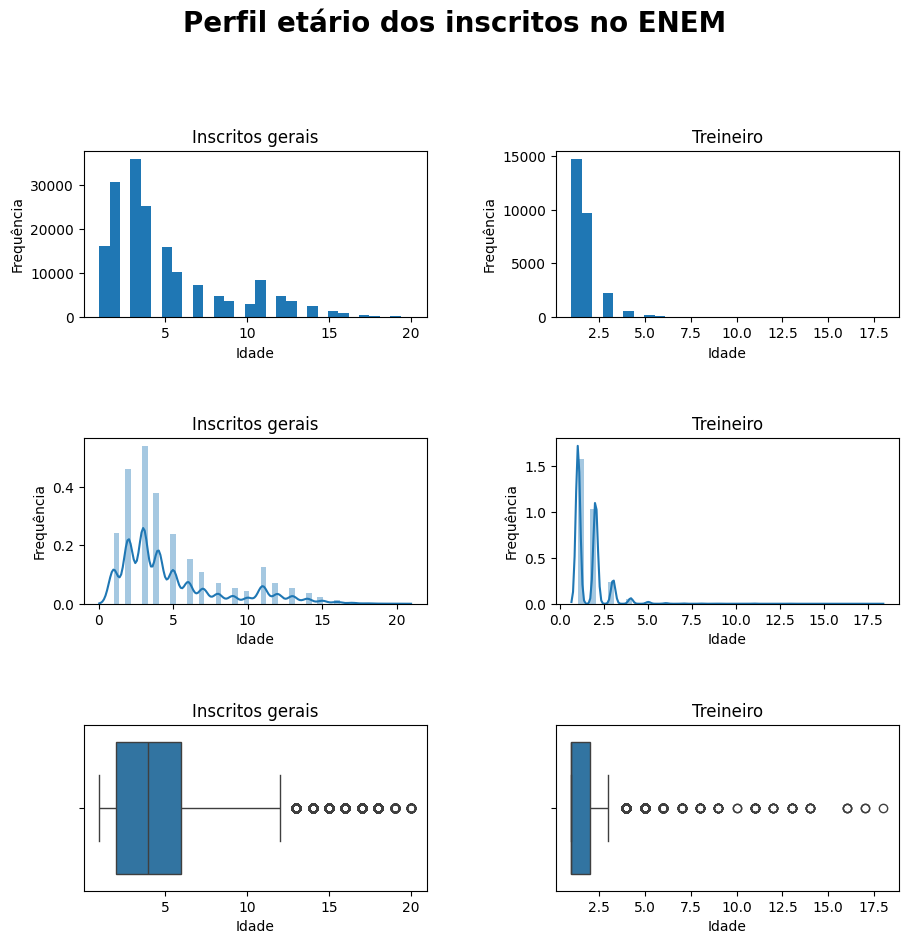

In [178]:
var_idade = 'TP_FAIXA_ETARIA_APOIO'
treineiro = df.query("TREINEIRO == 'Sim'")
idade = np.arange(1, 71)

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
# título da figura
fig.suptitle("Perfil etário dos inscritos no ENEM",
             fontsize=20, fontweight='bold')

# insere um histograma da idade no eixo ax[0,0]
ax[0, 0].hist(df[var_idade], bins=30)
# insere os labels do eixo x e y
ax[0, 0].set(xlabel='Idade', ylabel='Frequência')
# insere o título no eixo ax[0,0]
ax[0, 0].set_title("Inscritos gerais")

# insere um histograma para a idade dos treineiros no eixo ax[0,1]
ax[0, 1].hist(treineiro[var_idade], bins=30)
# insere os labels do eixo x e y
ax[0, 1].set(xlabel='Idade', ylabel='Frequência')
# título do eixo
ax[0, 1].set_title("Treineiro")

# distribuição da idade dos inscritos gerais no eixo ax[1,0] e altera os labels
sns.distplot(df[var_idade], ax=ax[1, 0])
ax[1, 0].set(xlabel='Idade', ylabel='Frequência', title='Inscritos gerais')

# distribuição da idade dos treineiros no eixo ax[1,1] e altera os labels
sns.distplot(treineiro[var_idade], ax=ax[1, 1])
ax[1, 1].set(xlabel='Idade', ylabel='Frequência', title='Treineiro')

# boxplot dos inscritos gerais no eixo ax[2,0] e altera os labels
sns.boxplot(x=df[var_idade], ax=ax[2, 0])
ax[2, 0].set(xlabel='Idade', title='Inscritos gerais')

# boxplot dos treineiros no eixo ax[2,1] e altera os labels
sns.boxplot(x=treineiro[var_idade], ax=ax[2, 1])
ax[2, 1].set(xlabel='Idade', title='Treineiro')

plt.tight_layout(pad=4)

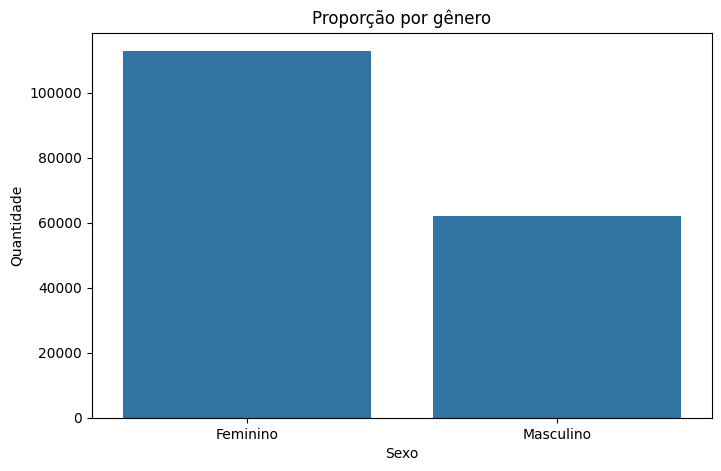

In [179]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data = df, x= 'TP_SEXO', ax = ax)
ax.set(xlabel='Sexo', ylabel='Quantidade')
ax.set_title("Proporção por gênero");



*   Estado civil geral (à esquerda) dos participantes e estado civil segmentado por gênero (à direita)

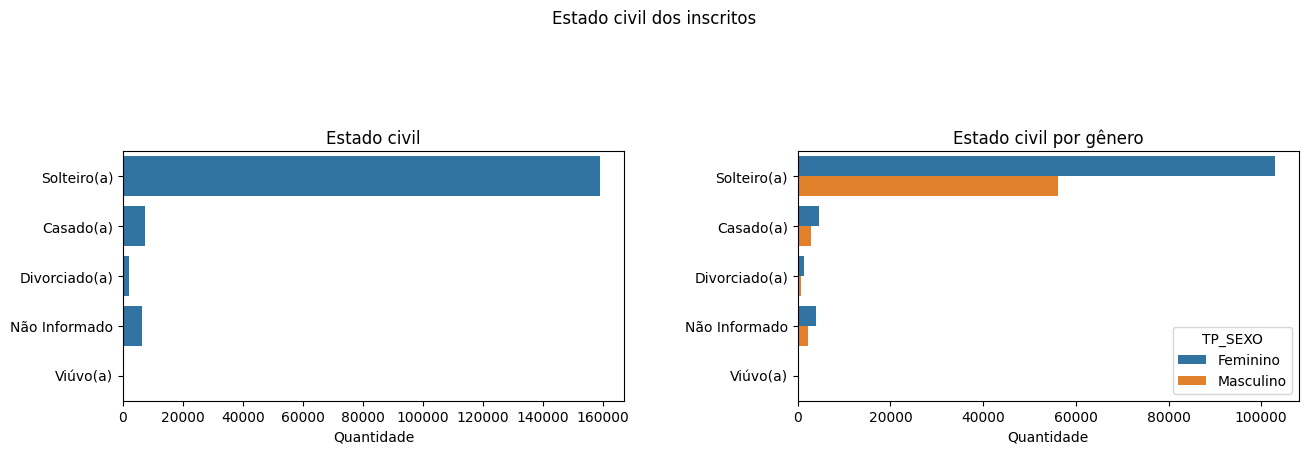

In [180]:
fig, ax = plt.subplots(1,2, figsize= (14,5))
sns.countplot(data = df, y = 'TP_ESTADO_CIVIL', ax = ax[0])
sns.countplot(data = df, y = "TP_ESTADO_CIVIL", hue = "TP_SEXO", ax = ax[1])
ax[0].set(xlabel = "Quantidade", ylabel =  "", title = "Estado civil")
ax[1].set(xlabel = "Quantidade", ylabel =  "", title = "Estado civil por gênero")
fig.suptitle("Estado civil dos inscritos")
fig.tight_layout(pad=4)



*   Função para gerar painel com visualização 1( uma linha) ,2 (duas colunas)

In [181]:
def gerar_painel_barra_1_2(y, segregador, xlabel, ylabel, titulo_1 , titulo_2, titulo_geral):
  fig, ax = plt.subplots(1, 2, figsize= (14,5))
  sns.countplot(data = df, y = y, ax = ax[0])
  sns.countplot(data = df, y = y, hue = segregador, ax = ax[1])
  ax[0].set(xlabel = xlabel, ylabel =  ylabel,  title = titulo_1)
  ax[1].set(xlabel = xlabel, ylabel =  ylabel, title = titulo_2)
  fig.suptitle(titulo_geral)
  fig.tight_layout(pad=4)

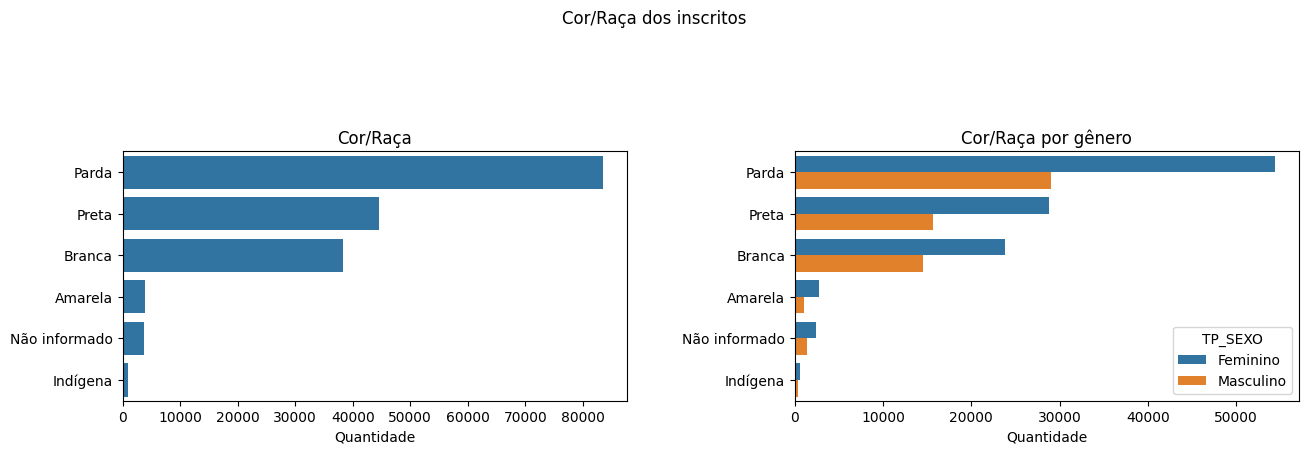

In [182]:
gerar_painel_barra_1_2(y = "TP_COR_RACA",
                       segregador="TP_SEXO", xlabel = "Quantidade", ylabel = "",
                       titulo_1 = "Cor/Raça" , titulo_2 = "Cor/Raça por gênero",
                       titulo_geral = "Cor/Raça dos inscritos")

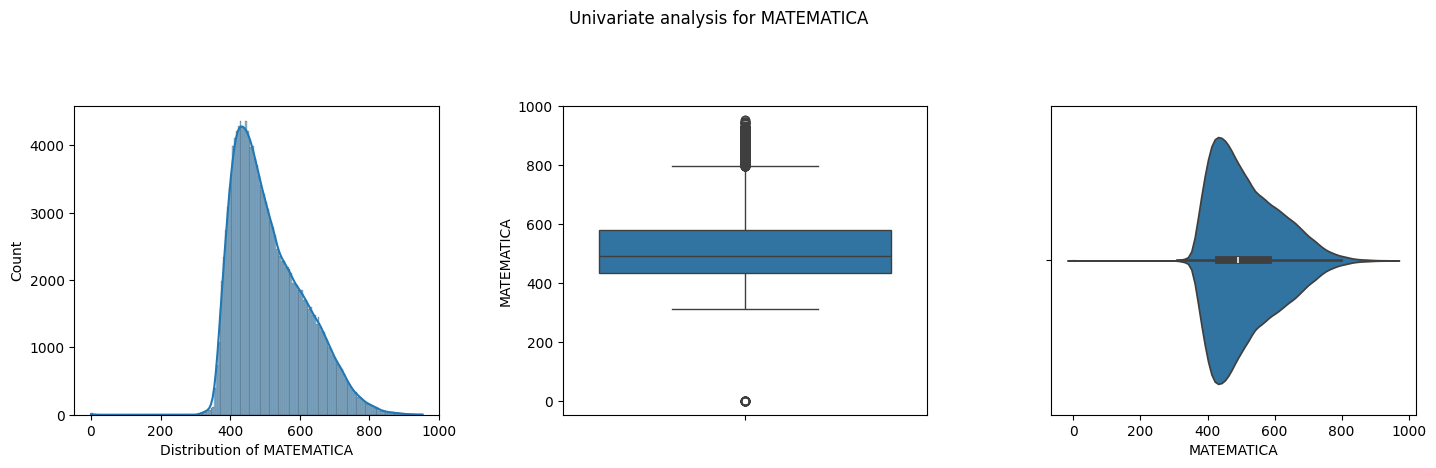

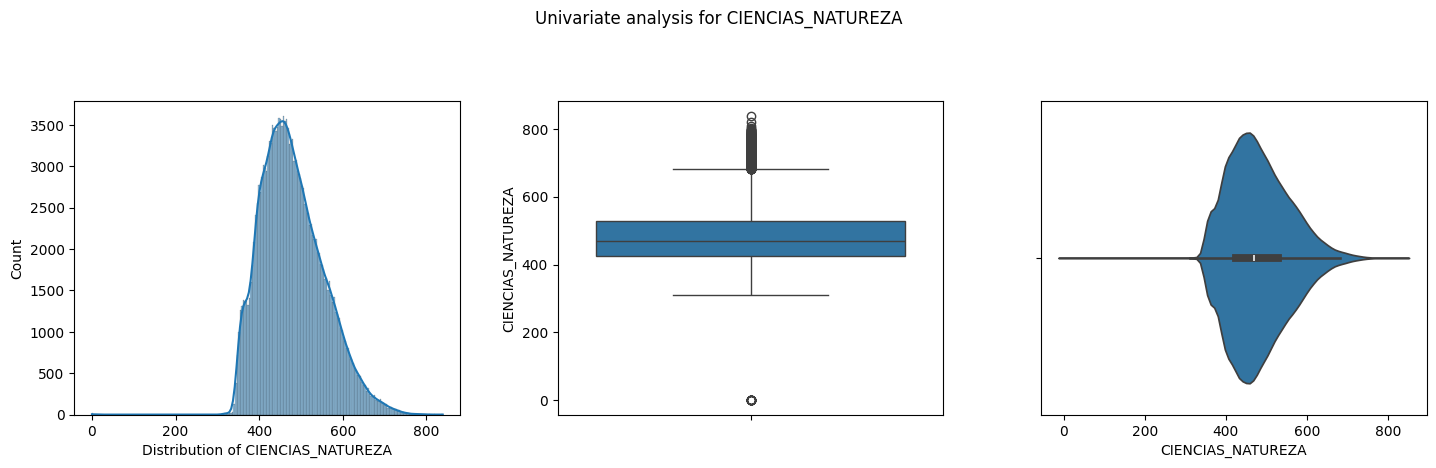

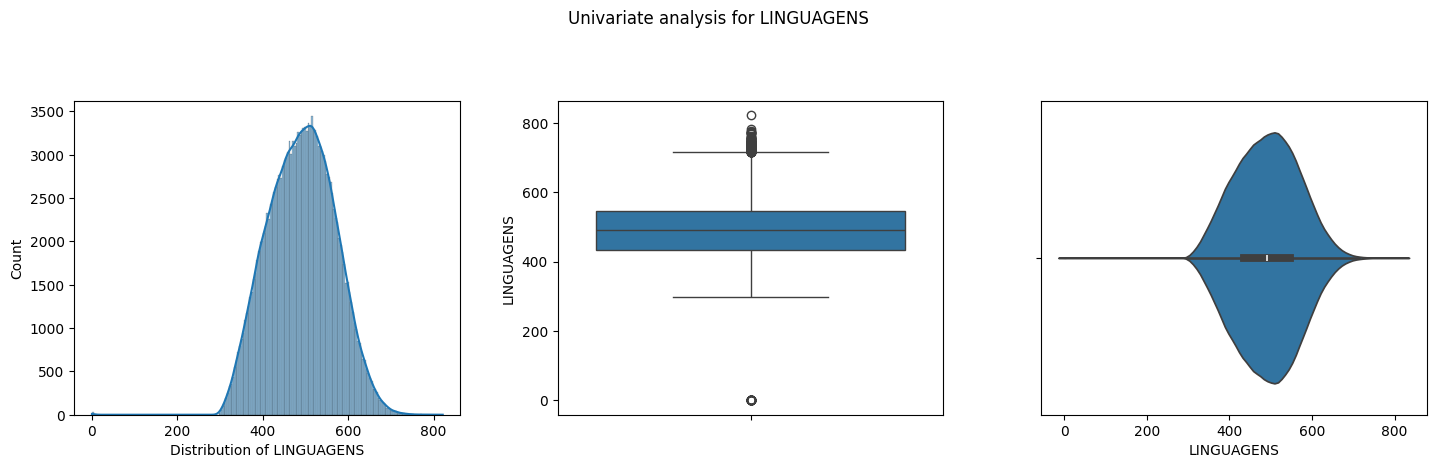

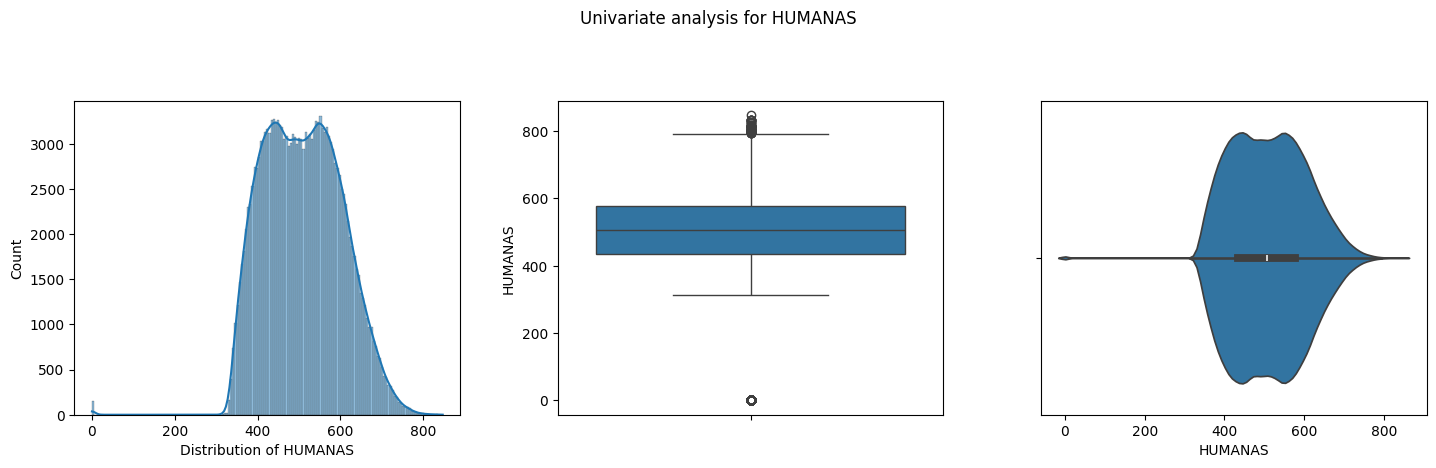

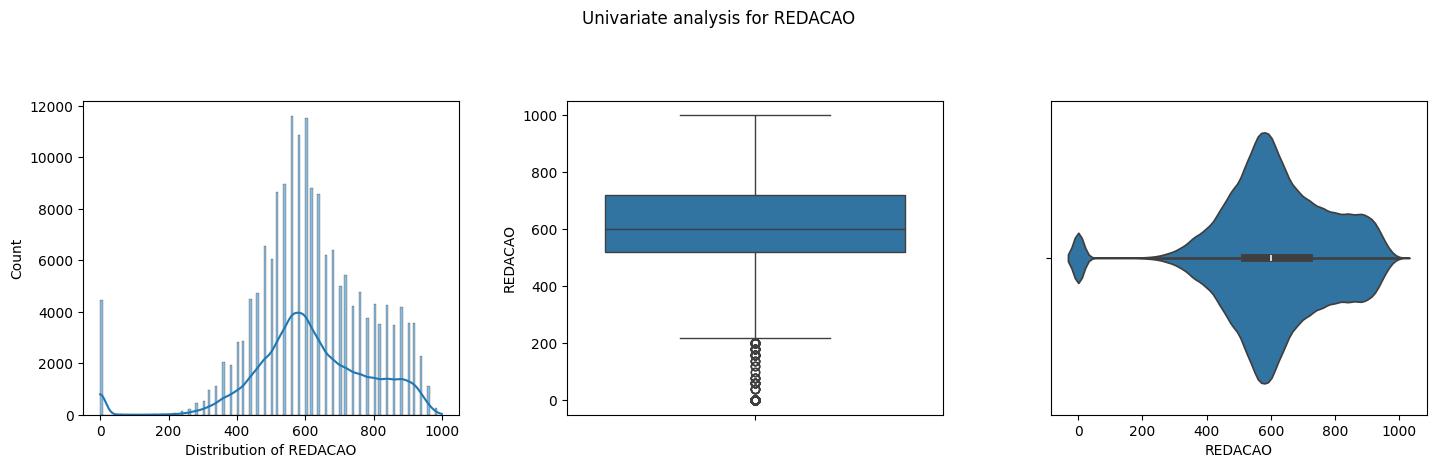

In [183]:
univariate_analysis(provas, data = df)

<Axes: >

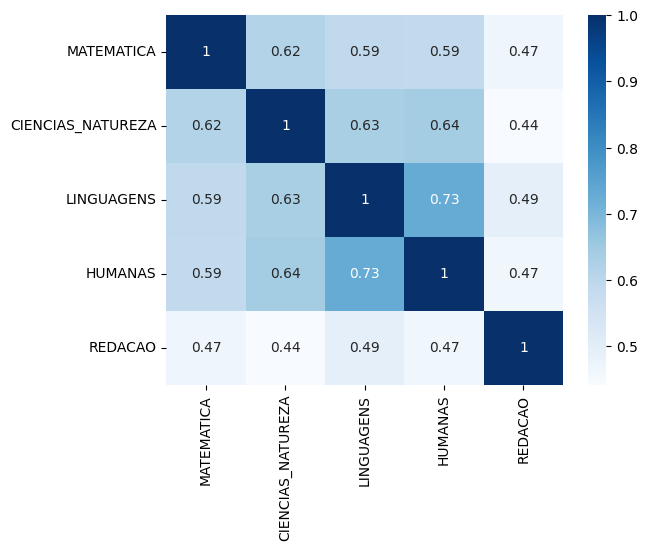

In [184]:
fig, ax = plt.subplots()
corr_provas = df[provas].corr()
sns.heatmap(corr_provas, annot = True, cmap = "Blues", ax= ax)



*   Boxplot de todas as provas do ENEM. É possível perceber vários outliers nas provas, menos na redação.

<Axes: >

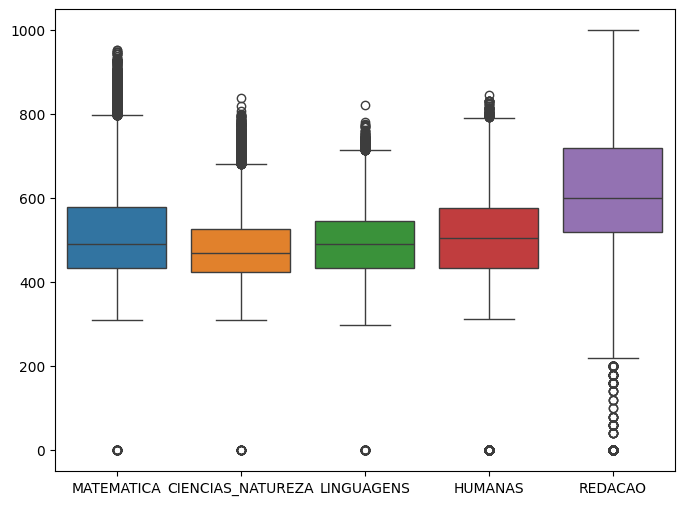

In [185]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot( data = df[provas], ax = ax)



*   Boxplot por renda familiar sendo A renda mais baixa e Q renda mais alta

[Text(0.5, 1.0, 'Nota de matemática por renda')]

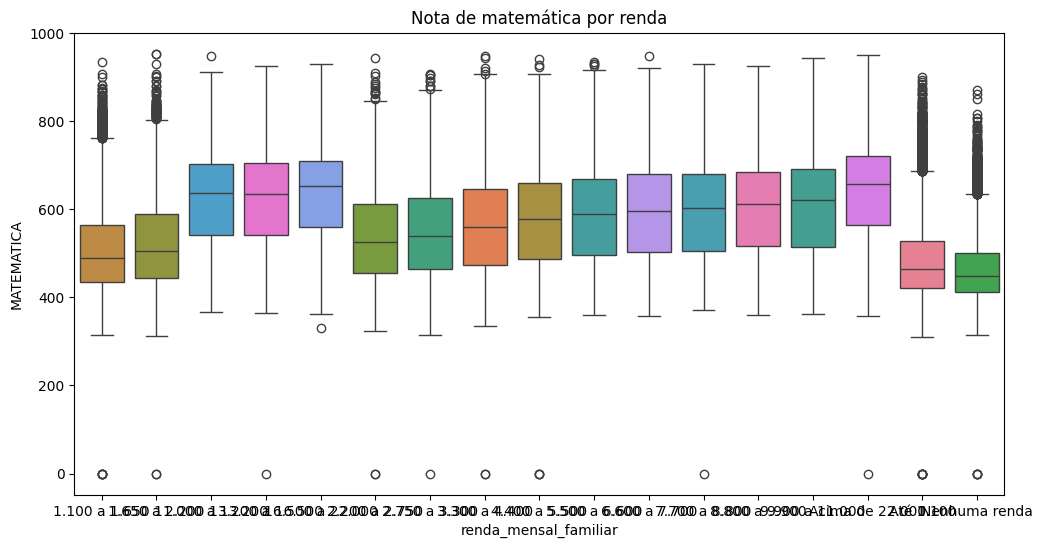

In [186]:
fig, ax = plt.subplots(figsize=(12,6))
renda_ordenada = df["renda_mensal_familiar"].unique()
renda_ordenada.sort()
sns.boxplot(data = df, y = "MATEMATICA",x = "renda_mensal_familiar",  hue = "renda_mensal_familiar",order = renda_ordenada , legend = False, ax = ax)
ax.set(title = "Nota de matemática por renda")

[Text(0.5, 1.0, 'Nota da redação por renda')]

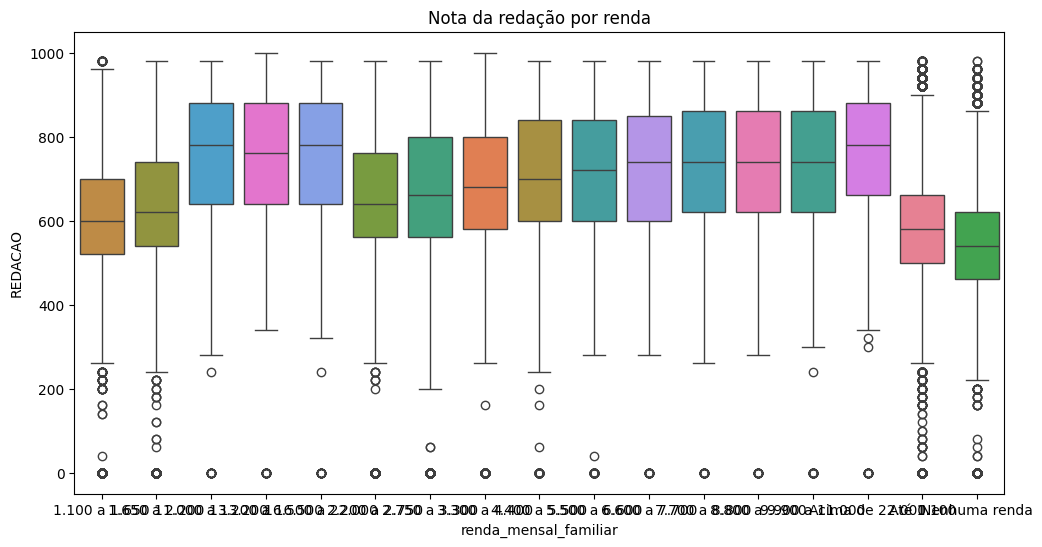

In [187]:
fig, ax = plt.subplots(figsize=(12,6))
renda_ordenada = df["renda_mensal_familiar"].unique()
renda_ordenada.sort()
sns.boxplot(data = df, y = "REDACAO",x = "renda_mensal_familiar",  hue = "renda_mensal_familiar",order = renda_ordenada, legend = False, ax = ax)
ax.set(title = "Nota da redação por renda")



*   Nota da redação por escolaridade da mãe, sendo A menor escolaridade e G maior escolaridade, H significa "Não informado"

[Text(0.5, 1.0, 'Nota da redação pela escolaridade da mãe')]

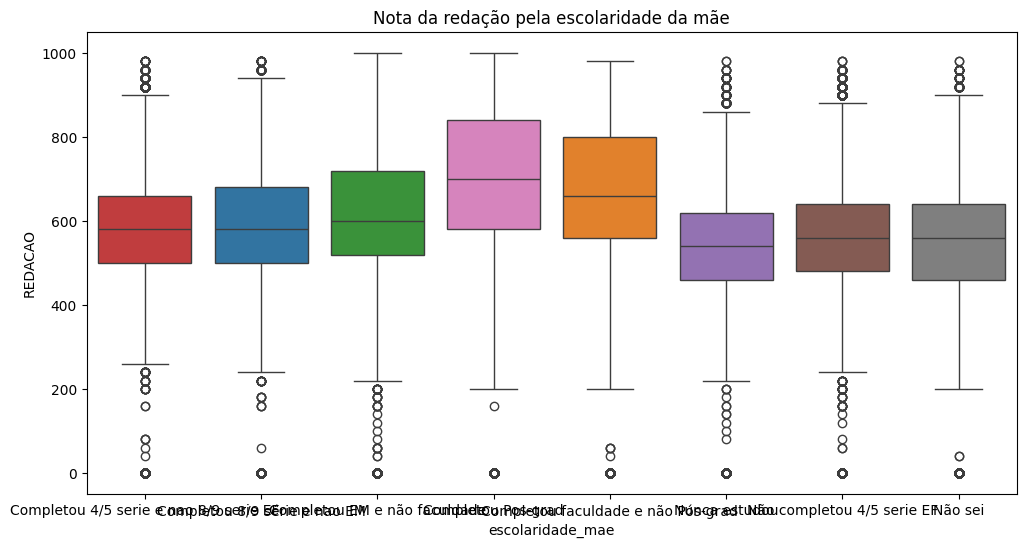

In [188]:
fig, ax = plt.subplots(figsize=(12,6))
escolaridade_mae = df["escolaridade_mae"].unique()
escolaridade_mae.sort()
sns.boxplot(data = df, y = "REDACAO",x = "escolaridade_mae",  hue = "escolaridade_mae",order = escolaridade_mae, legend = False, ax = ax)
ax.set(title = "Nota da redação pela escolaridade da mãe")

[Text(0.5, 1.0, 'Nota da redação pela escolaridade do pai')]

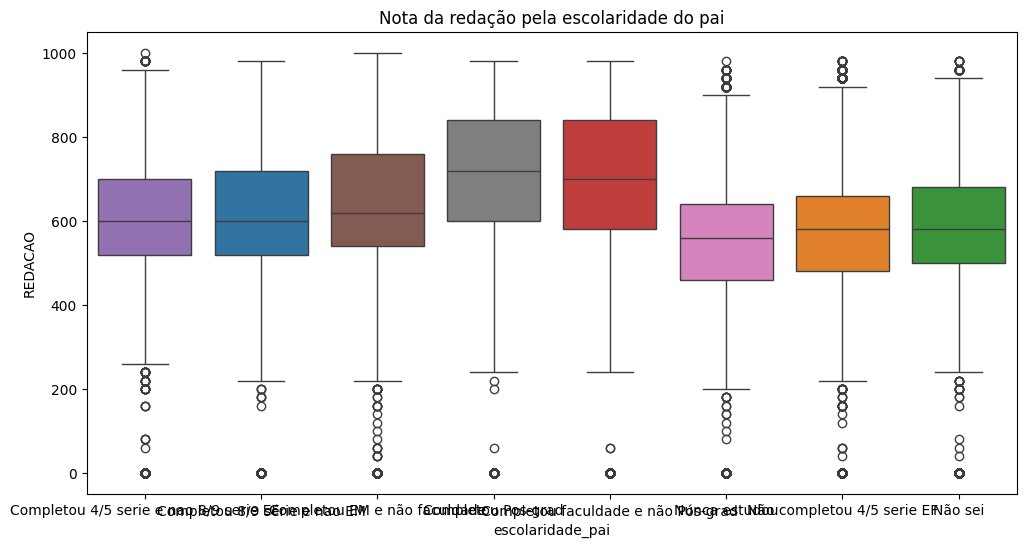

In [189]:
fig, ax = plt.subplots(figsize=(12,6))
escolaridade_pai = df["escolaridade_pai"].unique()
escolaridade_pai.sort()
sns.boxplot(data = df, y = "REDACAO",x = "escolaridade_pai",  hue = "escolaridade_pai",order = escolaridade_pai, legend = False, ax = ax)
ax.set(title = "Nota da redação pela escolaridade do pai")

# Análise espacial dos dados

In [190]:
!pip install descartes

In [191]:
ba_muni = geobr.read_municipality(code_muni = "BA", year = 2010)

In [192]:
ba_muni

code_muni             name_muni  code_state abbrev_state  \
0    2900108.0                Abaíra        29.0           BA   
1    2900207.0                 Abaré        29.0           BA   
2    2900306.0             Acajutiba        29.0           BA   
3    2900355.0              Adustina        29.0           BA   
4    2900405.0             Água Fria        29.0           BA   
..         ...                   ...         ...          ...   
412  2933307.0  Vitória Da Conquista        29.0           BA   
413  2933406.0                Wagner        29.0           BA   
414  2933455.0             Wanderley        29.0           BA   
415  2933505.0   Wenceslau Guimarães        29.0           BA   
416  2933604.0           Xique-Xique        29.0           BA   

                                              geometry  
0    POLYGON ((-41.86249 -13.22967, -41.84277 -13.2...  
1    POLYGON ((-39.47375 -8.87667, -39.49158 -8.835...  
2    POLYGON ((-38.04594 -11.74417, -38.05145 -11.6...  
3    POLYGON ((-38.0232 -10.44947, -38.0222 -10.447...  
4    POLYGON ((-38.73384 -11.69606, -38.72949 -11.6...  
..                                                 ...  
412  POLYGON ((-40.62503 -14.67127, -40.61462 -14.6...  
413  POLYGON ((-41.16995 -12.1228, -41.11539 -12.10...  
414  POLYGON ((-43.89773 -11.4471, -43.88864 -11.44...  
415  POLYGON ((-39.72454 -13.74853, -39.71997 -13.7...  
416  POLYGON ((-42.57937 -10.50147, -42.57885 -10.4...  

[417 rows x 5 columns]



*   Plotando gráficos do Estado da Bahia (2010)

(np.float64(-47.08089426261155),
 np.float64(-36.87734914850943),
 np.float64(-18.839273585452574),
 np.float64(-8.04203709391265))

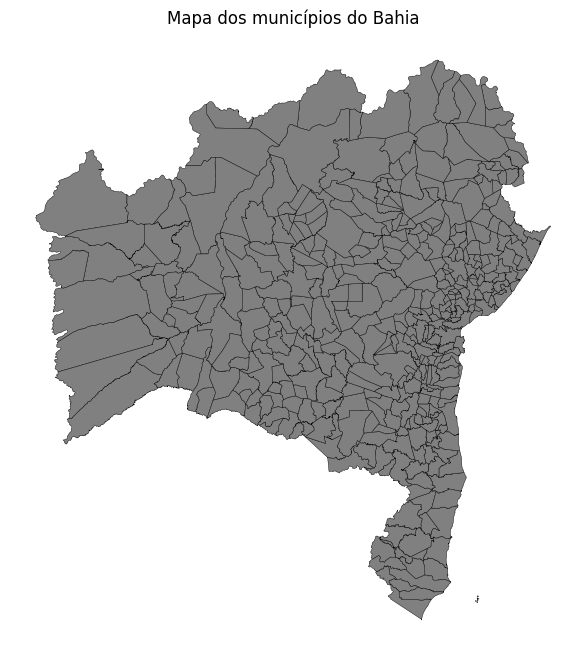

In [193]:
fig,ax = plt.subplots(figsize = (8,8))

ba_muni.plot(facecolor = "gray",edgecolor="black", linewidth = 0.3, ax = ax)
ax.set(title = "Mapa dos municípios do Bahia")
ax.axis("off")

In [194]:
dados_municipio.head()

Municipio  COD_IBGE  Minimo_MT    Media_MT  Mediana_MT  \
0  Vitória da Conquista   2933307      315.5  536.491289      517.30   
1              Salvador   2927408      315.3  534.623544      515.60   
2             Barreiras   2903201      318.8  517.589528      496.80   
3      Feira de Santana   2910800      316.0  525.103365      502.90   
4              Serrinha   2930501      346.8  501.138564      479.85   

   Maximo_MT  Quantidade_inscritos  Percentual_inscritos  NU_ANO  
0      953.1                 10792                  4.05    2021  
1      953.1                 58502                 21.98    2021  
2      948.8                  6083                  2.29    2021  
3      948.5                 16689                  6.27    2021  
4      948.5                  2802                  1.05    2021



*   Visualizando com um print a quantidade de municípios na Bahia e quantos municípios participam do ENEM. Minha análise, os municípios não participantes são cidades pequenas, com população menor que 5 mil, e os participantes vão para as cidades polo, por exemplo, Salvador

In [195]:
print("Quantidade de munícipios na Bahia: ", ba_muni.shape[0])
print("Quantidade de munícipios participantes do ENEM na Bahia: ", dados_municipio.shape[0])

Quantidade de munícipios na Bahia:  417
Quantidade de munícipios participantes do ENEM na Bahia:  162




*   Realizando o merge (mesclagem) dos dataframes "ba_muni"(referentes aos municípios da Bahia) + dados_municipios (referentes as notas do ENEM e medidas estatísticas)

In [196]:
df_espacial_enem = ba_muni.merge(
    dados_municipio,
    left_on = "code_muni",
    right_on = "COD_IBGE",
    how = "left"
)

In [197]:
ba_muni.head()

code_muni  name_muni  code_state abbrev_state  \
0  2900108.0     Abaíra        29.0           BA   
1  2900207.0      Abaré        29.0           BA   
2  2900306.0  Acajutiba        29.0           BA   
3  2900355.0   Adustina        29.0           BA   
4  2900405.0  Água Fria        29.0           BA   

                                            geometry  
0  POLYGON ((-41.86249 -13.22967, -41.84277 -13.2...  
1  POLYGON ((-39.47375 -8.87667, -39.49158 -8.835...  
2  POLYGON ((-38.04594 -11.74417, -38.05145 -11.6...  
3  POLYGON ((-38.0232 -10.44947, -38.0222 -10.447...  
4  POLYGON ((-38.73384 -11.69606, -38.72949 -11.6...

In [198]:
df_espacial_enem.head()

code_muni  name_muni  code_state abbrev_state  \
0  2900108.0     Abaíra        29.0           BA   
1  2900207.0      Abaré        29.0           BA   
2  2900306.0  Acajutiba        29.0           BA   
3  2900355.0   Adustina        29.0           BA   
4  2900405.0  Água Fria        29.0           BA   

                                            geometry Municipio  COD_IBGE  \
0  POLYGON ((-41.86249 -13.22967, -41.84277 -13.2...       NaN       NaN   
1  POLYGON ((-39.47375 -8.87667, -39.49158 -8.835...       NaN       NaN   
2  POLYGON ((-38.04594 -11.74417, -38.05145 -11.6...       NaN       NaN   
3  POLYGON ((-38.0232 -10.44947, -38.0222 -10.447...       NaN       NaN   
4  POLYGON ((-38.73384 -11.69606, -38.72949 -11.6...       NaN       NaN   

   Minimo_MT  Media_MT  Mediana_MT  Maximo_MT  Quantidade_inscritos  \
0        NaN       NaN         NaN        NaN                   NaN   
1        NaN       NaN         NaN        NaN                   NaN   
2        NaN       NaN         NaN        NaN                   NaN   
3        NaN       NaN         NaN        NaN                   NaN   
4        NaN       NaN         NaN        NaN                   NaN   

   Percentual_inscritos  NU_ANO  
0                   NaN     NaN  
1                   NaN     NaN  
2                   NaN     NaN  
3                   NaN     NaN  
4                   NaN     NaN

In [199]:
df_espacial_enem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_muni             417 non-null    float64 
 1   name_muni             417 non-null    object  
 2   code_state            417 non-null    float64 
 3   abbrev_state          417 non-null    object  
 4   geometry              417 non-null    geometry
 5   Municipio             162 non-null    object  
 6   COD_IBGE              162 non-null    float64 
 7   Minimo_MT             162 non-null    float64 
 8   Media_MT              162 non-null    float64 
 9   Mediana_MT            162 non-null    float64 
 10  Maximo_MT             162 non-null    float64 
 11  Quantidade_inscritos  162 non-null    float64 
 12  Percentual_inscritos  162 non-null    float64 
 13  NU_ANO                162 non-null    float64 
dtypes: float64(10), geometry(1), object(3)
memory usag



*   Printando a quantidade de municípios participantes do ENEM, quantidade de municípios na Bahia e porcentagem das cidades participantes do ENEM

In [200]:
print(f"Quantidade de cidades participantes do ENEM Bahia 2021: {dados_municipio.shape[0]}")
print(f"Quantidade de cidades na Bahia (2010): {ba_muni.shape[0]}")
print(f"Porcentagem de cidades participantes {round((dados_municipio.shape[0] / ba_muni.shape[0]) * 100,2)} %")
print(df_espacial_enem.shape)

Quantidade de cidades participantes do ENEM Bahia 2021: 162
Quantidade de cidades na Bahia (2010): 417
Porcentagem de cidades participantes 38.85 %
(417, 14)


In [201]:
df_espacial_enem.isna().sum()

code_muni                 0
name_muni                 0
code_state                0
abbrev_state              0
geometry                  0
Municipio               255
COD_IBGE                255
Minimo_MT               255
Media_MT                255
Mediana_MT              255
Maximo_MT               255
Quantidade_inscritos    255
Percentual_inscritos    255
NU_ANO                  255
dtype: int64

*   Substituindo dados nulos (na) por -999

In [202]:
df_espacial_enem.fillna(-999, inplace = True)

In [203]:
df_espacial_enem.isna().sum()

code_muni               0
name_muni               0
code_state              0
abbrev_state            0
geometry                0
Municipio               0
COD_IBGE                0
Minimo_MT               0
Media_MT                0
Mediana_MT              0
Maximo_MT               0
Quantidade_inscritos    0
Percentual_inscritos    0
NU_ANO                  0
dtype: int64



*   Quantidade de inscritos por município da Bahia



(np.float64(-47.08089426261155),
 np.float64(-36.87734914850943),
 np.float64(-18.839273585452574),
 np.float64(-8.04203709391265))

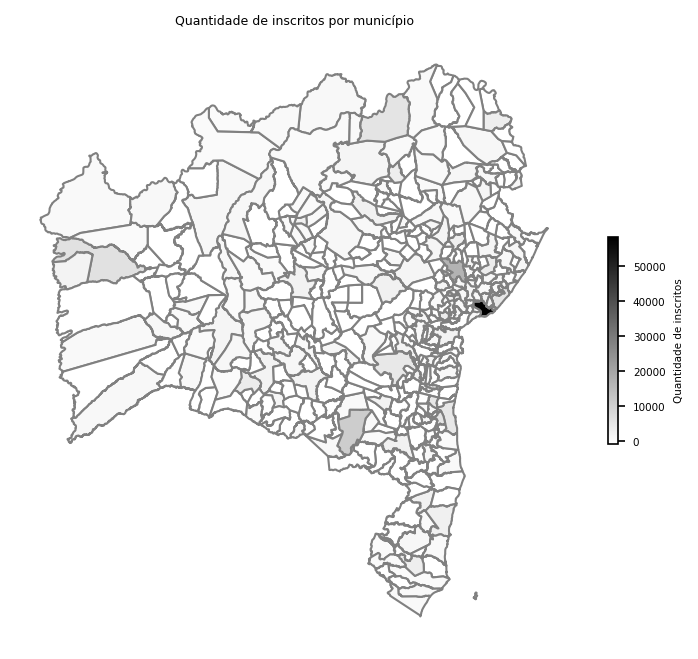

In [204]:
plt.rcParams.update({"font.size":5})

fig, ax = plt.subplots(figsize=(6,6), dpi = 150)

df_espacial_enem.plot(
    column = "Quantidade_inscritos",
    cmap = "binary",
    legend = True,
    edgecolor = "gray",
    legend_kwds = {
        "label":"Quantidade de inscritos",
        "orientation":"vertical",
        "shrink":0.3
    },
    ax = ax
)

ax.set(title = "Quantidade de inscritos por município")
ax.axis("off")

(np.float64(-47.06366319244738),
 np.float64(-37.23920162195703),
 np.float64(-18.839273585452574),
 np.float64(-8.04203709391265))

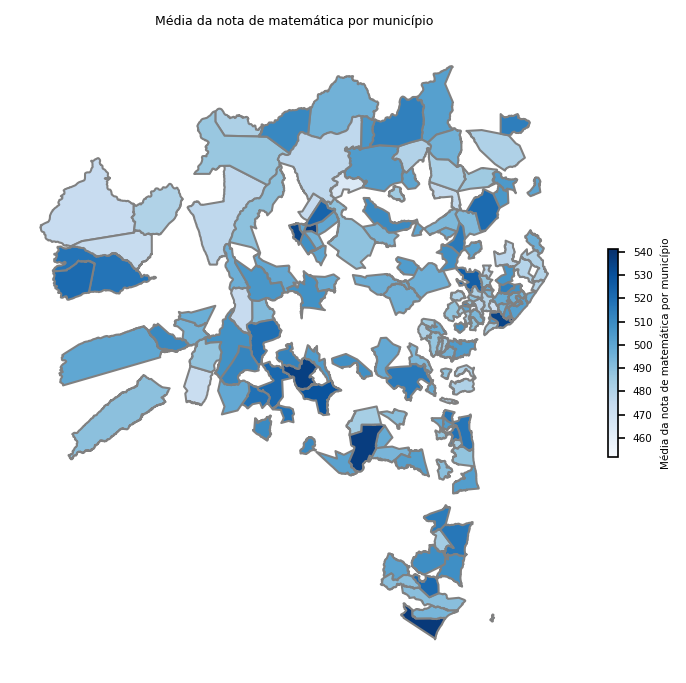

In [205]:
plt.rcParams.update({"font.size":5})

fig, ax = plt.subplots(figsize=(6,6), dpi = 150)

df_espacial_enem.query(" Media_MT >  0").plot(
    column = "Media_MT",
    cmap = "Blues",
    legend = True,
    edgecolor = "gray",
    legend_kwds = {
        "label":"Média da nota de matemática por município",
        "orientation":"vertical",
        "shrink":0.3
    },
    ax = ax
)

ax.set(title = "Média da nota de matemática por município")
ax.axis("off")

In [206]:
df_espacial_enem.head(0)

Empty GeoDataFrame
Columns: [code_muni, name_muni, code_state, abbrev_state, geometry, Municipio, COD_IBGE, Minimo_MT, Media_MT, Mediana_MT, Maximo_MT, Quantidade_inscritos, Percentual_inscritos, NU_ANO]
Index: []

*   Realizando uma plotagem dupla, a primeira para ser o mapa da Bahia e a segunda referente aos municípios particpantes do ENEM

(np.float64(-47.08089426261155),
 np.float64(-36.87734914850943),
 np.float64(-18.839273585452574),
 np.float64(-8.04203709391265))

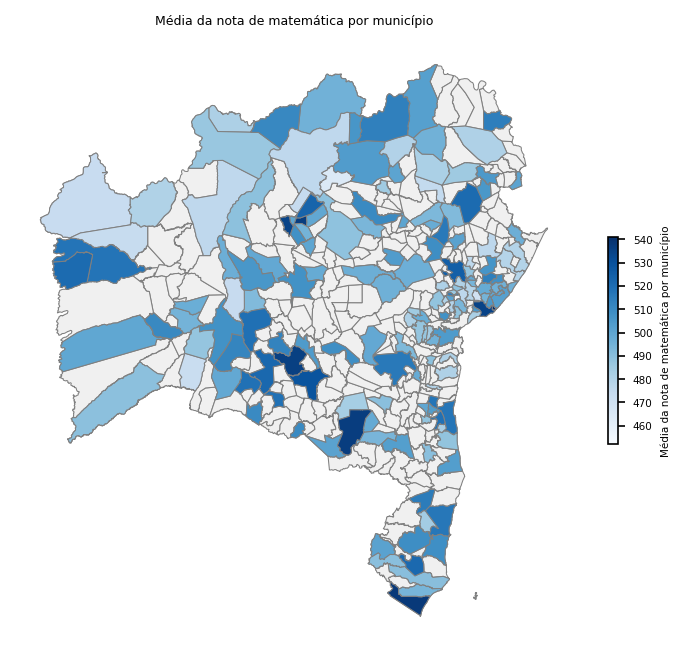

In [207]:
plt.rcParams.update({"font.size":5})

fig, ax = plt.subplots(figsize=(6,6), dpi=150)

# 1. MAPA BASE (sem filtro)
df_espacial_enem.plot(
    color="#f0f0f0",      # fundo neutro
    edgecolor="gray",
    linewidth=0.5,
    ax=ax
)

# 2. MAPA TEMÁTICO (com filtro)
df_espacial_enem.query("Media_MT > 0").plot(
    column="Media_MT",
    cmap="Blues",
    legend=True,
    edgecolor="gray",
    linewidth=0.5,
    legend_kwds={
        "label": "Média da nota de matemática por município",
        "orientation": "vertical",
        "shrink": 0.3
    },
    ax=ax
)

ax.set(title="Média da nota de matemática por município")
ax.axis("off")


#Refazendo análises, agora com variáveis textuais(object)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174793 entries, 0 to 174792
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            174793 non-null  int64  
 1   NU_ANO                  174793 non-null  int64  
 2   TP_FAIXA_ETARIA         174793 non-null  object 
 3   TP_SEXO                 174793 non-null  object 
 4   TP_ESTADO_CIVIL         174793 non-null  object 
 5   TP_COR_RACA             174793 non-null  object 
 6   TP_NACIONALIDADE        174793 non-null  object 
 7   TP_ST_CONCLUSAO         174793 non-null  object 
 8   TP_ANO_CONCLUIU         174793 non-null  object 
 9   TIPO_ESCOLA             174793 non-null  object 
 10  TP_ENSINO               174793 non-null  object 
 11  TREINEIRO               174793 non-null  object 
 12  CO_MUNICIPIO_ESC        34822 non-null   float64
 13  NO_MUNICIPIO_ESC        34822 non-null   object 
 14  CO_UF_ESC           

Text(0.5, 1.0, 'Tipo de escolaridade dos participantes do ENEM 2021')

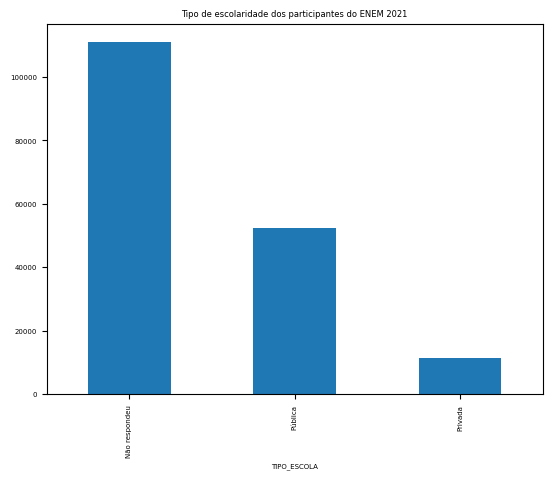

In [209]:
df["TIPO_ESCOLA"].value_counts().plot(kind = "bar")
plt.title("Tipo de escolaridade dos participantes do ENEM 2021")

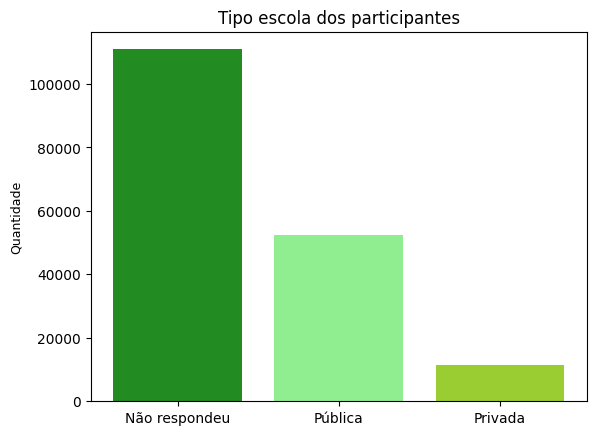

In [210]:
Qtd_tp_escola = df["TIPO_ESCOLA"].value_counts()
plt.bar( Qtd_tp_escola.index, Qtd_tp_escola, color= [ "forestgreen","lightgreen","yellowgreen"])
plt.title("Tipo escola dos participantes", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 9)
plt.xticks(fontsize = 10)
plt.yticks(fontsize=10)
plt.show()

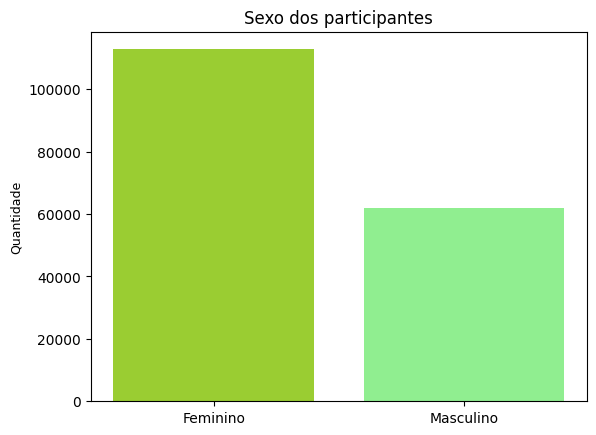

In [211]:
Qtd_tp_escola = df["TP_SEXO"].value_counts()
plt.bar( Qtd_tp_escola.index, Qtd_tp_escola, color = ["yellowgreen","lightgreen"])
plt.title("Sexo dos participantes", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 9)
plt.xticks(fontsize = 10)
plt.yticks(fontsize=10)
plt.show()

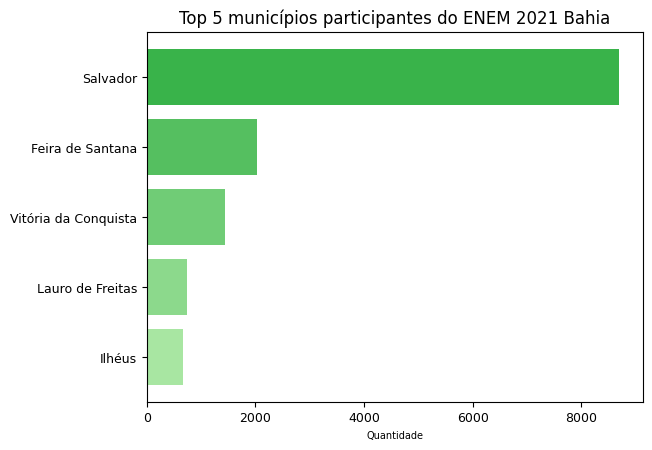

In [212]:
municipios_plot = df["NO_MUNICIPIO_ESC"].value_counts().sort_values(ascending = False).head()
municipios_plot = municipios_plot[::-1]
cores = ["#a8e6a2", "#8cd98c", "#70cc76", "#55bf60", "#39b34a"]

plt.barh(municipios_plot.index, municipios_plot, color = cores)
plt.xlabel("Quantidade", fontsize= 7)
#plt.ylabel("Municípios", fontsize= 7)
plt.xticks(fontsize= 9)
plt.yticks(fontsize= 9)
plt.title("Top 5 municípios participantes do ENEM 2021 Bahia", fontsize=12)
plt.show()

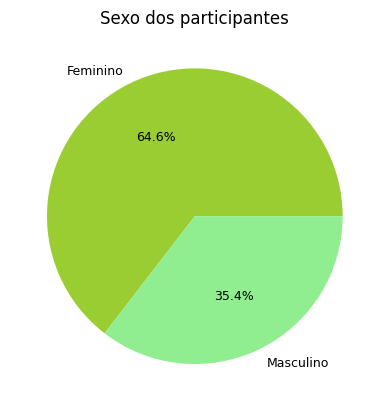

In [213]:
sexo = df["TP_SEXO"].value_counts()

plt.pie(sexo, labels = sexo.index, autopct = "%1.1f%%",colors= [ "yellowgreen","lightgreen"], textprops={"fontsize":9})
plt.title("Sexo dos participantes", fontsize = 12)
plt.show()

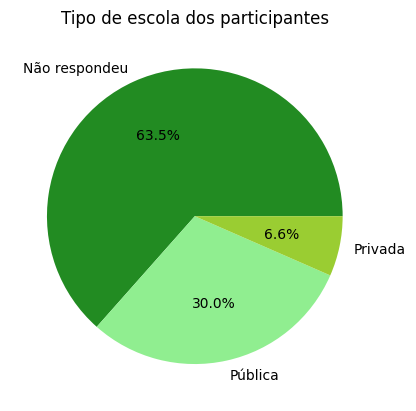

In [214]:
tipo_escola_plt = df["TIPO_ESCOLA"].value_counts()

plt.pie(tipo_escola_plt, labels = tipo_escola_plt.index, autopct = "%1.1f%%",
        colors= [ "forestgreen","lightgreen","yellowgreen"], textprops={"fontsize":10} )
plt.title("Tipo de escola dos participantes", fontsize = 12)
plt.show()



> Algumas paletas: "viridis", "plasma", "cool", "turbo", "inferno"



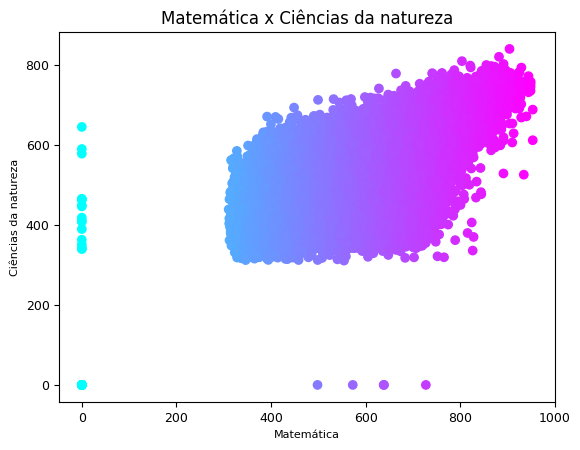

In [215]:
plt.scatter(df["MATEMATICA"], df["CIENCIAS_NATUREZA"], c=df["MATEMATICA"], cmap = "cool")
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Ciências da natureza", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Matemática x Ciências da natureza", fontsize=12)
plt.show()

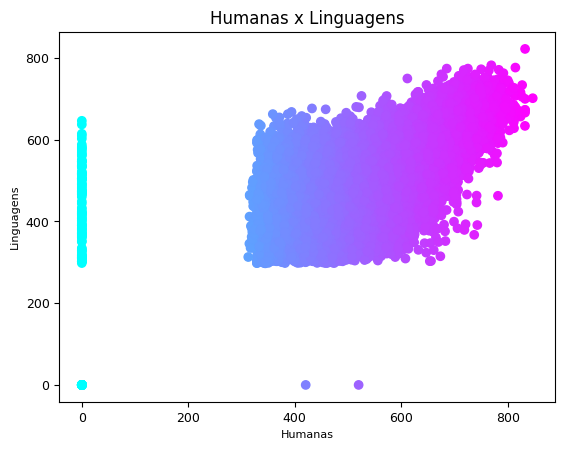

In [216]:
plt.scatter(df["HUMANAS"],df["LINGUAGENS"],c=df["HUMANAS"], cmap = "cool")
plt.xlabel("Humanas", fontsize= 8)
plt.ylabel("Linguagens", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Humanas x Linguagens", fontsize=12)
plt.show()

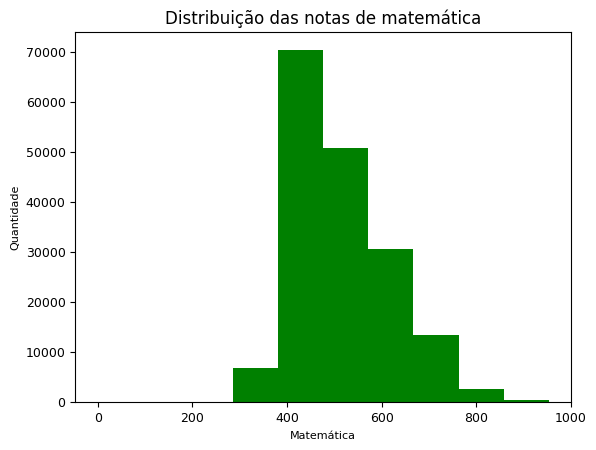

In [217]:
plt.hist(df["MATEMATICA"], orientation = "vertical", color = "green")
plt.title("Distribuição das notas de matemática", fontsize = 12)
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Quantidade", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

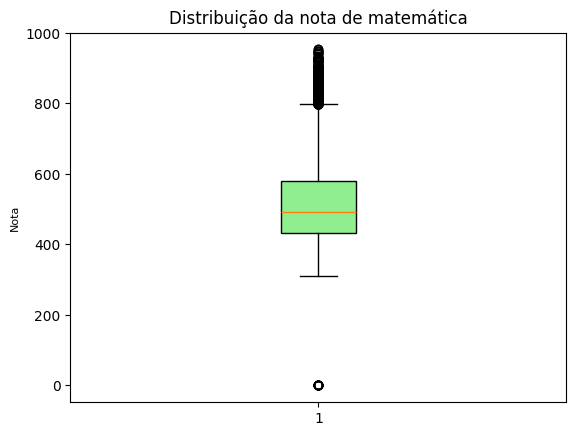

In [218]:
plt.boxplot(df["MATEMATICA"],patch_artist=True,
            boxprops=dict(facecolor="lightgreen"))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Distribuição da nota de matemática", fontsize = 12)
plt.ylabel("Nota", fontsize= 8)
plt.show()

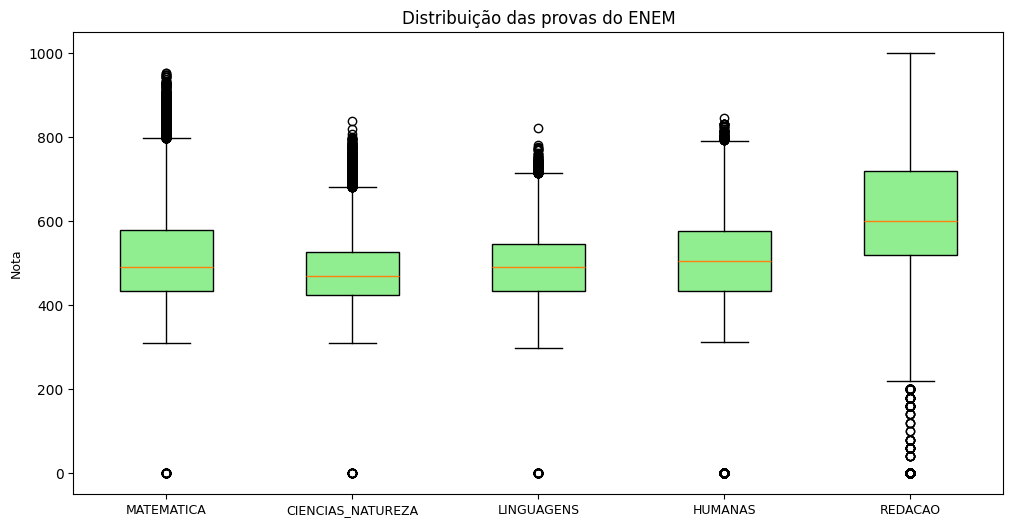

In [219]:
plt.figure(figsize=(12,6))
plt.boxplot(df[provas], patch_artist=True,
            boxprops=dict(facecolor="lightgreen"))
plt.yticks(fontsize=10)
plt.xticks([1,2,3,4,5], ['MATEMATICA', 'CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS', 'REDACAO'], fontsize=9)
plt.title("Distribuição das provas do ENEM", fontsize = 12)
plt.ylabel("Nota", fontsize= 9)
plt.show()

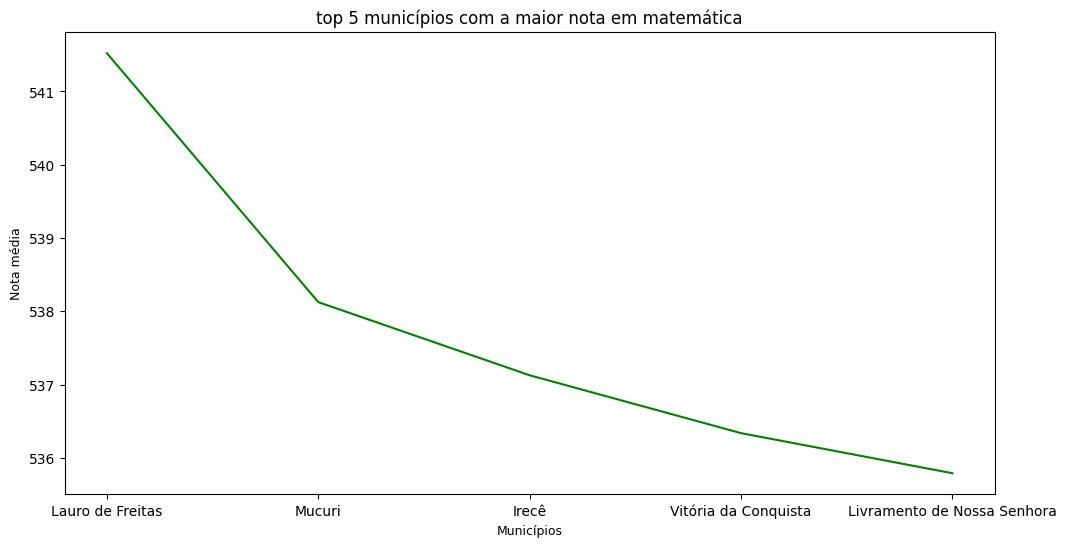

In [220]:
eixo_x = df.groupby( by = ["NO_MUNICIPIO_PROVA"]).agg({"MATEMATICA":np.mean}).reset_index().rename(columns = {"MATEMATICA":"MEDIA_MATEMATICA", "NO_MUNICIPIO_PROVA":"MUNICIPIO"}).sort_values(by = "MEDIA_MATEMATICA", ascending = False).head().reset_index(drop = True)["MUNICIPIO"]
eixo_y = df.groupby( by = ["NO_MUNICIPIO_PROVA"]).agg({"MATEMATICA":np.mean}).reset_index().rename(columns = {"MATEMATICA":"MEDIA_MATEMATICA", "NO_MUNICIPIO_PROVA":"MUNICIPIO"}).sort_values(by = "MEDIA_MATEMATICA", ascending = False).head().reset_index(drop = True)["MEDIA_MATEMATICA"]

plt.figure(figsize=(12,6))
plt.plot(eixo_x, eixo_y, color = "green")
plt.title("top 5 municípios com a maior nota em matemática", fontsize = 12)
plt.xlabel("Municípios", fontsize= 9)
plt.ylabel("Nota média", fontsize= 9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174793 entries, 0 to 174792
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            174793 non-null  int64  
 1   NU_ANO                  174793 non-null  int64  
 2   TP_FAIXA_ETARIA         174793 non-null  object 
 3   TP_SEXO                 174793 non-null  object 
 4   TP_ESTADO_CIVIL         174793 non-null  object 
 5   TP_COR_RACA             174793 non-null  object 
 6   TP_NACIONALIDADE        174793 non-null  object 
 7   TP_ST_CONCLUSAO         174793 non-null  object 
 8   TP_ANO_CONCLUIU         174793 non-null  object 
 9   TIPO_ESCOLA             174793 non-null  object 
 10  TP_ENSINO               174793 non-null  object 
 11  TREINEIRO               174793 non-null  object 
 12  CO_MUNICIPIO_ESC        34822 non-null   float64
 13  NO_MUNICIPIO_ESC        34822 non-null   object 
 14  CO_UF_ESC           

In [222]:
df_provas_insc = df.iloc[:,[0,22,23,24,25]].reset_index(drop= True)
df_provas_insc.head()

NU_INSCRICAO  CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA
0  210051128744              507.6    539.2       494.6       413.3
1  210052118573              439.6    437.7       455.9       446.2
2  210052350230              548.1    619.5       676.3       386.6
3  210053156861              465.2    613.1       522.1       579.6
4  210053085526              414.6    410.1       386.7       423.0

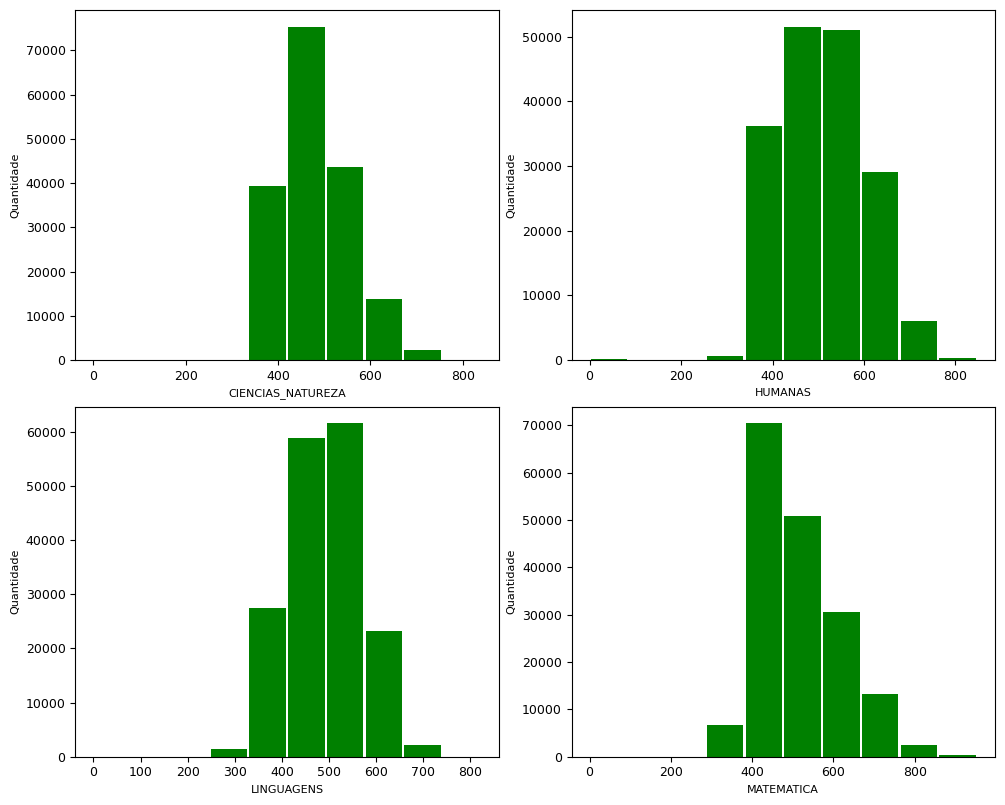

In [223]:
provs = df_provas_insc.columns[1:]

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax_flat = ax.flatten()

for i, col_name in enumerate(provs):
    ax_flat[i].hist(df_provas_insc[col_name], color = "green", rwidth=0.94)
    ax_flat[i].set_xlabel(col_name, fontsize= 8)
    ax_flat[i].set_ylabel("Quantidade", fontsize= 8)
    ax_flat[i].tick_params(axis='x', labelsize=9)
    ax_flat[i].tick_params(axis='y', labelsize=9)

fig.tight_layout()


plt.show()

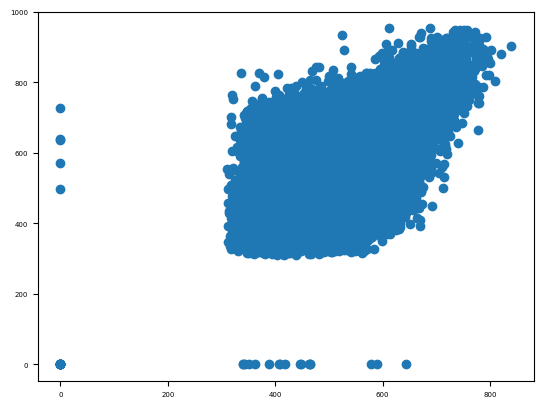

In [224]:
plt.scatter(df_provas_insc["CIENCIAS_NATUREZA"], df_provas_insc["MATEMATICA"])

In [225]:
df_idade_ensino = df.iloc[:,[0 , 2 , 59 , 3 , 4 , 9 , 13 , 22 , 23 , 24 , 25]]
df_idade_ensino.head()

NU_INSCRICAO TP_FAIXA_ETARIA  TP_FAIXA_ETARIA_APOIO    TP_SEXO  \
0  210051128744         19 anos                      4   Feminino   
1  210052118573         18 anos                      3   Feminino   
2  210052350230         25 anos                     10   Feminino   
3  210053156861         24 anos                      9  Masculino   
4  210053085526         18 anos                      3  Masculino   

  TP_ESTADO_CIVIL    TIPO_ESCOLA NO_MUNICIPIO_ESC  CIENCIAS_NATUREZA  HUMANAS  \
0     Solteiro(a)        Pública              NaN              507.6    539.2   
1     Solteiro(a)        Pública              NaN              439.6    437.7   
2     Solteiro(a)  Não respondeu              NaN              548.1    619.5   
3     Solteiro(a)  Não respondeu              NaN              465.2    613.1   
4     Solteiro(a)        Pública           Urandi              414.6    410.1   

   LINGUAGENS  MATEMATICA  
0       494.6       413.3  
1       455.9       446.2  
2       676.3       386.6  
3       522.1       579.6  
4       386.7       423.0

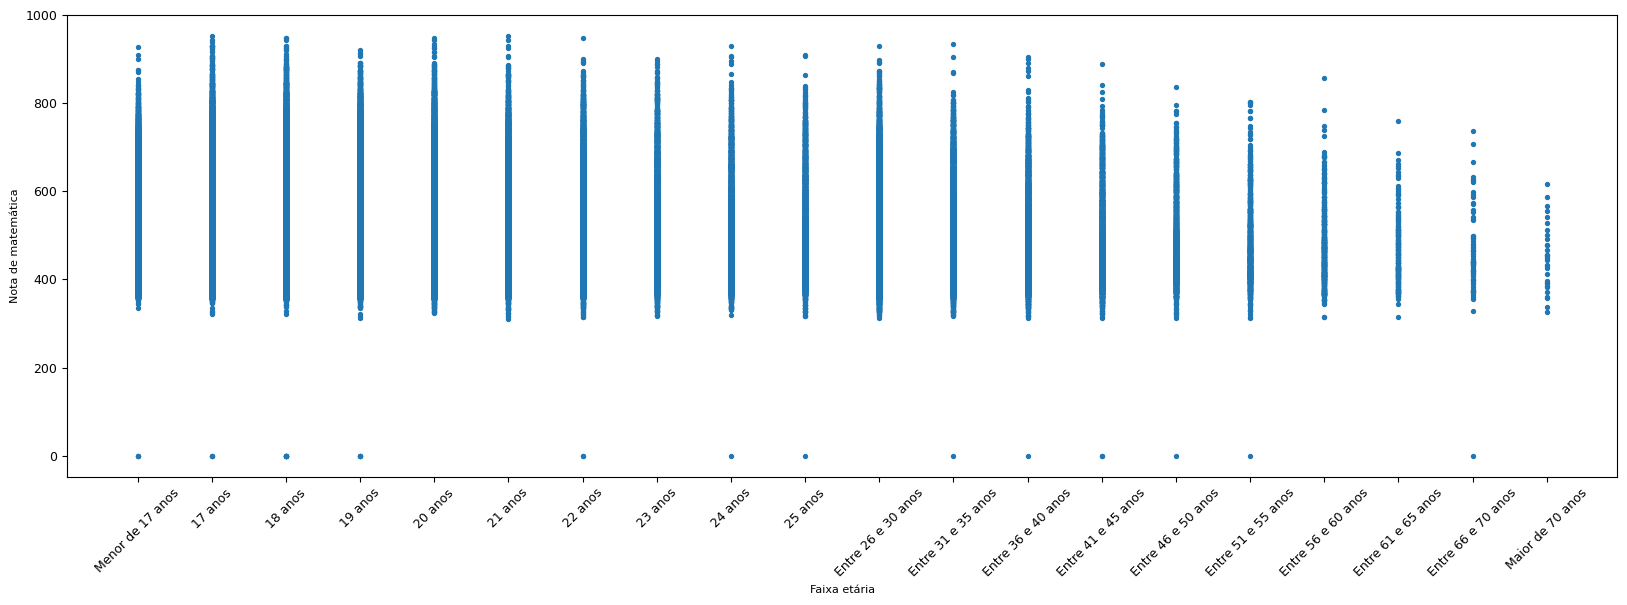

In [226]:
df_idade_ensino_sorted = df_idade_ensino.sort_values(by = "TP_FAIXA_ETARIA_APOIO")

plt.figure(figsize=(20,6))
plt.scatter(df_idade_ensino["TP_FAIXA_ETARIA_APOIO"], df_idade_ensino["MATEMATICA"], s = 8)
plt.xlabel("Faixa etária", fontsize= 8)
plt.ylabel("Nota de matemática", fontsize= 8)
plt.xticks(ticks = df_idade_ensino_sorted["TP_FAIXA_ETARIA_APOIO"].unique(),
           labels = df_idade_ensino_sorted["TP_FAIXA_ETARIA"].unique(),
           rotation = 45, fontsize=9)
plt.yticks(fontsize=9)
plt.show()

* Após os 17 anos a média das notas de matemática entra em queda

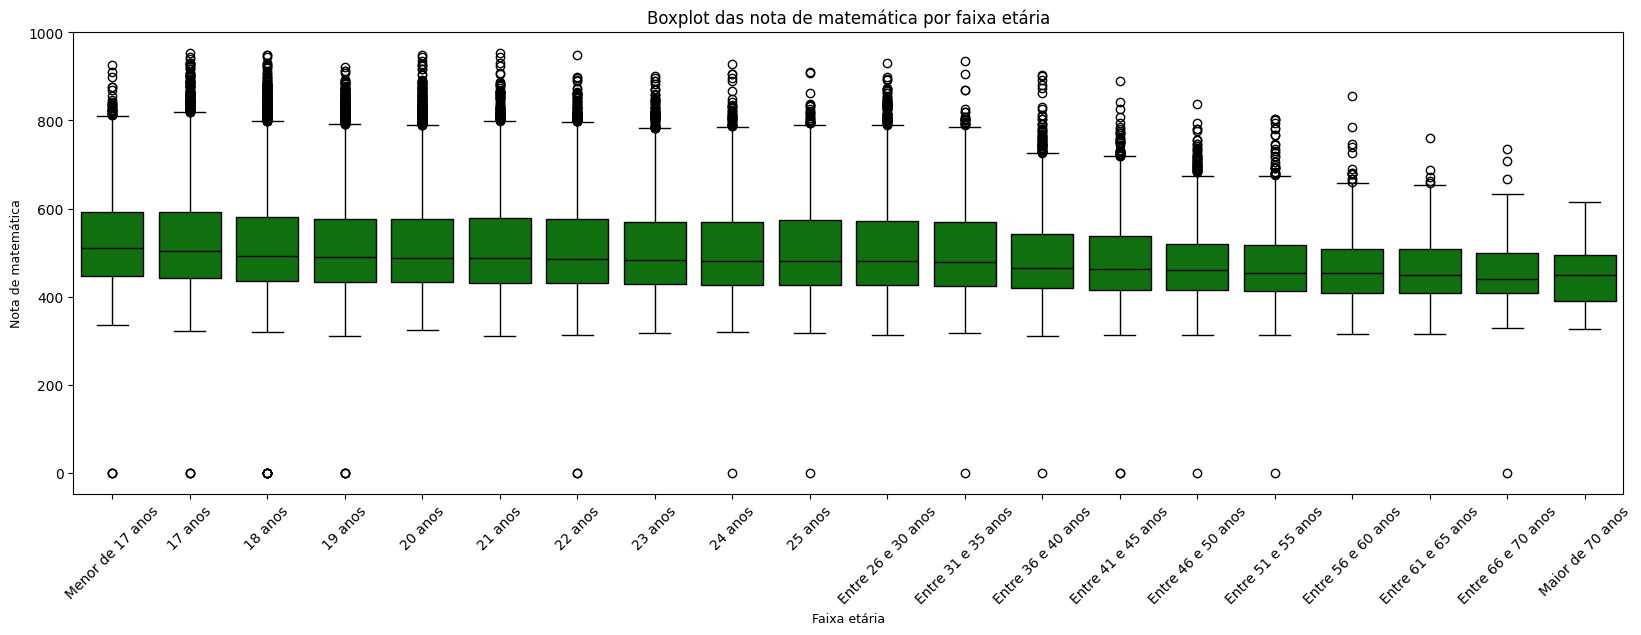

In [227]:
df_idade_ensino_sorted = df_idade_ensino.sort_values(by = "TP_FAIXA_ETARIA_APOIO")

ordem = df_idade_ensino_sorted["TP_FAIXA_ETARIA"].unique()

if "Menor de 17 anos" in ordem:
  ordem = np.delete(ordem, np.where(ordem == "Menor de 17 anos"))
  ordem = np.insert(ordem, 0, "Menor de 17 anos")

faixas = df_idade_ensino_sorted.groupby("TP_FAIXA_ETARIA")["MATEMATICA"].apply(list)

plt.figure(figsize=(20,6))
sns.boxplot(data = df_idade_ensino_sorted ,
            x = "TP_FAIXA_ETARIA",
            y = "MATEMATICA",
            order = ordem,
            color = "green",
            linecolor = "k")

plt.xlabel("Faixa etária", fontsize = 9)
plt.ylabel("Nota de matemática", fontsize = 9)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.title("Boxplot das nota de matemática por faixa etária", fontsize = 12)
plt.show()

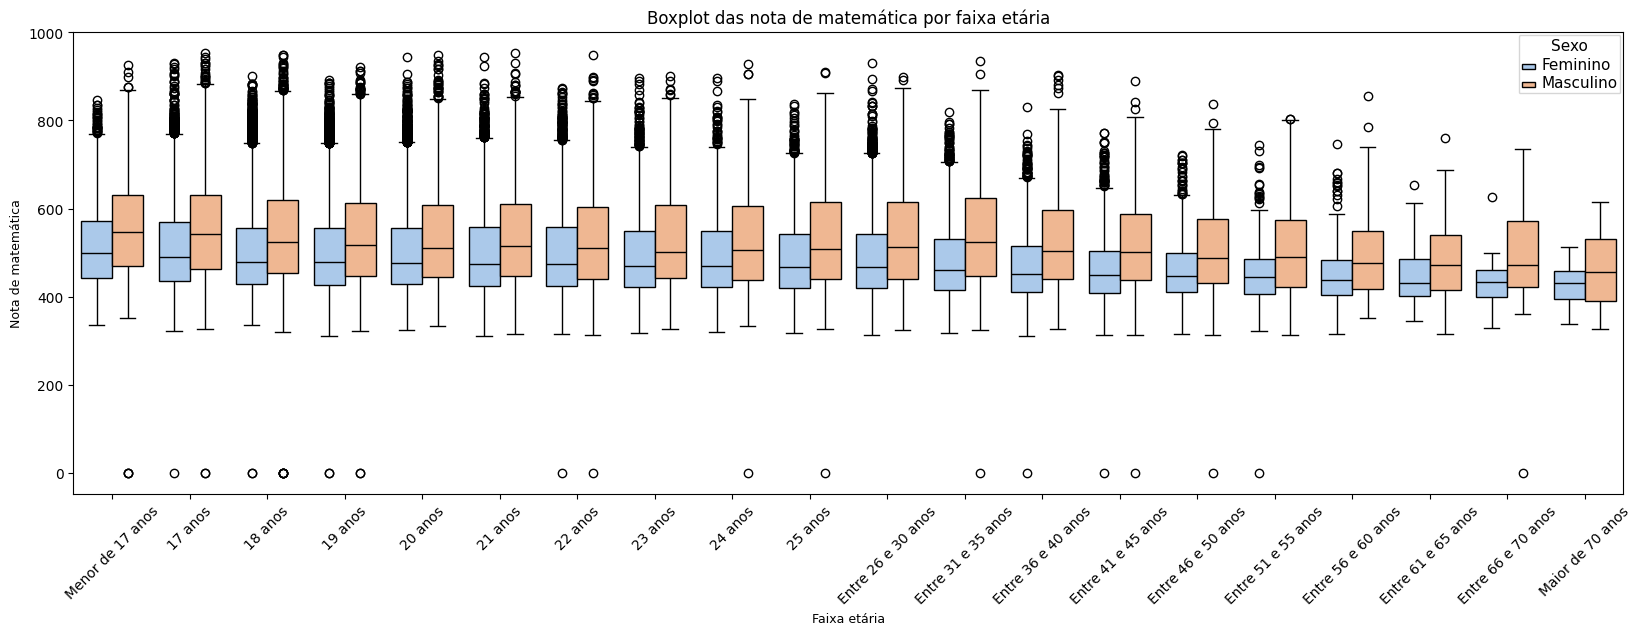

In [228]:
df_idade_ensino_sorted = df_idade_ensino.sort_values(by = "TP_FAIXA_ETARIA_APOIO")

ordem = df_idade_ensino_sorted["TP_FAIXA_ETARIA"].unique()

if "Menor de 17 anos" in ordem:
  ordem = np.delete(ordem, np.where(ordem == "Menor de 17 anos"))
  ordem = np.insert(ordem, 0, "Menor de 17 anos")

faixas = df_idade_ensino_sorted.groupby("TP_FAIXA_ETARIA")["MATEMATICA"].apply(list)

plt.figure(figsize=(20,6))
sns.boxplot(data = df_idade_ensino_sorted ,
            x = "TP_FAIXA_ETARIA",
            y = "MATEMATICA",
            order = ordem,
            hue = "TP_SEXO",
            legend = True,
            palette = "pastel",
            linecolor = "k")

plt.xlabel("Faixa etária", fontsize = 9)
plt.ylabel("Nota de matemática", fontsize = 9)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.title("Boxplot das nota de matemática por faixa etária", fontsize = 12)

leg = plt.legend()
plt.setp(leg.get_texts(), fontsize=11)
leg.set_title("Sexo")
leg.get_title().set_fontsize(11)

plt.show()

In [229]:
df_mediana = df_idade_ensino_sorted.groupby(by = "TP_SEXO")[["CIENCIAS_NATUREZA", "HUMANAS", "LINGUAGENS", "MATEMATICA"]].median().reset_index()#agg(["mean","median","max"])
df_mediana.head()

TP_SEXO  CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA
0   Feminino              462.3    496.5       487.2       478.3
1  Masculino              488.9    527.0       502.3       522.2

In [230]:
df_mediana = df_mediana.melt(id_vars="TP_SEXO", var_name="PROVA", value_name="NOTA")
df_mediana.head()

TP_SEXO              PROVA   NOTA
0   Feminino  CIENCIAS_NATUREZA  462.3
1  Masculino  CIENCIAS_NATUREZA  488.9
2   Feminino            HUMANAS  496.5
3  Masculino            HUMANAS  527.0
4   Feminino         LINGUAGENS  487.2

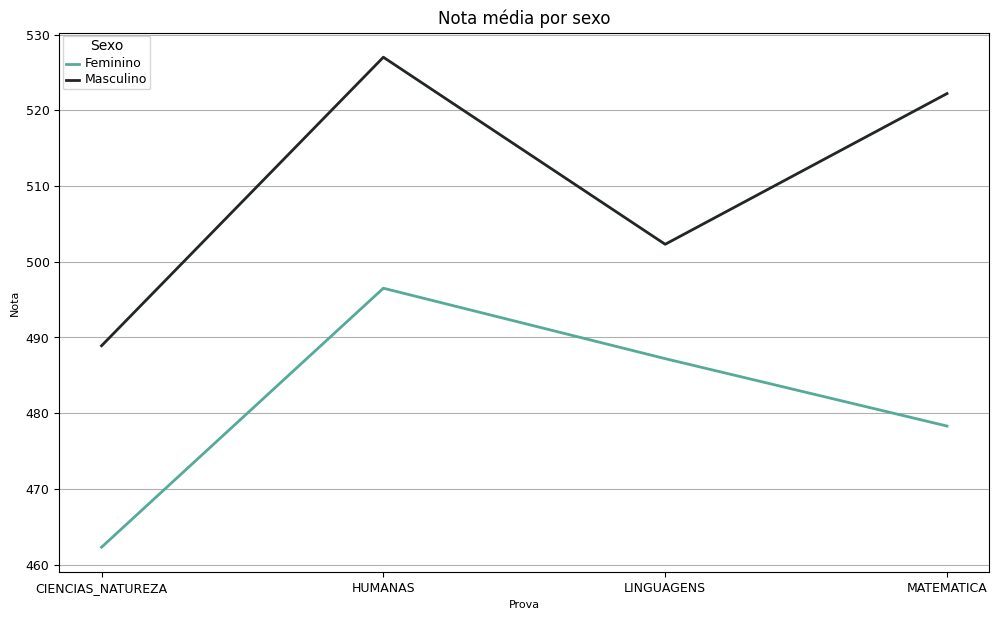

In [231]:
plt.figure(figsize=(12,7))
sns.lineplot(data = df_mediana, x="PROVA", y = "NOTA", hue = "TP_SEXO",
             linewidth = 2, legend = "full", palette = "dark:#5A9_r")

plt.title("Nota média por sexo", fontsize = 12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("Prova",fontsize=8)
plt.ylabel("Nota",fontsize=8)

leg = plt.legend(loc = "upper left")
plt.setp(leg.get_texts(), fontsize=9)
leg.set_title("Sexo")
leg.get_title().set_fontsize(10)

plt.grid(axis = "y")

plt.show()

In [232]:
df_mediana

TP_SEXO              PROVA   NOTA
0   Feminino  CIENCIAS_NATUREZA  462.3
1  Masculino  CIENCIAS_NATUREZA  488.9
2   Feminino            HUMANAS  496.5
3  Masculino            HUMANAS  527.0
4   Feminino         LINGUAGENS  487.2
5  Masculino         LINGUAGENS  502.3
6   Feminino         MATEMATICA  478.3
7  Masculino         MATEMATICA  522.2

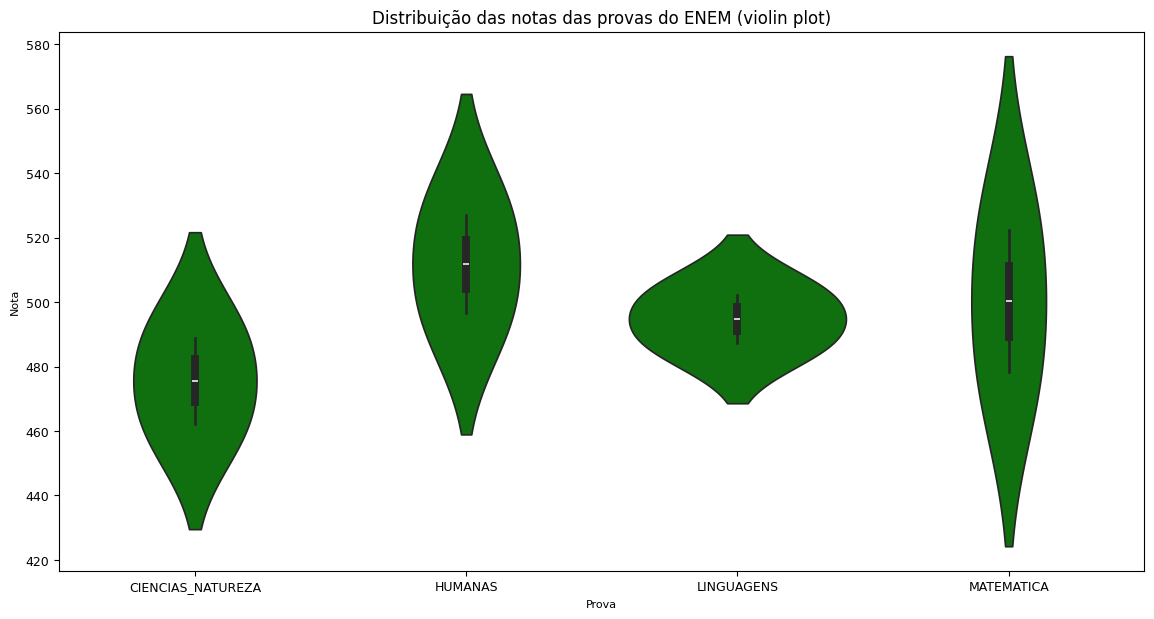

In [233]:
plt.figure(figsize = (14,7))

sns.violinplot(data = df_mediana,
               x = "PROVA",
               y = "NOTA",
               color = "green")
plt.xlabel("Prova",fontsize=8)
plt.ylabel("Nota",fontsize=8)
plt.title("Distribuição das notas das provas do ENEM (violin plot)", fontsize = 12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

In [234]:
df_mediana_idade = df_idade_ensino_sorted.groupby(by = ["TP_FAIXA_ETARIA_APOIO","TP_FAIXA_ETARIA"])[["CIENCIAS_NATUREZA",
                                                                                 "HUMANAS", "LINGUAGENS", "MATEMATICA"]].median().reset_index()
df_mediana_idade.head()

TP_FAIXA_ETARIA_APOIO   TP_FAIXA_ETARIA  CIENCIAS_NATUREZA  HUMANAS  \
0                      1  Menor de 17 anos              468.7    508.8   
1                      2           17 anos              471.1    509.9   
2                      3           18 anos              468.0    502.2   
3                      4           19 anos              467.3    497.2   
4                      5           20 anos              468.2    499.1   

   LINGUAGENS  MATEMATICA  
0       503.0       511.3  
1       499.0       504.6  
2       491.2       493.2  
3       487.0       489.5  
4       487.0       488.2

In [235]:
df_mediana_idade_ext = df_mediana_idade.melt(id_vars=["TP_FAIXA_ETARIA_APOIO","TP_FAIXA_ETARIA"],
                                         value_vars = ["CIENCIAS_NATUREZA","HUMANAS","LINGUAGENS","MATEMATICA"],
                                         var_name="PROVA", value_name="NOTA")
df_mediana_idade_ext.head()

TP_FAIXA_ETARIA_APOIO   TP_FAIXA_ETARIA              PROVA   NOTA
0                      1  Menor de 17 anos  CIENCIAS_NATUREZA  468.7
1                      2           17 anos  CIENCIAS_NATUREZA  471.1
2                      3           18 anos  CIENCIAS_NATUREZA  468.0
3                      4           19 anos  CIENCIAS_NATUREZA  467.3
4                      5           20 anos  CIENCIAS_NATUREZA  468.2

In [236]:
df_mediana_idade_ext.query("PROVA == 'MATEMATICA'").reset_index(drop= True).head()

TP_FAIXA_ETARIA_APOIO   TP_FAIXA_ETARIA       PROVA   NOTA
0                      1  Menor de 17 anos  MATEMATICA  511.3
1                      2           17 anos  MATEMATICA  504.6
2                      3           18 anos  MATEMATICA  493.2
3                      4           19 anos  MATEMATICA  489.5
4                      5           20 anos  MATEMATICA  488.2

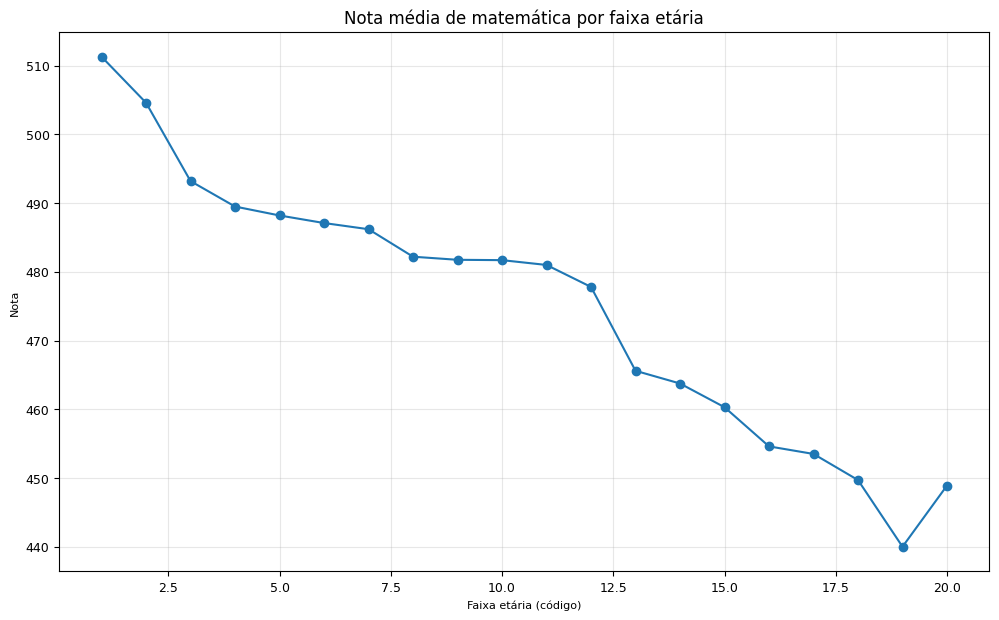

In [237]:
prova = df_mediana_idade_ext.query("PROVA == 'MATEMATICA'").reset_index(drop= True)

plt.figure(figsize=(12,7))

plt.plot(prova["TP_FAIXA_ETARIA_APOIO"], prova["NOTA"], marker = "o")
plt.title("Nota média de matemática por faixa etária", fontsize= 12)
plt.xlabel("Faixa etária (código)",fontsize = 8)
plt.ylabel("Nota",fontsize = 8)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.grid(alpha=0.3)

plt.show()

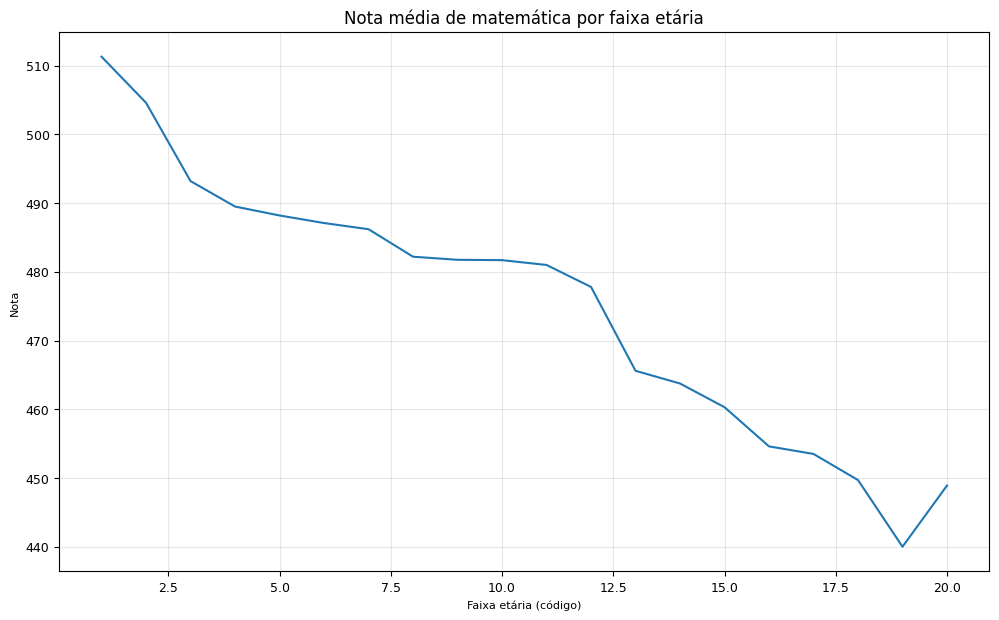

In [238]:
plt.figure(figsize=(12,7))

sns.lineplot(data = prova, x = "TP_FAIXA_ETARIA_APOIO", y= "NOTA")
plt.title("Nota média de matemática por faixa etária", fontsize= 12)
plt.xlabel("Faixa etária (código)",fontsize = 8)
plt.ylabel("Nota",fontsize = 8)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.grid(alpha=0.3)
plt.show()

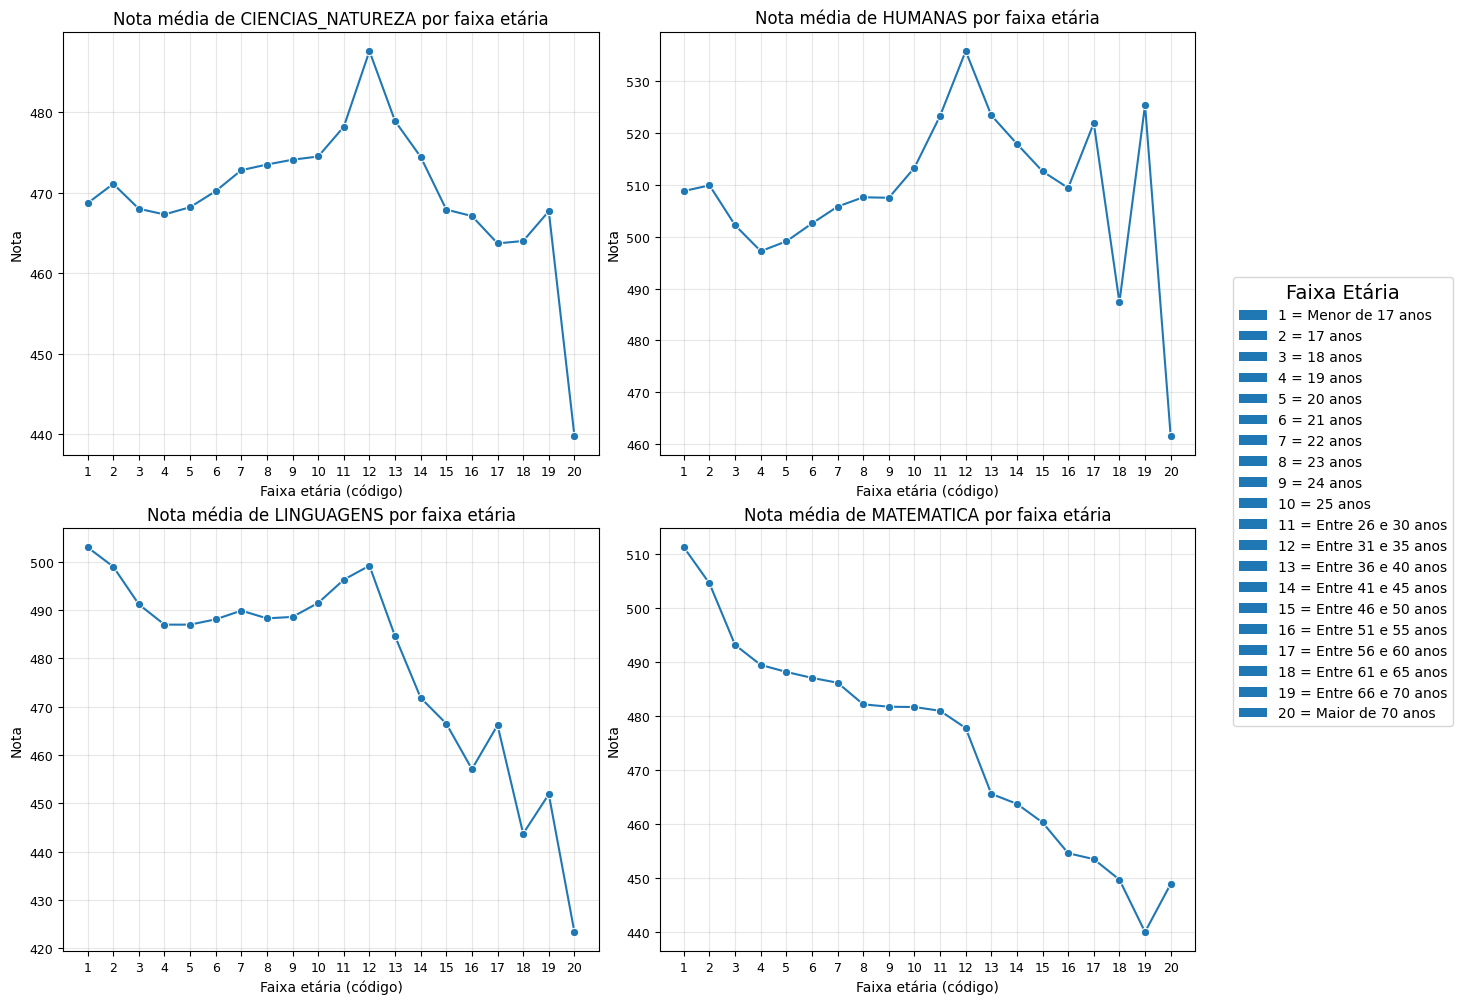

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

materias = df_mediana_idade_ext["PROVA"].unique()


#Legenda universal
mapa_idade = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

handles = [mpatches.Patch(label=f"{k} = {v}") for k, v in mapa_idade.items()]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax_flat = ax.flatten()


for i, col_name in enumerate(materias):

    # Filtra corretamente a matéria
    df_temp = df_mediana_idade_ext[df_mediana_idade_ext["PROVA"] == col_name]

    # Lineplot correto
    sns.lineplot(
        data=df_temp,
        x="TP_FAIXA_ETARIA_APOIO",
        y="NOTA",
        marker="o",
        ax=ax_flat[i]
    )

    # Títulos corretos
    ax_flat[i].set_title(f"Nota média de {col_name} por faixa etária", fontsize=12)
    ax_flat[i].set_xlabel("Faixa etária (código)", fontsize=10)
    ax_flat[i].set_ylabel("Nota", fontsize=10)

    # Ticks
    ax_flat[i].tick_params(axis='x', labelsize=9)
    ax_flat[i].set_xticks(sorted(df_temp["TP_FAIXA_ETARIA_APOIO"].unique()))
    ax_flat[i].tick_params(axis='y', labelsize=9)

    ax_flat[i].grid(alpha=0.3)

fig.tight_layout()

fig.legend(handles=handles, loc='center left',title="Faixa Etária", title_fontsize = 14, fontsize=10,  bbox_to_anchor = (1.02,0.5))

plt.show()


In [240]:
df_info_sociais = df[["TP_FAIXA_ETARIA","TP_FAIXA_ETARIA_APOIO","TP_ESTADO_CIVIL","TP_COR_RACA","TP_NACIONALIDADE",
                      "TIPO_ESCOLA","TP_ENSINO","DEPENDENCIA_ADM_ESCOLA","LOCALIZACAO_ESCOLA","CIENCIAS_NATUREZA",
                      "HUMANAS", "LINGUAGENS", "MATEMATICA", "REDACAO", "TP_LINGUA", "TP_STATUS_REDACAO" ]].reset_index(drop = True)
df_info_sociais.head()

TP_FAIXA_ETARIA  TP_FAIXA_ETARIA_APOIO TP_ESTADO_CIVIL TP_COR_RACA  \
0         19 anos                      4     Solteiro(a)       Parda   
1         18 anos                      3     Solteiro(a)       Parda   
2         25 anos                     10     Solteiro(a)       Preta   
3         24 anos                      9     Solteiro(a)       Preta   
4         18 anos                      3     Solteiro(a)      Branca   

  TP_NACIONALIDADE    TIPO_ESCOLA TP_ENSINO DEPENDENCIA_ADM_ESCOLA  \
0    Brasileiro(a)        Pública   Regular                     NA   
1    Brasileiro(a)        Pública   Regular                     NA   
2    Brasileiro(a)  Não respondeu        NA                     NA   
3    Brasileiro(a)  Não respondeu        NA                     NA   
4    Brasileiro(a)        Pública   Regular               Estadual   

  LOCALIZACAO_ESCOLA  CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA  \
0                 NA              507.6    539.2       494.6       413.3   
1                 NA              439.6    437.7       455.9       446.2   
2                 NA              548.1    619.5       676.3       386.6   
3                 NA              465.2    613.1       522.1       579.6   
4             Urbana              414.6    410.1       386.7       423.0   

   REDACAO TP_LINGUA  TP_STATUS_REDACAO  
0    380.0  Espanhol                1.0  
1    460.0    Inglês                1.0  
2    580.0    Inglês                1.0  
3    540.0    Inglês                1.0  
4    700.0    Inglês                1.0

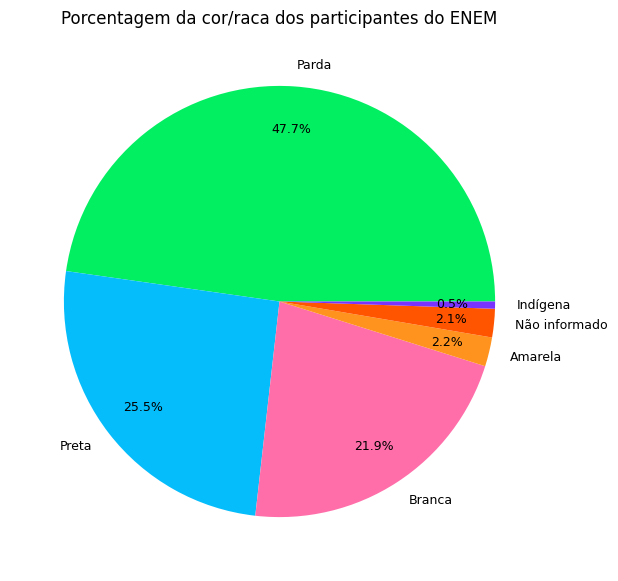

In [241]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc','#ff6ea9','#ff931e','#ff5400','#7933ff']
plt.pie(df_info_sociais["TP_COR_RACA"].value_counts(), labels = df_info_sociais["TP_COR_RACA"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem da cor/raca dos participantes do ENEM", fontsize = 12)
plt.show()

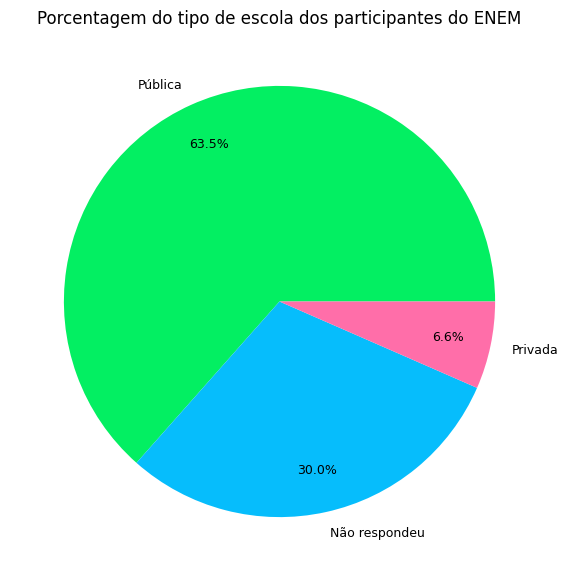

In [242]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc','#ff6ea9']#,'#ff931e','#ff5400','#7933ff']
plt.pie(df_info_sociais["TIPO_ESCOLA"].value_counts(), labels = df_info_sociais["TIPO_ESCOLA"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem do tipo de escola dos participantes do ENEM", fontsize = 12)
plt.show()

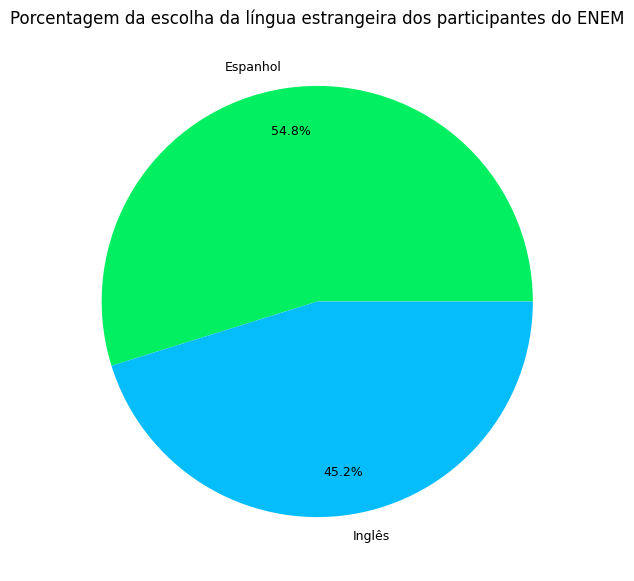

In [243]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc']#,'#ff6ea9','#ff931e','#ff5400','#7933ff']
plt.pie(df_info_sociais["TP_LINGUA"].value_counts(), labels = df_info_sociais["TP_LINGUA"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem da escolha da língua estrangeira dos participantes do ENEM", fontsize = 12)
plt.show()

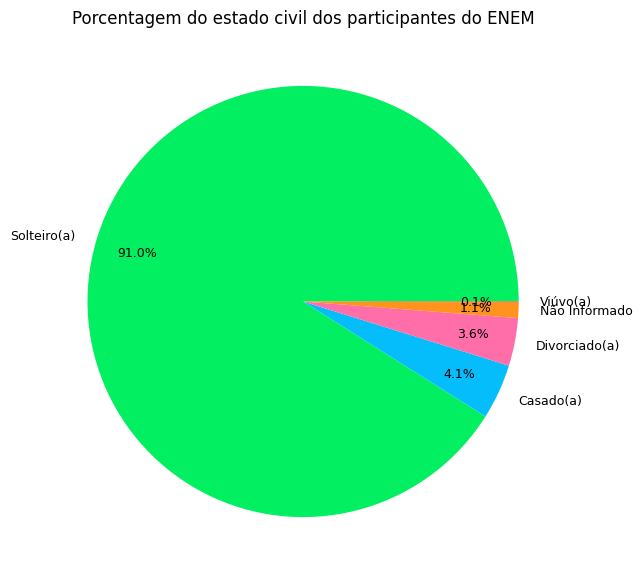

In [244]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc','#ff6ea9','#ff931e','#ff5400']#,'#7933ff']
plt.pie(df_info_sociais["TP_ESTADO_CIVIL"].value_counts(), labels = df_info_sociais["TP_ESTADO_CIVIL"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem do estado civil dos participantes do ENEM", fontsize = 12)
plt.show()

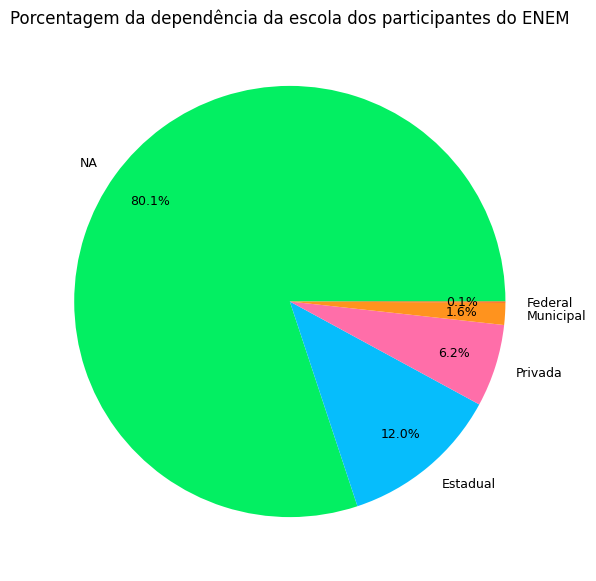

In [245]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc','#ff6ea9','#ff931e','#ff5400']#,'#7933ff']
plt.pie(df_info_sociais["DEPENDENCIA_ADM_ESCOLA"].value_counts(), labels = df_info_sociais["DEPENDENCIA_ADM_ESCOLA"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem da dependência da escola dos participantes do ENEM", fontsize = 12)
plt.show()

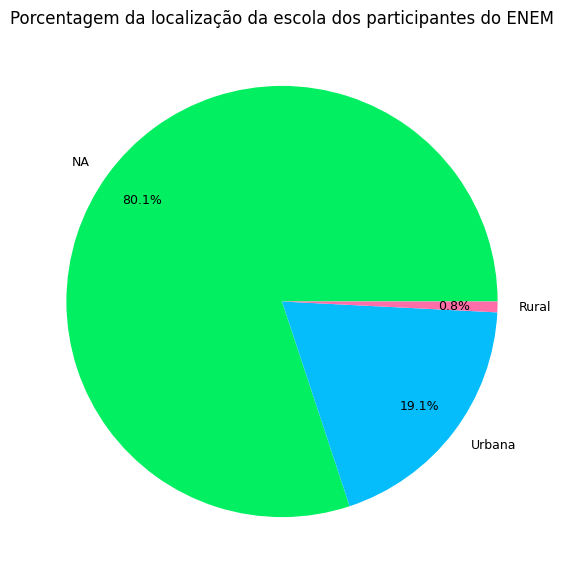

In [246]:
plt.figure(figsize = (12,7))
palette = ['#03ef62','#06bdfc','#ff6ea9','#ff931e','#ff5400']#,'#7933ff']
plt.pie(df_info_sociais["LOCALIZACAO_ESCOLA"].value_counts(), labels = df_info_sociais["LOCALIZACAO_ESCOLA"].unique(),
        autopct = "%1.1f%%", colors = palette, textprops={"fontsize":9},
        pctdistance= 0.8, labeldistance=1.1, startangle=360)
plt.title("Porcentagem da localização da escola dos participantes do ENEM", fontsize = 12)
plt.show()

In [247]:
for i in df_info_sociais.columns:
  print(30 * "=")
  print(i)
  print(df_info_sociais[i].unique())
  print(30 * "=")

TP_FAIXA_ETARIA
['19 anos' '18 anos' '25 anos' '24 anos' '21 anos' 'Menor de 17 anos'
 '20 anos' 'Entre 31 e 35 anos' 'Entre 26 e 30 anos' '17 anos'
 'Entre 36 e 40 anos' '22 anos' 'Entre 41 e 45 anos' '23 anos'
 'Entre 51 e 55 anos' 'Entre 46 e 50 anos' 'Entre 56 e 60 anos'
 'Maior de 70 anos' 'Entre 61 e 65 anos' 'Entre 66 e 70 anos']
TP_FAIXA_ETARIA_APOIO
[ 4  3 10  9  6  1  5 12 11  2 13  7 14  8 16 15 17 20 18 19]
TP_ESTADO_CIVIL
['Solteiro(a)' 'Casado(a)' 'Divorciado(a)' 'Não Informado' 'Viúvo(a)']
TP_COR_RACA
['Parda' 'Preta' 'Branca' 'Amarela' 'Não informado' 'Indígena']
TP_NACIONALIDADE
['Brasileiro(a)' 'Brasileiro(a) naturalizado(a)'
 'Brasileiro(a) Nato(a), nascido(a) no exterior' 'Estrangeiro'
 'Não informado']
TIPO_ESCOLA
['Pública' 'Não respondeu' 'Privada']
TP_ENSINO
['Regular' 'NA' 'Educacao Especial - Modalidade Substitutiva']
DEPENDENCIA_ADM_ESCOLA
['NA' 'Estadual' 'Privada' 'Municipal' 'Federal']
LOCALIZACAO_ESCOLA
['NA' 'Urbana' 'Rural']
CIENCIAS_NATUREZA
[507.6 439

In [248]:
df_info_sociais.select_dtypes(include=np.number).corr()

TP_FAIXA_ETARIA_APOIO  CIENCIAS_NATUREZA   HUMANAS  \
TP_FAIXA_ETARIA_APOIO               1.000000           0.036767  0.047000   
CIENCIAS_NATUREZA                   0.036767           1.000000  0.640864   
HUMANAS                             0.047000           0.640864  1.000000   
LINGUAGENS                         -0.041270           0.634044  0.728527   
MATEMATICA                         -0.082100           0.616545  0.587515   
REDACAO                            -0.145687           0.442368  0.466236   
TP_STATUS_REDACAO                   0.026989          -0.089452 -0.104899   

                       LINGUAGENS  MATEMATICA   REDACAO  TP_STATUS_REDACAO  
TP_FAIXA_ETARIA_APOIO   -0.041270   -0.082100 -0.145687           0.026989  
CIENCIAS_NATUREZA        0.634044    0.616545  0.442368          -0.089452  
HUMANAS                  0.728527    0.587515  0.466236          -0.104899  
LINGUAGENS               1.000000    0.592049  0.493683          -0.118935  
MATEMATICA               0.592049    1.000000  0.467180          -0.088646  
REDACAO                  0.493683    0.467180  1.000000          -0.516282  
TP_STATUS_REDACAO       -0.118935   -0.088646 -0.516282           1.000000

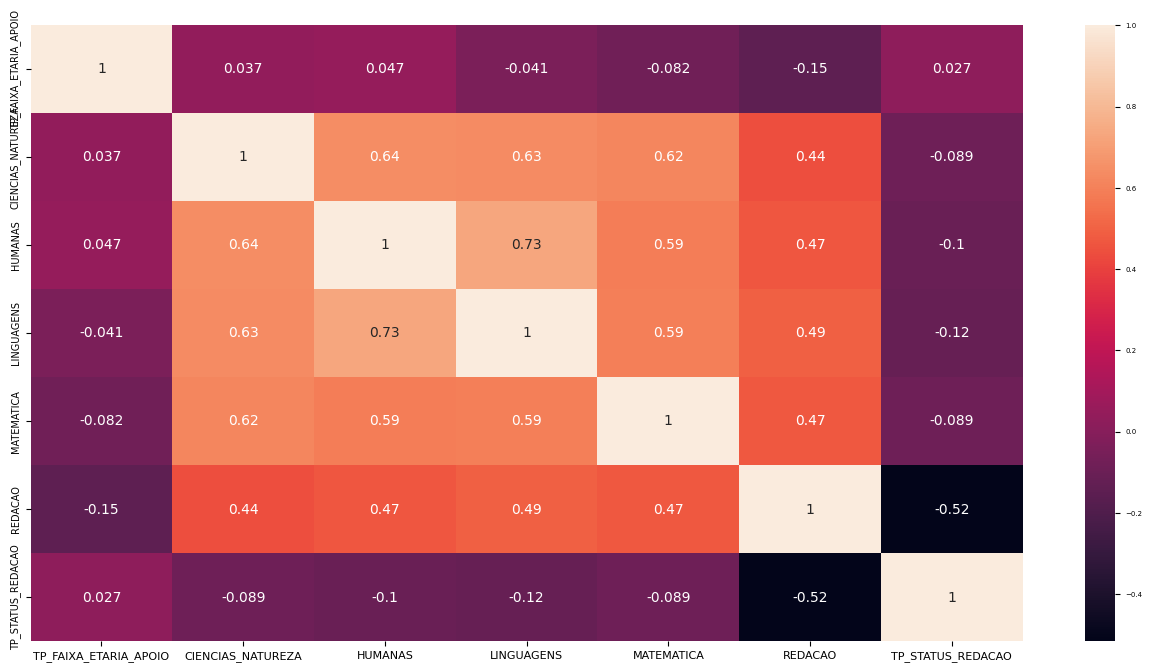

In [249]:
plt.figure(figsize = (16,8))
sns.heatmap(data =df_info_sociais.select_dtypes(include=np.number).corr(), annot = True, annot_kws={"fontsize":10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.show()

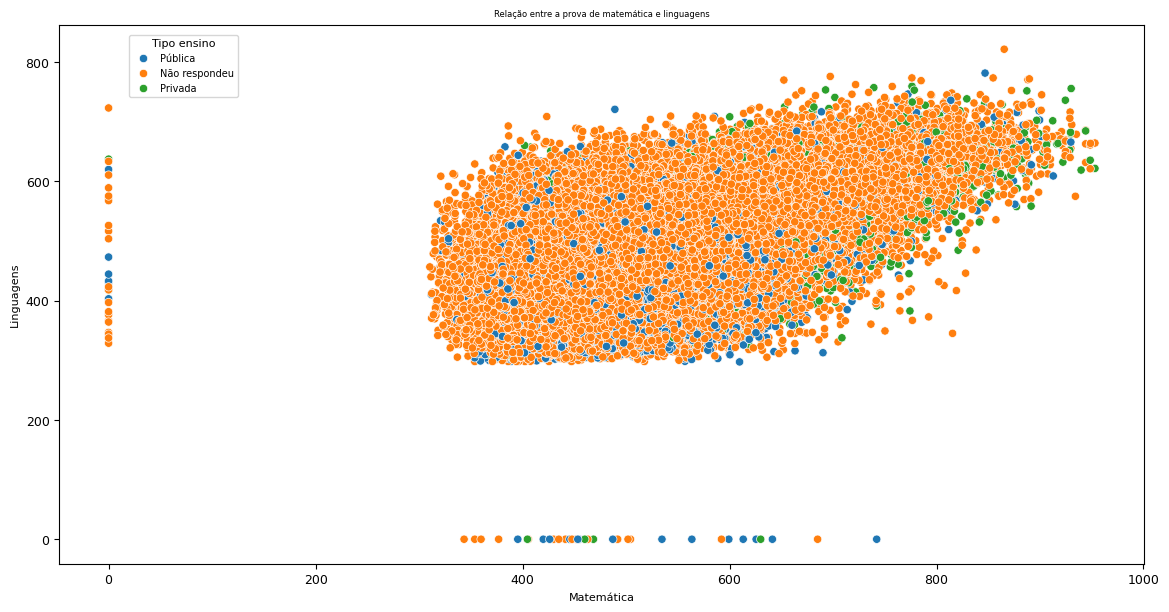

In [250]:
plt.figure(figsize= (14,7))
sns.scatterplot(data = df_info_sociais, x = "MATEMATICA", y = "LINGUAGENS", hue = "TIPO_ESCOLA")
plt.title("Relação entre a prova de matemática e linguagens")
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Linguagens", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(loc='upper left',title="Tipo ensino", title_fontsize = 8, fontsize= 7,  bbox_to_anchor = (0.06,0.99))
plt.show()

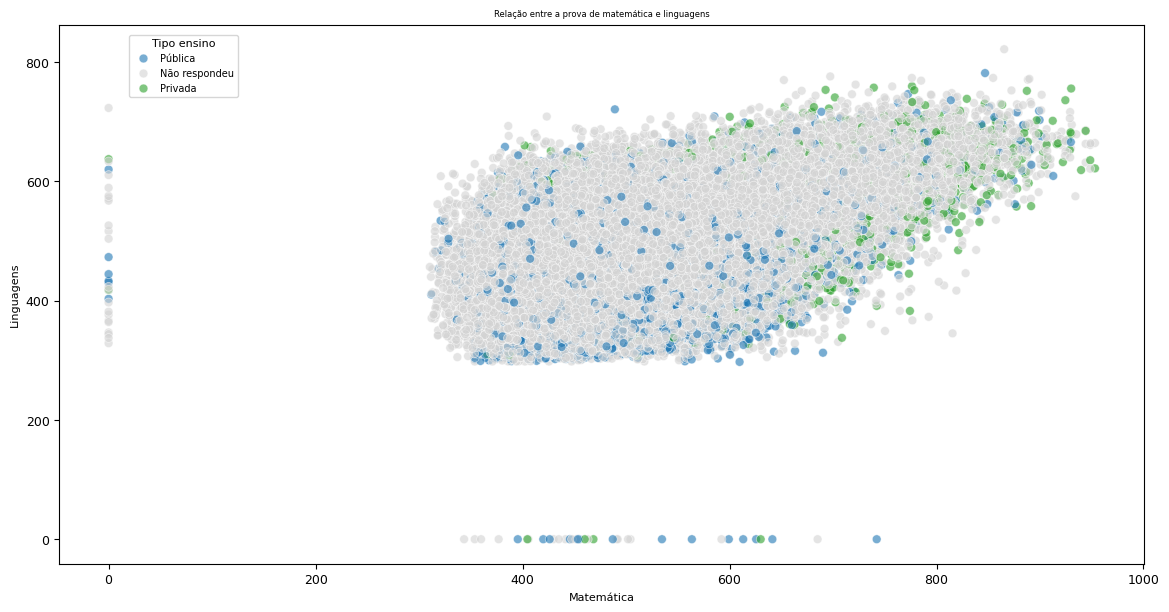

In [251]:
plt.figure(figsize= (14,7))
sns.scatterplot(data = df_info_sociais, x = "MATEMATICA", y = "LINGUAGENS", hue = "TIPO_ESCOLA",
                palette = {
                      "Pública": "#1f77b4",
                      "Privada": "#2ca02c",
                      "Não respondeu": "lightgray"
                }, alpha = 0.6, s = 40)
plt.title("Relação entre a prova de matemática e linguagens")
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Linguagens", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(loc='upper left',title="Tipo ensino", title_fontsize = 8, fontsize= 7,  bbox_to_anchor = (0.06,0.99))
plt.show()

In [252]:
# plt.figure(figsize=(14,7))

# sns.kdeplot(
#     data=df_info_sociais,
#     x="MATEMATICA",
#     y="LINGUAGENS",
#     hue="TIPO_ESCOLA",
#     fill=True,
#     alpha=0.4
# )

# plt.title("Distribuição conjunta das notas por tipo de escola")
# plt.xlabel("Matemática")
# plt.ylabel("Linguagens")

# plt.show()


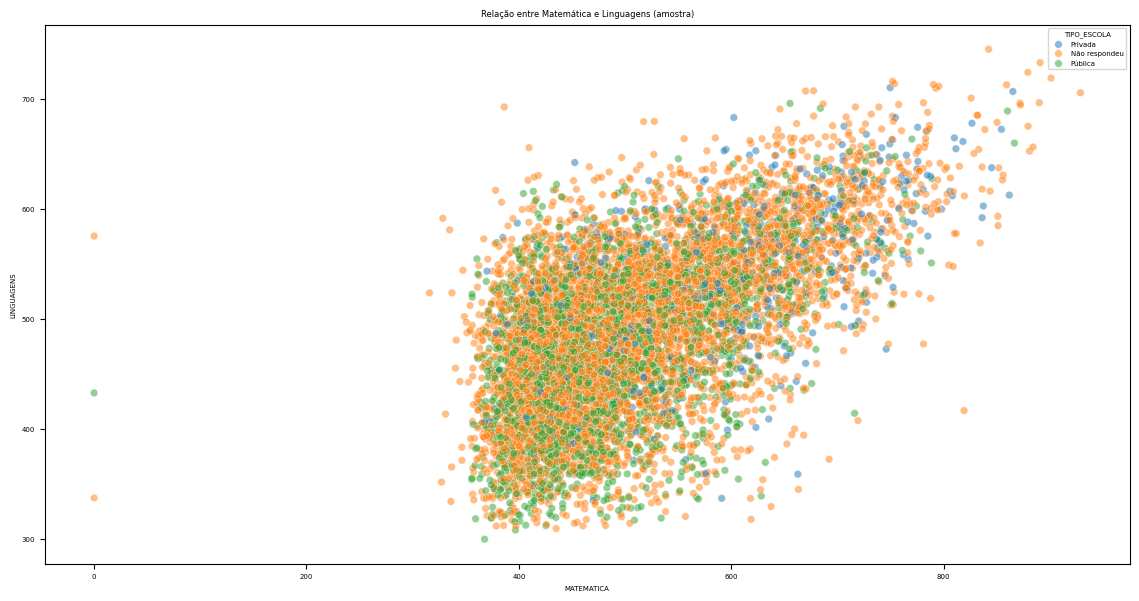

In [253]:
df_sample = df_info_sociais.sample(8000, random_state=42)

plt.figure(figsize=(14,7))
sns.scatterplot(
    data=df_sample,
    x="MATEMATICA",
    y="LINGUAGENS",
    hue="TIPO_ESCOLA",
    alpha=0.5,
    s=30
)

plt.title("Relação entre Matemática e Linguagens (amostra)")
plt.show()


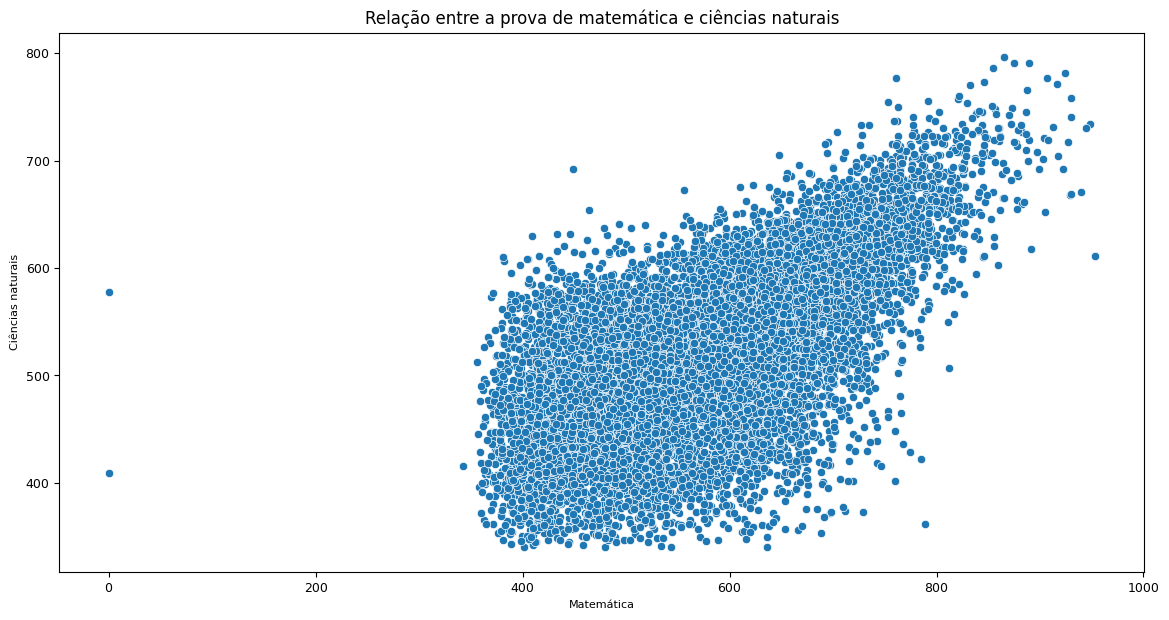

In [254]:
escola_privada = df_info_sociais.query("TIPO_ESCOLA == 'Privada'")


plt.figure(figsize=(14,7))
sns.scatterplot(data = escola_privada, x = "MATEMATICA", y = "CIENCIAS_NATUREZA")
plt.title("Relação entre a prova de matemática e ciências naturais", fontsize = 12)
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Ciências naturais", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

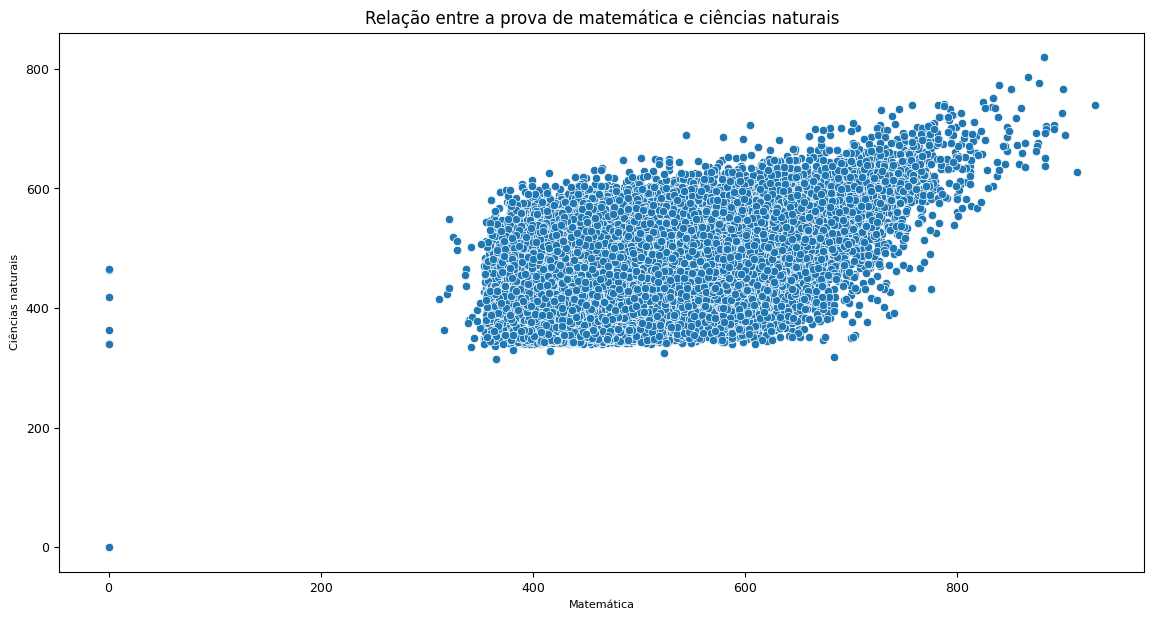

In [255]:
escola_publica = df_info_sociais.query("TIPO_ESCOLA == 'Pública'")


plt.figure(figsize=(14,7))
sns.scatterplot(data = escola_publica, x = "MATEMATICA", y = "CIENCIAS_NATUREZA")
plt.title("Relação entre a prova de matemática e ciências naturais", fontsize = 12)
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Ciências naturais", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

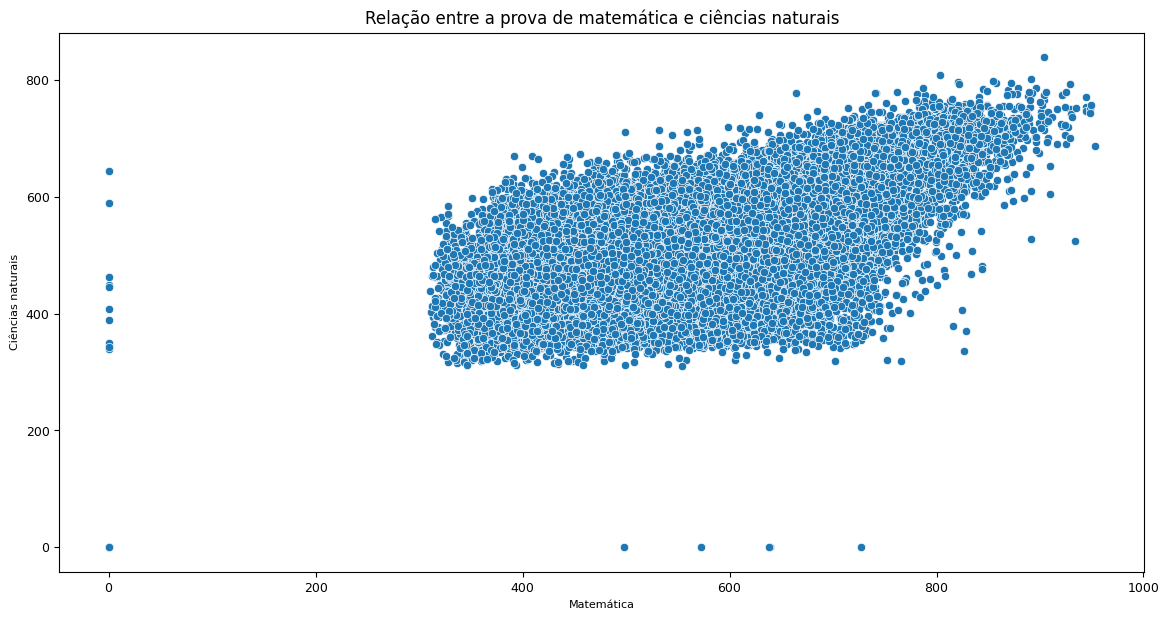

In [256]:
escola_na = df_info_sociais.query("TIPO_ESCOLA == 'Não respondeu'")


plt.figure(figsize=(14,7))
sns.scatterplot(data = escola_na, x = "MATEMATICA", y = "CIENCIAS_NATUREZA")
plt.title("Relação entre a prova de matemática e ciências naturais", fontsize = 12)
plt.xlabel("Matemática", fontsize= 8)
plt.ylabel("Ciências naturais", fontsize= 8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

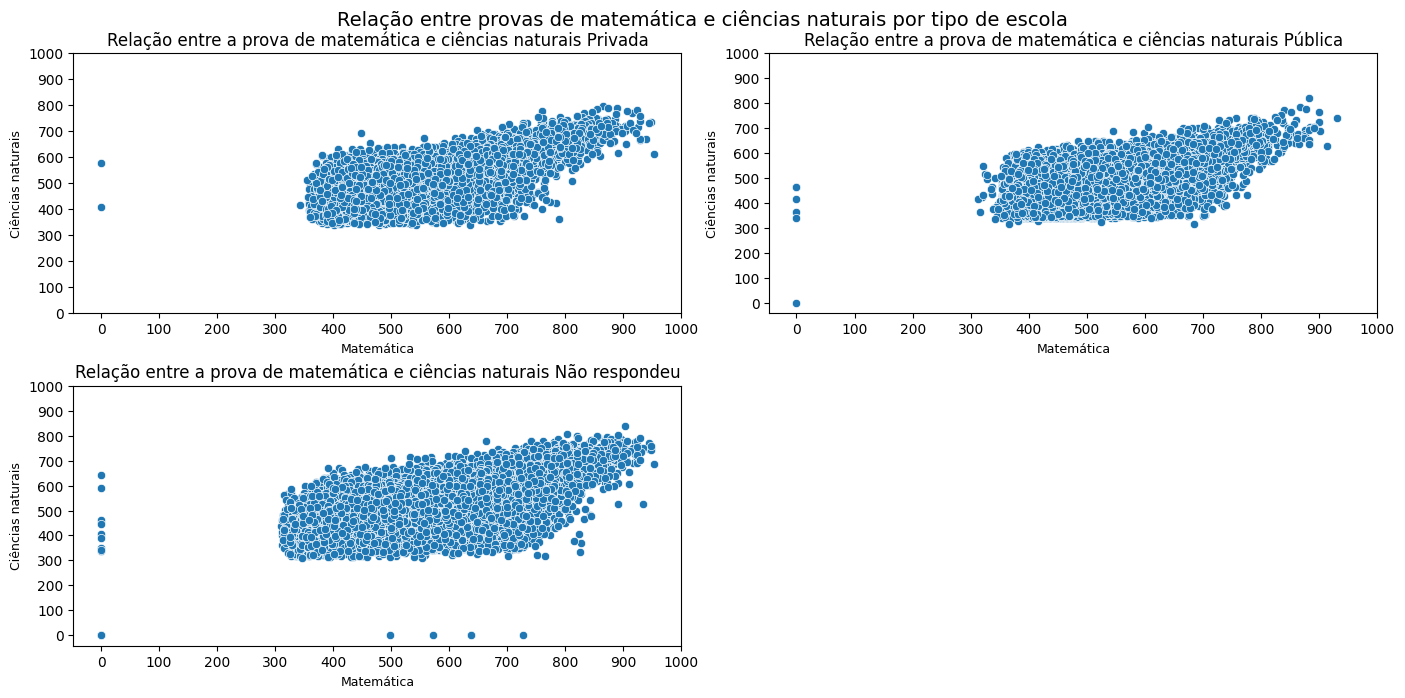

In [257]:
escolas = ["Privada", "Pública" ,"Não respondeu"]

fig, axs = plt.subplots(2,2, figsize = (14,7))
axs = axs.flatten()

for i, escola in enumerate(escolas):
  temp = df_info_sociais[df_info_sociais["TIPO_ESCOLA"] == escola]
  sns.scatterplot(data = temp,
                  x = "MATEMATICA", y = "CIENCIAS_NATUREZA",
                  ax = axs[i])
  axs[i].set_title(f"Relação entre a prova de matemática e ciências naturais {escolas[i]}", fontsize = 12)
  axs[i].set_xlabel("Matemática", fontsize= 9)
  axs[i].set_ylabel("Ciências naturais", fontsize= 9)
  axs[i].set_xticks(np.arange(0,1100,100))
  axs[i].set_yticks(np.arange(0,1100,100))
  axs[i].tick_params(axis="x", labelsize=10)
  axs[i].tick_params(axis="y", labelsize=10)

fig.delaxes(axs[3])

fig.suptitle(
    "Relação entre provas de matemática e ciências naturais por tipo de escola",
    fontsize = 14
)

plt.tight_layout()
plt.show()

In [258]:
for i in df.columns:
  print(30 * "=")
  print(i)
  print(df[i].unique())

NU_INSCRICAO
[210051128744 210052118573 210052350230 ... 210054023073 210053251102
 210054023670]
NU_ANO
[2021]
TP_FAIXA_ETARIA
['19 anos' '18 anos' '25 anos' '24 anos' '21 anos' 'Menor de 17 anos'
 '20 anos' 'Entre 31 e 35 anos' 'Entre 26 e 30 anos' '17 anos'
 'Entre 36 e 40 anos' '22 anos' 'Entre 41 e 45 anos' '23 anos'
 'Entre 51 e 55 anos' 'Entre 46 e 50 anos' 'Entre 56 e 60 anos'
 'Maior de 70 anos' 'Entre 61 e 65 anos' 'Entre 66 e 70 anos']
TP_SEXO
['Feminino' 'Masculino']
TP_ESTADO_CIVIL
['Solteiro(a)' 'Casado(a)' 'Divorciado(a)' 'Não Informado' 'Viúvo(a)']
TP_COR_RACA
['Parda' 'Preta' 'Branca' 'Amarela' 'Não informado' 'Indígena']
TP_NACIONALIDADE
['Brasileiro(a)' 'Brasileiro(a) naturalizado(a)'
 'Brasileiro(a) Nato(a), nascido(a) no exterior' 'Estrangeiro'
 'Não informado']
TP_ST_CONCLUSAO
['Estou cursando e concluirei o Ensino Médio em 2021'
 'Já concluí o Ensino Médio'
 'Estou cursando e concluirei o Ensino Médio após 2021'
 'Não concluí e não estou cursando o Ensino Médio']

#Retirando colunas sem utilidade para a visualização no Power BI

In [260]:
df.head()

NU_INSCRICAO  NU_ANO TP_FAIXA_ETARIA    TP_SEXO TP_ESTADO_CIVIL  \
0  210051128744    2021         19 anos   Feminino     Solteiro(a)   
1  210052118573    2021         18 anos   Feminino     Solteiro(a)   
2  210052350230    2021         25 anos   Feminino     Solteiro(a)   
3  210053156861    2021         24 anos  Masculino     Solteiro(a)   
4  210053085526    2021         18 anos  Masculino     Solteiro(a)   

  TP_COR_RACA TP_NACIONALIDADE  \
0       Parda    Brasileiro(a)   
1       Parda    Brasileiro(a)   
2       Preta    Brasileiro(a)   
3       Preta    Brasileiro(a)   
4      Branca    Brasileiro(a)   

                                     TP_ST_CONCLUSAO TP_ANO_CONCLUIU  \
0  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
1  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
2                          Já concluí o Ensino Médio            2013   
3                          Já concluí o Ensino Médio            2016   
4  Estou cursando e concluirei o Ensino Médio em ...   Não informado   

     TIPO_ESCOLA TP_ENSINO TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
0        Pública   Regular       Não               NaN              NaN   
1        Pública   Regular       Não               NaN              NaN   
2  Não respondeu        NA       Não               NaN              NaN   
3  Não respondeu        NA       Não               NaN              NaN   
4        Pública   Regular       Não         2932606.0           Urandi   

   CO_UF_ESC SG_UF_ESC DEPENDENCIA_ADM_ESCOLA LOCALIZACAO_ESCOLA  \
0        NaN       NaN                     NA                 NA   
1        NaN       NaN                     NA                 NA   
2        NaN       NaN                     NA                 NA   
3        NaN       NaN                     NA                 NA   
4       29.0        BA               Estadual             Urbana   

  TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
0              NA             2927200        Ruy Barbosa           29   
1              NA             2903201          Barreiras           29   
2              NA             2928802      Santo Estêvão           29   
3              NA             2910800   Feira de Santana           29   
4    Em atividade             2932606             Urandi           29   

   CIENCIAS_NATUREZA  HUMANAS  LINGUAGENS  MATEMATICA TP_LINGUA  \
0              507.6    539.2       494.6       413.3  Espanhol   
1              439.6    437.7       455.9       446.2    Inglês   
2              548.1    619.5       676.3       386.6    Inglês   
3              465.2    613.1       522.1       579.6    Inglês   
4              414.6    410.1       386.7       423.0    Inglês   

   TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
0                1.0           80.0          120.0           80.0   
1                1.0           80.0          120.0           80.0   
2                1.0          120.0          120.0          100.0   
3                1.0          100.0          120.0          100.0   
4                1.0          120.0          180.0          140.0   

   NU_NOTA_COMP4  NU_NOTA_COMP5  REDACAO  \
0           80.0           20.0    380.0   
1          100.0           80.0    460.0   
2          120.0          120.0    580.0   
3          120.0          100.0    540.0   
4          160.0          100.0    700.0   

                         escolaridade_pai  \
0            Completou 8/9 série e nao EM   
1              Não completou 4/5 serie EF   
2                                 Não sei   
3      Completou faculdade e não Pós-grad   
4  Completou 4/5 serie e nao 8/9 serie EF   

                         escolaridade_mae                        ocupacao_pai  \
0            Completou 8/9 série e nao EM  Trabalhador Técnico/Supervisor/MEI   
1      Completou faculdade e não Pós-grad       Trabalhador de Serviços/Apoio   
2            Completou EM e não faculdade       

In [262]:
df = df.drop(['NU_INSCRICAO','NU_ANO','CO_UF_PROVA'], axis=1)

In [263]:
df.head()

TP_FAIXA_ETARIA    TP_SEXO TP_ESTADO_CIVIL TP_COR_RACA TP_NACIONALIDADE  \
0         19 anos   Feminino     Solteiro(a)       Parda    Brasileiro(a)   
1         18 anos   Feminino     Solteiro(a)       Parda    Brasileiro(a)   
2         25 anos   Feminino     Solteiro(a)       Preta    Brasileiro(a)   
3         24 anos  Masculino     Solteiro(a)       Preta    Brasileiro(a)   
4         18 anos  Masculino     Solteiro(a)      Branca    Brasileiro(a)   

                                     TP_ST_CONCLUSAO TP_ANO_CONCLUIU  \
0  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
1  Estou cursando e concluirei o Ensino Médio em ...   Não informado   
2                          Já concluí o Ensino Médio            2013   
3                          Já concluí o Ensino Médio            2016   
4  Estou cursando e concluirei o Ensino Médio em ...   Não informado   

     TIPO_ESCOLA TP_ENSINO TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
0        Pública   Regular       Não               NaN              NaN   
1        Pública   Regular       Não               NaN              NaN   
2  Não respondeu        NA       Não               NaN              NaN   
3  Não respondeu        NA       Não               NaN              NaN   
4        Pública   Regular       Não         2932606.0           Urandi   

   CO_UF_ESC SG_UF_ESC DEPENDENCIA_ADM_ESCOLA LOCALIZACAO_ESCOLA  \
0        NaN       NaN                     NA                 NA   
1        NaN       NaN                     NA                 NA   
2        NaN       NaN                     NA                 NA   
3        NaN       NaN                     NA                 NA   
4       29.0        BA               Estadual             Urbana   

  TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA NO_MUNICIPIO_PROVA  CIENCIAS_NATUREZA  \
0              NA             2927200        Ruy Barbosa              507.6   
1              NA             2903201          Barreiras              439.6   
2              NA             2928802      Santo Estêvão              548.1   
3              NA             2910800   Feira de Santana              465.2   
4    Em atividade             2932606             Urandi              414.6   

   HUMANAS  LINGUAGENS  MATEMATICA TP_LINGUA  TP_STATUS_REDACAO  \
0    539.2       494.6       413.3  Espanhol                1.0   
1    437.7       455.9       446.2    Inglês                1.0   
2    619.5       676.3       386.6    Inglês                1.0   
3    613.1       522.1       579.6    Inglês                1.0   
4    410.1       386.7       423.0    Inglês                1.0   

   NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0           80.0          120.0           80.0           80.0           20.0   
1           80.0          120.0           80.0          100.0           80.0   
2          120.0          120.0          100.0          120.0          120.0   
3          100.0          120.0          100.0          120.0          100.0   
4          120.0          180.0          140.0          160.0          100.0   

   REDACAO                        escolaridade_pai  \
0    380.0            Completou 8/9 série e nao EM   
1    460.0              Não completou 4/5 serie EF   
2    580.0                                 Não sei   
3    540.0      Completou faculdade e não Pós-grad   
4    700.0  Completou 4/5 serie e nao 8/9 serie EF   

                         escolaridade_mae                        ocupacao_pai  \
0            Completou 8/9 série e nao EM  Trabalhador Técnico/Supervisor/MEI   
1      Completou faculdade e não Pós-grad       Trabalhador de Serviços/Apoio   
2            Completou EM e não faculdade                             Não sei   
3            Completou EM e não faculdade   Trabalhador Industrial/Construção   
4  Completou 4/5 serie e nao 8/9 serie EF      Trabalhador Rural/Extrativista   

                          ocupacao_mae  pessoas_residencia  \
0       Traba

In [264]:
df.to_csv("dados_tratados", index = False)